<div class="alert alert-block alert-info">
  <center> <h1> ABCDEats inc - Customer Segmentation Analysis </h1> </center> <br>
  <center> <h2> Group 13 </h2> </center> <br>
  <center <h3> notebook 2 </h3> </center>
  <center> <h3> 2024/2025 </h3> </center>
</div>


 #### This Project was done by:

Student Name - Oumaima Ben Hfaiedh <br>
Student id - 20240699 <br>
Contact e-mail - 20240699@novaims.unl.pt <br>

Student Name -  Ana Pedro Martins Caleiro <br>
Student id -  20240696 <br>
Contact e-mail - 20240696@novaims.unl.pt <br>

Student Name -  Érica Yeranosyan Parracho  <br>
Student id - 20240583 <br>
Contact e-mail - 20240583@novaims.unl.pt  <br>

Student Name -   Rute D’Alva Teixeira <br>
Student id -  20240667 <br>
Contact e-mail - 20240667@novaims.unl.pt <br>


# Table of Content (this table will be u



**0. [Context and Metadata](#0-context)**  

**1. [Importing Libraries and Loading Data](#importing-libraries-and-data)**  
   - [1.1 Importing Libraries](#importing-libraries)  
   - [1.2 Loading and Reading Data](#loading-and-reading-data)  
   - [1.3 Brief Preliminary Analysis](#brief-preliminary-analysis)
  

**2 [Exploratory Data Analysis](#EDA)** 
   - [2.1 Numerical Visualization](#numerical)
      - [2.1.1 Age at Injury](#age)
      - [2.1.2 Average Weekly Wage](#wage)
      - [2.1.3 Birth Year](#birth)
      - [2.1.4 IME-4 Count](#IME)
      - [2.1.5 Industry Count](#industrycount)
      - [2.1.6 WCIO Cause of Injury Code](#causecode)
      - [2.1.7 WCIO Nature of Injury Code](#naturecode)
      - [2.1.8 WCIO Part of body Code](#bodycode)
      - [2.1.9 Number of Dependents](#dependents)
   - [2.3 Categorical Visualization](#categorical)
     - [2.3.1 Attorney/Representative](#attorney)
     - [2.3.2 Carrier Name](#carrier)
     - [2.3.3 Alternative Dispute Resolution](#resolution)
     - [2.3.4 Carrier Type](#carriertype)
     - [2.3.5 Claim Injury Type](#claimtype)
     - [2.3.6 County of Injury](#county)
     - [2.3.7 COVID-19 Indicator](#covid)
     - [2.3.8 District Name](#district)
     - [2.3.9 Gender](#gender)
     - [2.3.10 Agreement Reached](#agreement)






# 0. Context and Metadata <a class="anchor" id="0-context"></a>

We are consultants for ABCDEats Inc (ABCDE), a food delivery service with a vast range of restaurants with diferent cuisines. We are going to analyse three months of data from three cities to provide a data-driven strategy than englobes 3 different segmentation perpectives. 

#### Metadata <a class="anchor" ></a>

`customer_id` - Unique identifier for each customer <br>
`customer_region` - Geographic region where the customer is located <br>
`customer_age` - Age of the customer <br>
`vendor_count` - Number of unique vendors the customer has ordered from <br>
`product_count` - Total number of products the customer has ordered <br>
`is_chain` - Indicates whether the customer’s order was from a chain restaurant <br>
`first_order` - Number of days from the start of the dataset when the customer first placed an order. <br>
`last_order` - Number of days from the start of the dataset when the customer most recently placed an order. <br>
`last_promo` - The category of the promotion or discount most recently used by the customer. <br>
`payment_method` - Method most recently used by the customer to pay for their orders. <br>
`CUI_(cuisine)`- The amount in monetary units spent by the customer from the indicated type of cuisine. <br>
- CUI_Beverages, CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts','CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', CUI_Thai <br>

`DOW_0 to DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday). <br>
`HR_0 to HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM). <br>
ders.

# 1. Importing Libraries and Loading Data  <a class="anchor" id="importing-libraries-and-data"></a>

## 1.1. Importing Libraries <a class="anchor" id="importing-libraries"></a>

In [1]:
#All our libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import inspect

#to ommit warnings
import warnings
warnings.filterwarnings('ignore')

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Setting seaborn style
sns.set()

## 1.2. loading and Reading Data <a class="anchor" id="loading-and-reading-data"></a>

In [3]:
ABCDE = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep = ',')   #Our defined delimeter is a comma
pd.set_option('display.max_columns', None) #To be able too see all columns
ABCDE.head(5) #Checking if it is working correctly

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1          0.0           1   DELIVERY           DIGI          0.00   
1         2          0.0           1   DISCOUNT           DIGI         12.82   
2         2          0.0           1   DISCOUNT           CASH          9.20   
3         1          0.0           2   DELIVERY           DIGI          0.00   
4         0          0.0           2          -           DIGI         14.57   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
0       0.00            0.0       0.0                 0.0          0.0   
1       6.39            0.0       0.0                 0.0          0.0   
2       0.00            0.0       0.0                 0.0          0.0   
3      13.70            0.0       0.0                 0.0          0.0   
4      40.87            0.0       0.0                 0.0          0.0   

   CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
0           0.0          0.0       28.88          0.0           0.0   
1           0.0          0.0        0.00          0.0           0.0   
2           0.0          0.0        0.00          0.0           0.0   
3           0.0          0.0       17.86          0.0           0.0   
4           0.0          0.0        0.00          0.0           0.0   

   CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  \
0                0.0        0.0                       0.0       0.0      1   
1                0.0        0.0                       0.0       0.0      1   
2                0.0        0.0                       0.0       0.0      1   
3                0.0        0.0                       0.0       0.0      0   
4                0.0        0.0                       0.0       0.0      0   

   DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
0      0      0      0      0      0      1   0.0     0     0     0     0   
1      0      0      0      0      0      1   0.0     0     0     0     0   
2      0      0      0      0      0      1   0.0     0     0     0     0   
3      1      0      0      0      0      1   0.0     0     0     0     0   
4      1      0      0      0      0      1   0.0     0     0     0     0   

   HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
0     0     0     0     0     0      0      0      0      0      0      0   
1     0     0     0     0     0      1      1      0      0      0      0   
2     0     0     0     0     1      0      1      0      0      0      0   
3     0     0     0     0     0      0      1      0      0      1      0   
4     0     0     0     1     1      0      0      0      0      0      0   

   HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

In [4]:
#Checking if there is any footnotes 
ABCDE.tail(5)

customer_id customer_region  customer_age  vendor_count  product_count  \
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
31883         1          NaN           0    FREEBIE           DIGI   
31884         0          NaN           0   DELIVERY           DIGI   
31885         1          NaN           0          -           DIGI   
31886         0          NaN           0   DISCOUNT           DIGI   
31887         0          NaN           0          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
31883          0.00       0.00          18.04       0.0                 0.0   
31884         18.04       0.00           0.00       0.0                 0.0   
31885          0.00       0.00           0.00       0.0                 0.0   
31886          0.00      12.03           0.00       0.0                 0.0   
31887          0.00       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
31883          0.0          0.00          0.0         0.0         0.00   
31884          0.0          0.00          0.0         0.0         0.00   
31885          0.0         17.79          0.0         0.0         0.00   
31886          0.0          0.00          0.0         0.0         0.00   
31887          0.0          0.00          0.0         0.0         7.91   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
31883           0.0                0.0        0.0                       0.0   
31884           0.0                0.0        0.0                       0.0   
31885           0.0                0.0        0.0                       0.0   
31886           0.0                0.0        0.0                       0.0   
31887           0.0                0.0        0.0                       0.0   

       CUI_Thai  DOW_0  DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  \
31883       0.0      0      0      0      0      0      0      1   0.0     0   
31884       0.0      0      0      0      0      0      0      1   0.0     0   
31885       0.0      0      0      0      0      0      0      1   0.0     0   
31886       0.0      0      0      0      0      0      0      1   0.0     0   
31887       0.0      0      0      0      0      0      0      1   0.0     0   

       HR_2  HR_3  HR_4  HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  \
31883     0     0     0     0     0     0     0     0      0      0      0   
31884     0     0     0     0     0     0     0     0      0      0      0   
31885     0     0     0     1     0     0     0     0      0      0      0   
31886     0     0     0     0     0     0     0     0      0      1      0   
31887     0     0     0     0     0     0     0     0      0      0      0   

       HR_13  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  \
31883      1      0      0      0      0      0      0      0      0      0   
31884      0      0      0      1      0      0      0      0      0      0   
31885      0      0      0      0      0      0      0      0      0      0   
31886      0      0      0      0      0      0      0      0      0      0   
31887      0      0      0      1      0      0      0      0      0      0   

       HR_23  
31883      0  
31884      0  
31885      0  
31886      0  
31887      0

## 1.3. Brief Preliminary Analysis <a class="anchor" id="brief-preliminary-analysis"></a>

In [6]:
ABCDE.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [7]:
ABCDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [8]:
ABCDE.describe().T

count       mean        std   min   25%   50%  \
customer_age              31161.0  27.506499   7.160898  15.0  23.0  26.0   
vendor_count              31888.0   3.102609   2.771587   0.0   1.0   2.0   
product_count             31888.0   5.668245   6.957287   0.0   2.0   3.0   
is_chain                  31888.0   2.818866   3.977529   0.0   1.0   2.0   
first_order               31782.0  28.478604  24.109086   0.0   7.0  22.0   
last_order                31888.0  63.675521  23.226123   0.0  49.0  70.0   
CUI_American              31888.0   4.880438  11.654018   0.0   0.0   0.0   
CUI_Asian                 31888.0   9.960451  23.564351   0.0   0.0   0.0   
CUI_Beverages             31888.0   2.300633   8.479734   0.0   0.0   0.0   
CUI_Cafe                  31888.0   0.801163   6.427132   0.0   0.0   0.0   
CUI_Chicken Dishes        31888.0   0.768096   3.657273   0.0   0.0   0.0   
CUI_Chinese               31888.0   1.431218   8.191755   0.0   0.0   0.0   
CUI_Desserts              31888.0   0.884359   5.259868   0.0   0.0   0.0   
CUI_Healthy               31888.0   0.950203   5.830590   0.0   0.0   0.0   
CUI_Indian                31888.0   1.631153   7.443234   0.0   0.0   0.0   
CUI_Italian               31888.0   3.233411  11.247990   0.0   0.0   0.0   
CUI_Japanese              31888.0   2.995379  10.180851   0.0   0.0   0.0   
CUI_Noodle Dishes         31888.0   0.711676   4.536457   0.0   0.0   0.0   
CUI_OTHER                 31888.0   2.999913   9.768300   0.0   0.0   0.0   
CUI_Street Food / Snacks  31888.0   3.913253  15.548507   0.0   0.0   0.0   
CUI_Thai                  31888.0   0.841697   4.433047   0.0   0.0   0.0   
DOW_0                     31888.0   0.555914   1.013601   0.0   0.0   0.0   
DOW_1                     31888.0   0.567486   1.044090   0.0   0.0   0.0   
DOW_2                     31888.0   0.591006   1.045907   0.0   0.0   0.0   
DOW_3                     31888.0   0.619449   1.069672   0.0   0.0   0.0   
DOW_4                     31888.0   0.677747   1.088122   0.0   0.0   0.0   
DOW_5                     31888.0   0.652973   1.069947   0.0   0.0   0.0   
DOW_6                     31888.0   0.704246   1.167446   0.0   0.0   0.0   
HR_0                      30723.0   0.000000   0.000000   0.0   0.0   0.0   
HR_1                      31888.0   0.053845   0.317013   0.0   0.0   0.0   
HR_2                      31888.0   0.063190   0.351498   0.0   0.0   0.0   
HR_3                      31888.0   0.118759   0.500862   0.0   0.0   0.0   
HR_4                      31888.0   0.101700   0.437493   0.0   0.0   0.0   
HR_5                      31888.0   0.081943   0.358705   0.0   0.0   0.0   
HR_6                      31888.0   0.069681   0.329461   0.0   0.0   0.0   
HR_7                      31888.0   0.076800   0.377700   0.0   0.0   0.0   
HR_8                      31888.0   0.131899   0.635582   0.0   0.0   0.0   
HR_9                      31888.0   0.233912   0.724906   0.0   0.0   0.0   
HR_10                     31888.0   0.329560   0.891161   0.0   0.0   0.0   
HR_11                     31888.0   0.378167   0.959961   0.0   0.0   0.0   
HR_12                     31888.0   0.314162   0.842484   0.0   0.0   0.0   
HR_13                     31888.0   0.236453   0.637502   0.0   0.0   0.0   
HR_14                     31888.0   0.215630   0.599006   0.0   0.0   0.0   
HR_15                     31888.0   0.277032   0.738162   0.0   0.0   0.0   
HR_16                     31888.0   0.356435   0.874449   0.0   0.0   0.0   
HR_17                     31888.0   0.390962   0.943721   0.0   0.0   0.0   
HR_18                     31888.0   0.336961   0.893949   0.0   0.0   0.0   
HR_19                     31888.0   0.245610   0.795296   0.0   0.0   0.0   
HR_20                     31888.0   0.142812   0.586529   0.0   0.0   0.0   
HR_21                     31888.0   0.071155   0.348536   0.0   0.0   0.0   
HR_22                     31888.0   0.048263   0.298265   0.0   0.0   0.0   
HR_23                   

In [10]:
ABCDE.describe(include="object").T

count unique         top   freq
customer_id      31888  31875  742ca068fc      2
customer_region  31888      9        8670   9761
last_promo       31888      4           -  16748
payment_method   31888      3        CARD  20161

# 2. Exploratory Data Analysis (EDA)  <a class="anchor" id="EDA"></a>


In this first instance, a number of data types will be altered in order to facilitate distribution among the various plots that will be presented. So the division will essentially be made in 2 ways, values consisting of Integers and Floats and values relating to objects or categories.


- Integer and Float - Histogram, Box Plot, Histogram related with the target variable.
- Objects and Categories - Histogram and Circular Graph.

We will use the general functions whenever possible, however in cases where there is disformatting for any reason, such as large amounts of values, we will apply a specific function to that Feature.

In [19]:
# Converting the datatype of categorical features from object to category

ABCDE['customer_region'] = ABCDE['customer_region'].astype('category')
ABCDE['last_promo'] = ABCDE['last_promo'].astype('category')
ABCDE['payment_method'] = ABCDE['payment_method'].astype('category')

`Copy of original dataset` for any analysis needed:

In [22]:
ABCDE_copy = ABCDE.copy()

## 2.1. Numerical Visulization <a class="anchor" id="numerical"></a>

For some variables with a variation spanning over a wider range, a log-scaling may be required to improve visualizations and make patterns more discernible. <br>
This log-transformation is embedded on the plot function, and it rescales the y-axis into a more comprehensive range. <br>
Once we apply the function defined below with 'log_scale' argument set to True, it will return the optimized histogram plot. 

In [260]:
# Create the funtion for the numerical variables
# The function will get 3 parameters:
# - data: DataFrame containing the data in this case it will be ABCDE
# - variable: The name of the numeric variable to plot histogram
# - variable2: The name of the numeric variable to boxplot, in case it's diffeent from histogram's variable (if applying log-transformations directly in variable)
# - hue: str, optional, the name of the categorical variable for class separation (target variable)
# - log_scale: default:False, True if log-transformation will be applied on y-axis
# - log_base: default=2, if log_scale=True, you can adjust the base

from matplotlib.ticker import FuncFormatter

def plot_numeric_variable(data, variable, variable2=None, hue=None, sqrt_scale=False):
    sns.set_style("white")
    
    # Setting up the figure with 2 subplots, with the adjusted size of (18, 4)
    fig, ax = plt.subplots(1, 2, figsize=(18, 4))  # Ensure ax is a list of Axes
    
     # 1st graph: Histogram
    sns.histplot(data=data, x=variable, ax=ax[0], kde=True, color='darkgreen')
    ax[0].set_title(f"{variable} Distribution")
    ax[0].set_ylabel("Count")
    
    # Apply log scale on y-axis if specified
    if sqrt_scale:
        ax[0].set_yscale('function', functions=(np.sqrt, lambda x: x**2))
    
    
    # 2nd graph. Boxplot for the specified variable (variable2 or variable1 if not provided)
    plot_variable = variable2 if variable2 is not None else variable
    sns.boxplot(data=data, x=plot_variable, ax=ax[1], color='darkgreen')
    ax[1].set_title(f"{plot_variable} Boxplot")
    ax[1].set_ylabel("")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

<a class="anchor" id="age">

### 2.1.1. Customer Age

</a>

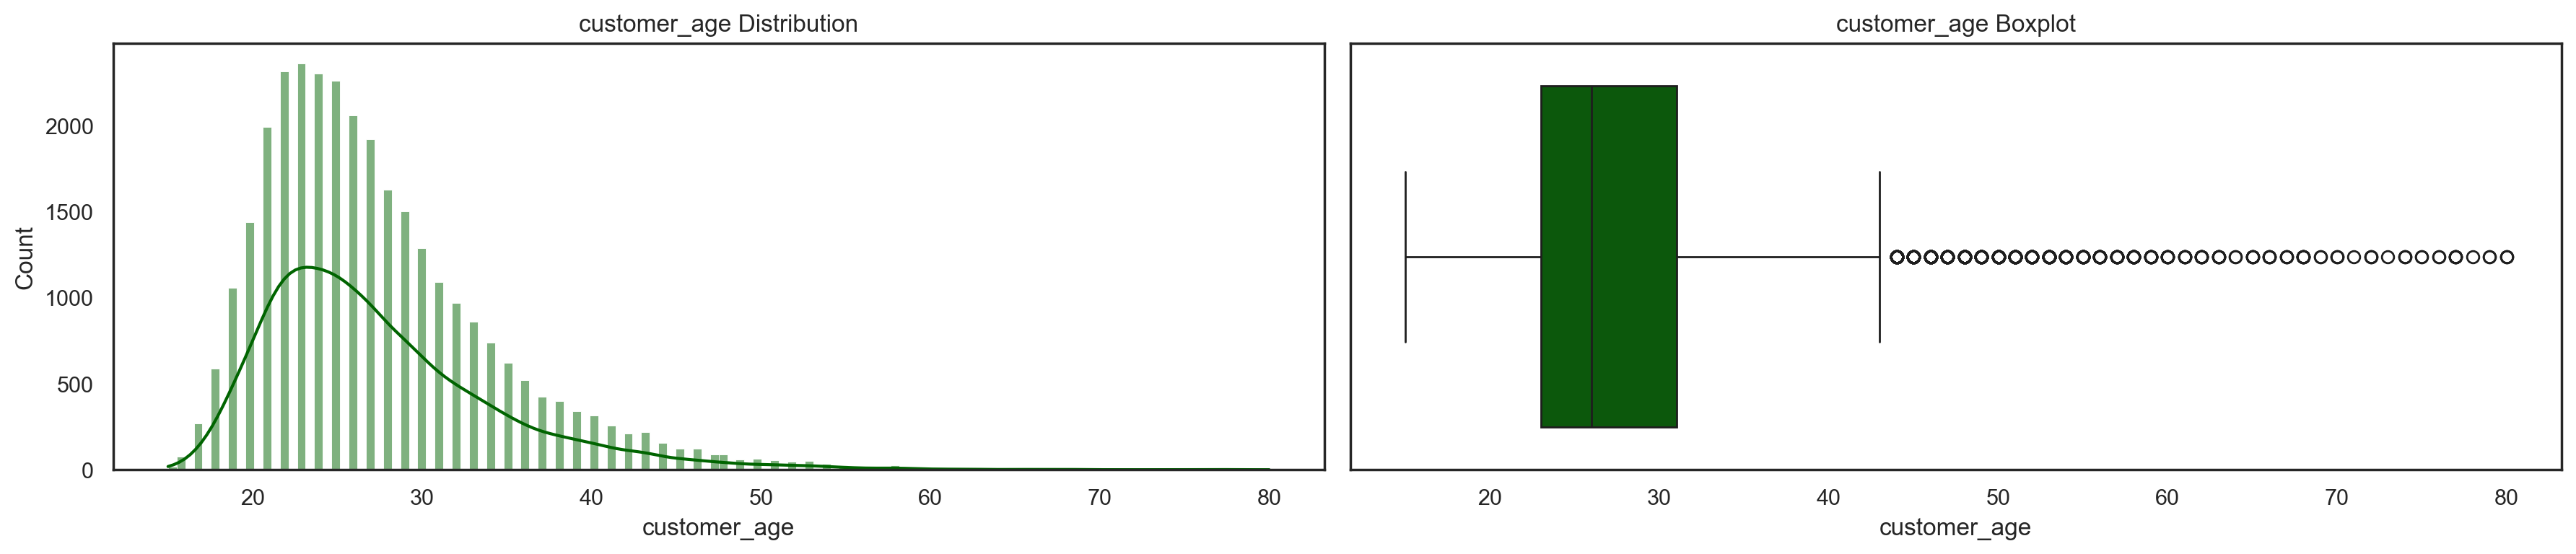

In [263]:
plot_numeric_variable(data=ABCDE, variable='customer_age')

<a class="anchor" id="age">

### 2.1.2. Vendor_count

</a>

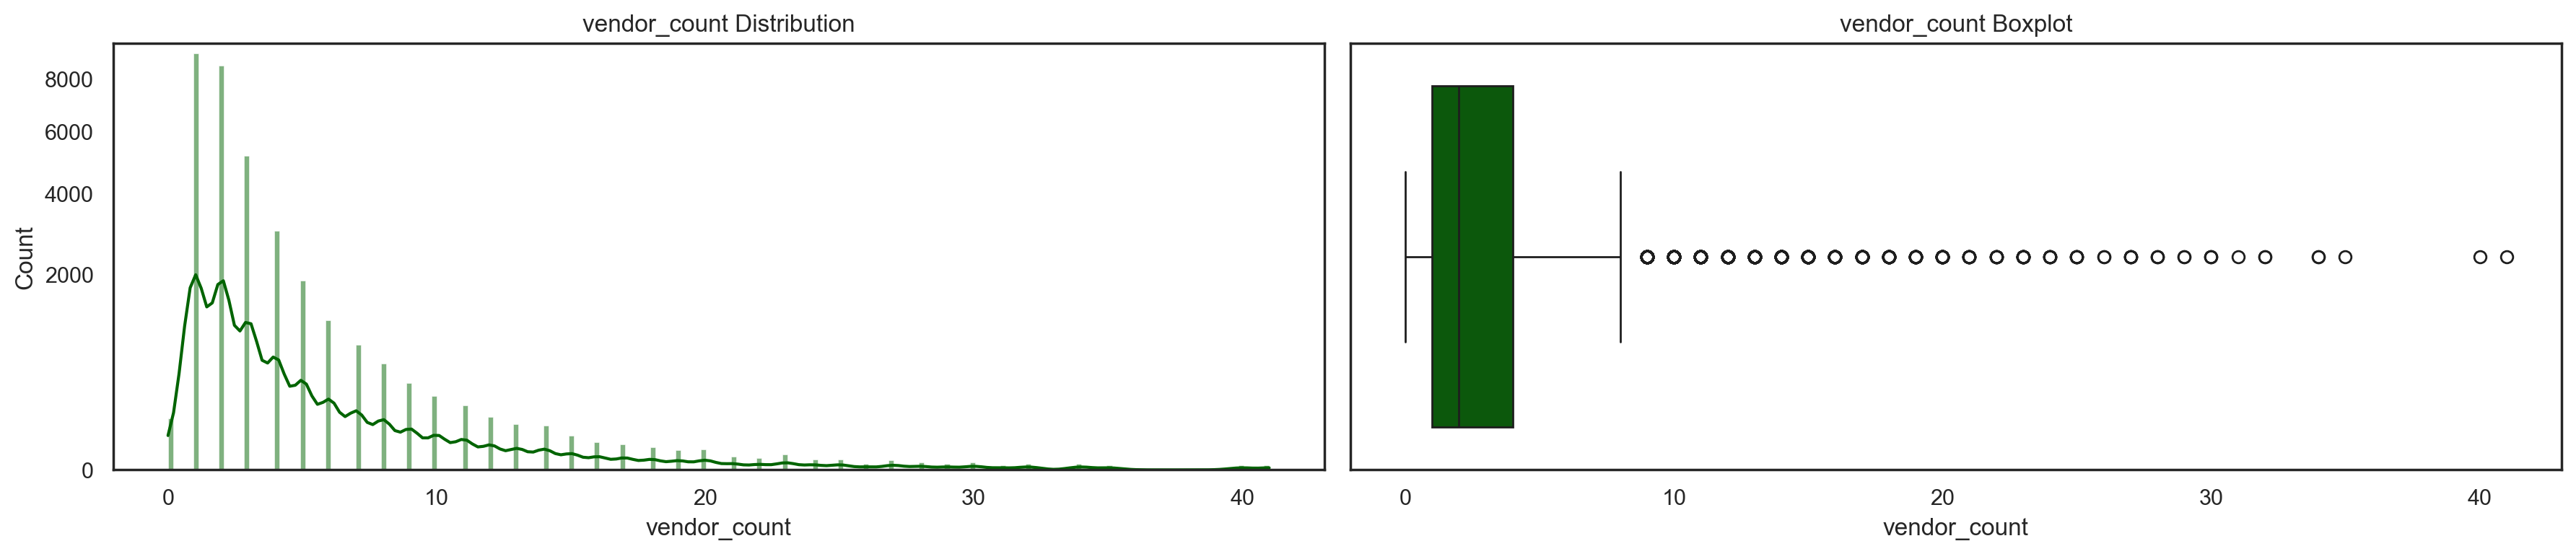

In [266]:
plot_numeric_variable(data=ABCDE_copy, variable='vendor_count', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.3. product_count

</a>

In [269]:
ABCDE_copy['log_product_count'] = np.log(ABCDE['product_count'] + 1) / np.log(1.02)

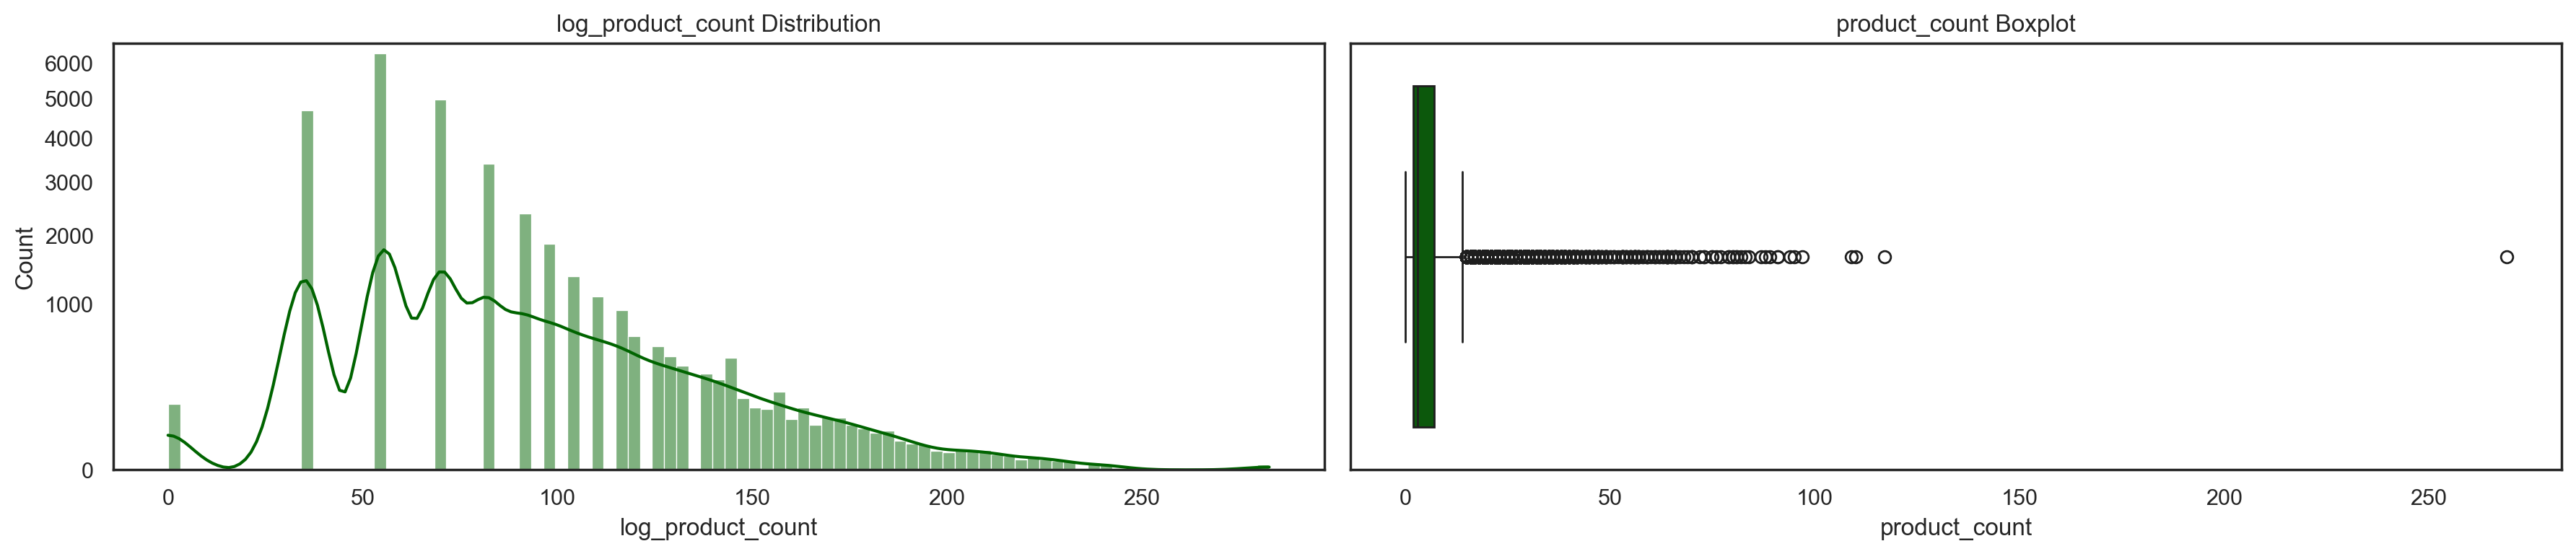

In [271]:
plot_numeric_variable(data=ABCDE_copy, variable='log_product_count', variable2='product_count', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.4. is_chain

</a>

In [274]:
ABCDE['is_chain'].describe()

count    31888.000000
mean         2.818866
std          3.977529
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

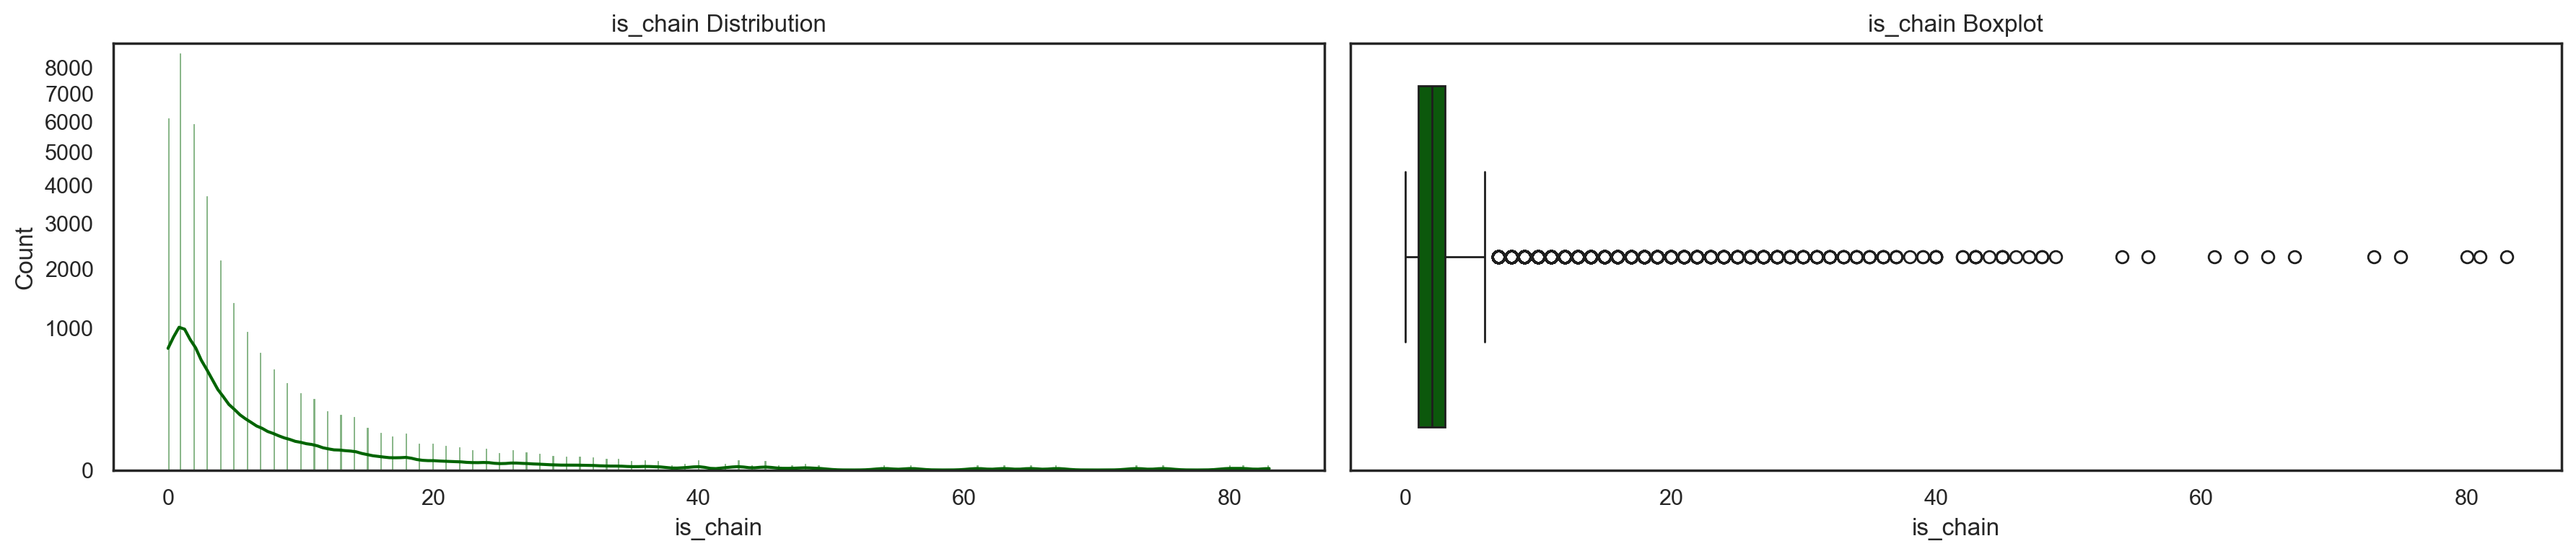

In [276]:
plot_numeric_variable(data=ABCDE, variable='is_chain', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.5. first_order

</a>

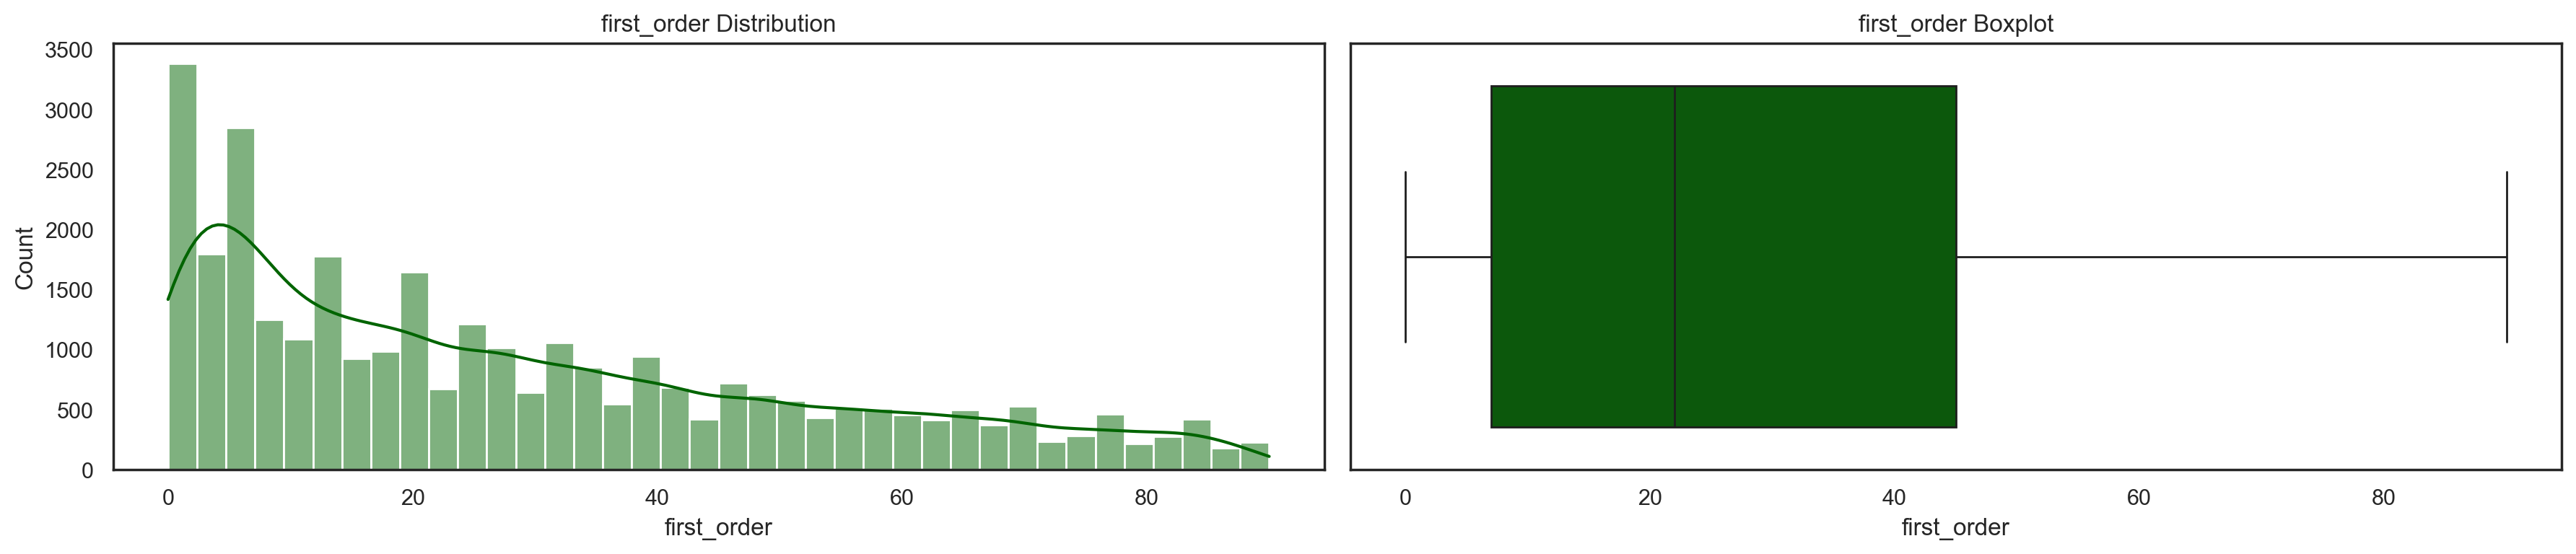

In [279]:
plot_numeric_variable(data=ABCDE, variable='first_order')

<a class="anchor" id="age">

### 2.1.6. last_order

</a>

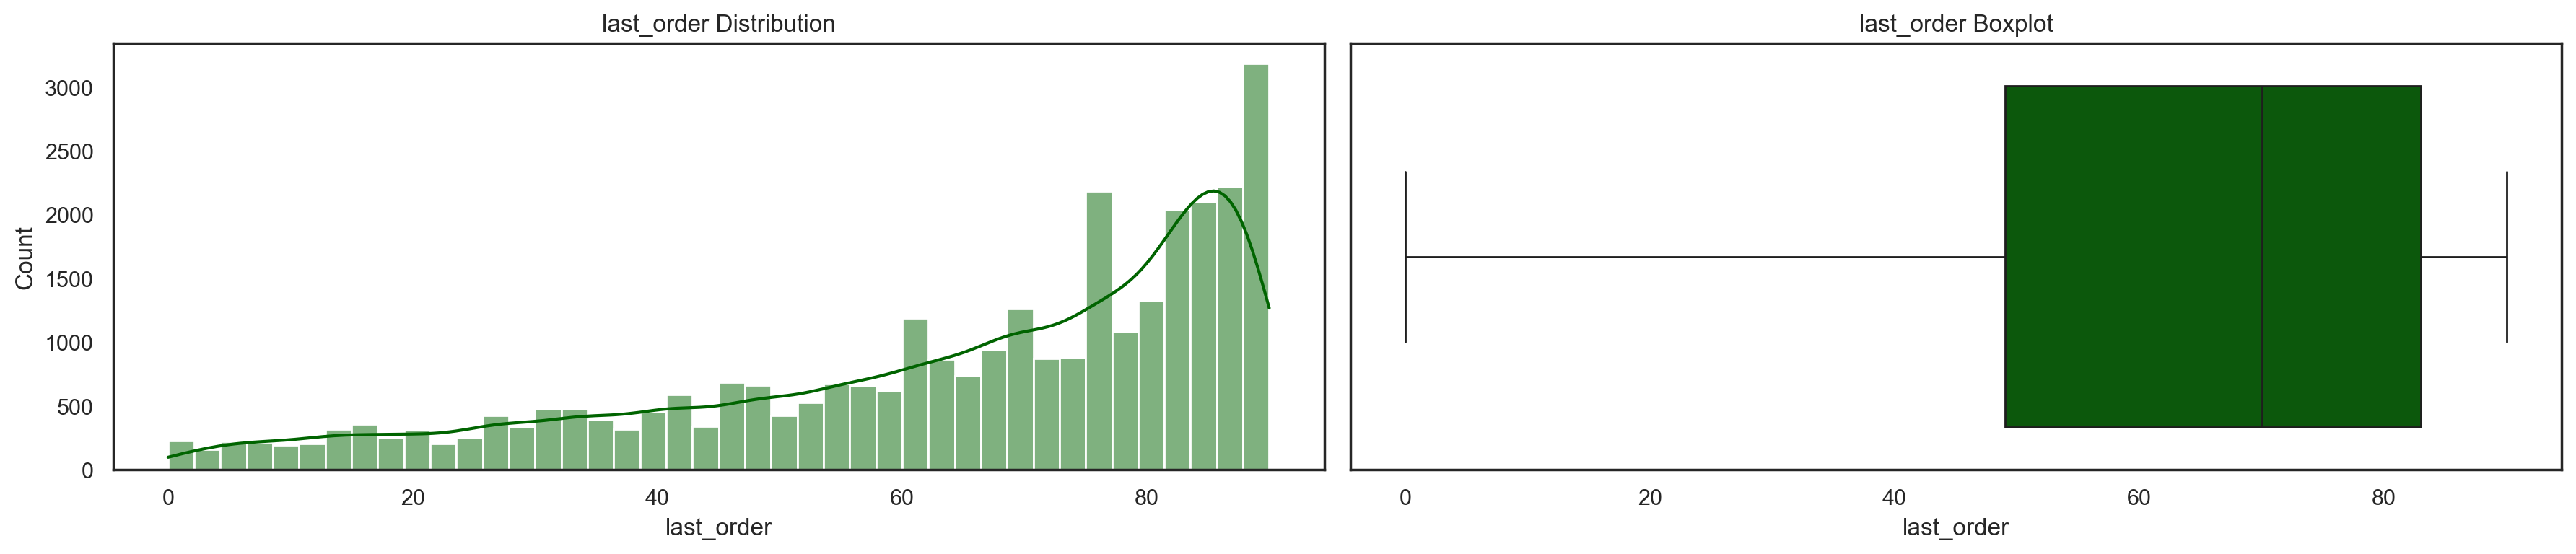

In [282]:
plot_numeric_variable(data=ABCDE, variable='last_order')

<a class="anchor" id="age">

### 2.1.7. CUI_American

</a>

In [285]:
ABCDE_copy['log_CUI_American'] = np.log(ABCDE['CUI_American'] + 1) / np.log(1.02)

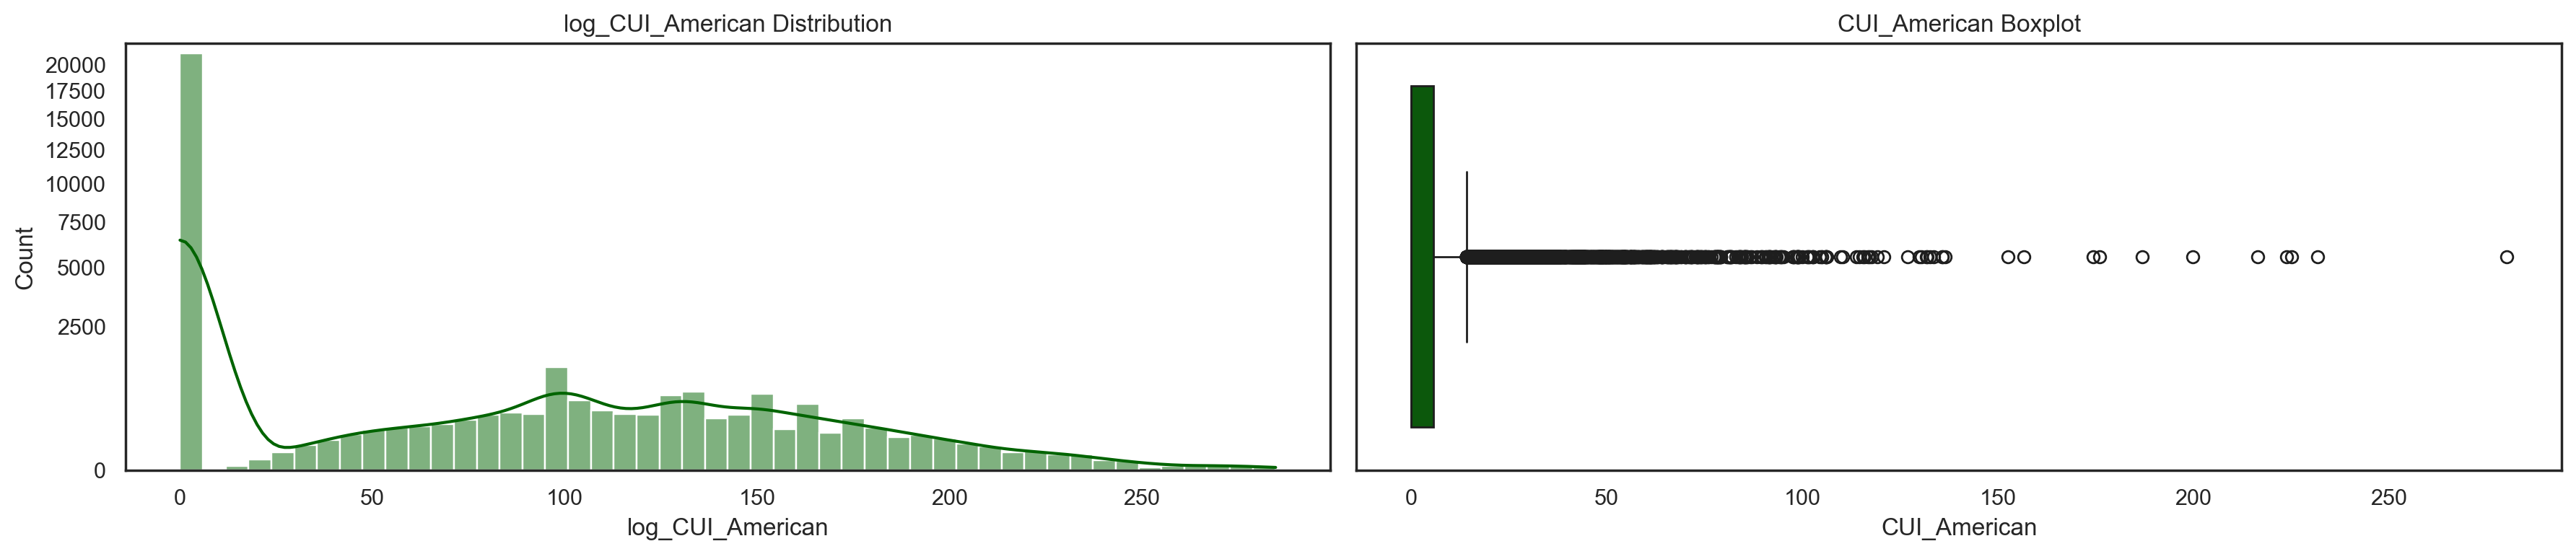

In [287]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_American', variable2='CUI_American', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.8. CUI_Asian

</a>

In [256]:
ABCDE_copy['log_CUI_Asian'] = np.log(ABCDE['CUI_Asian'] + 1) / np.log(1.008)

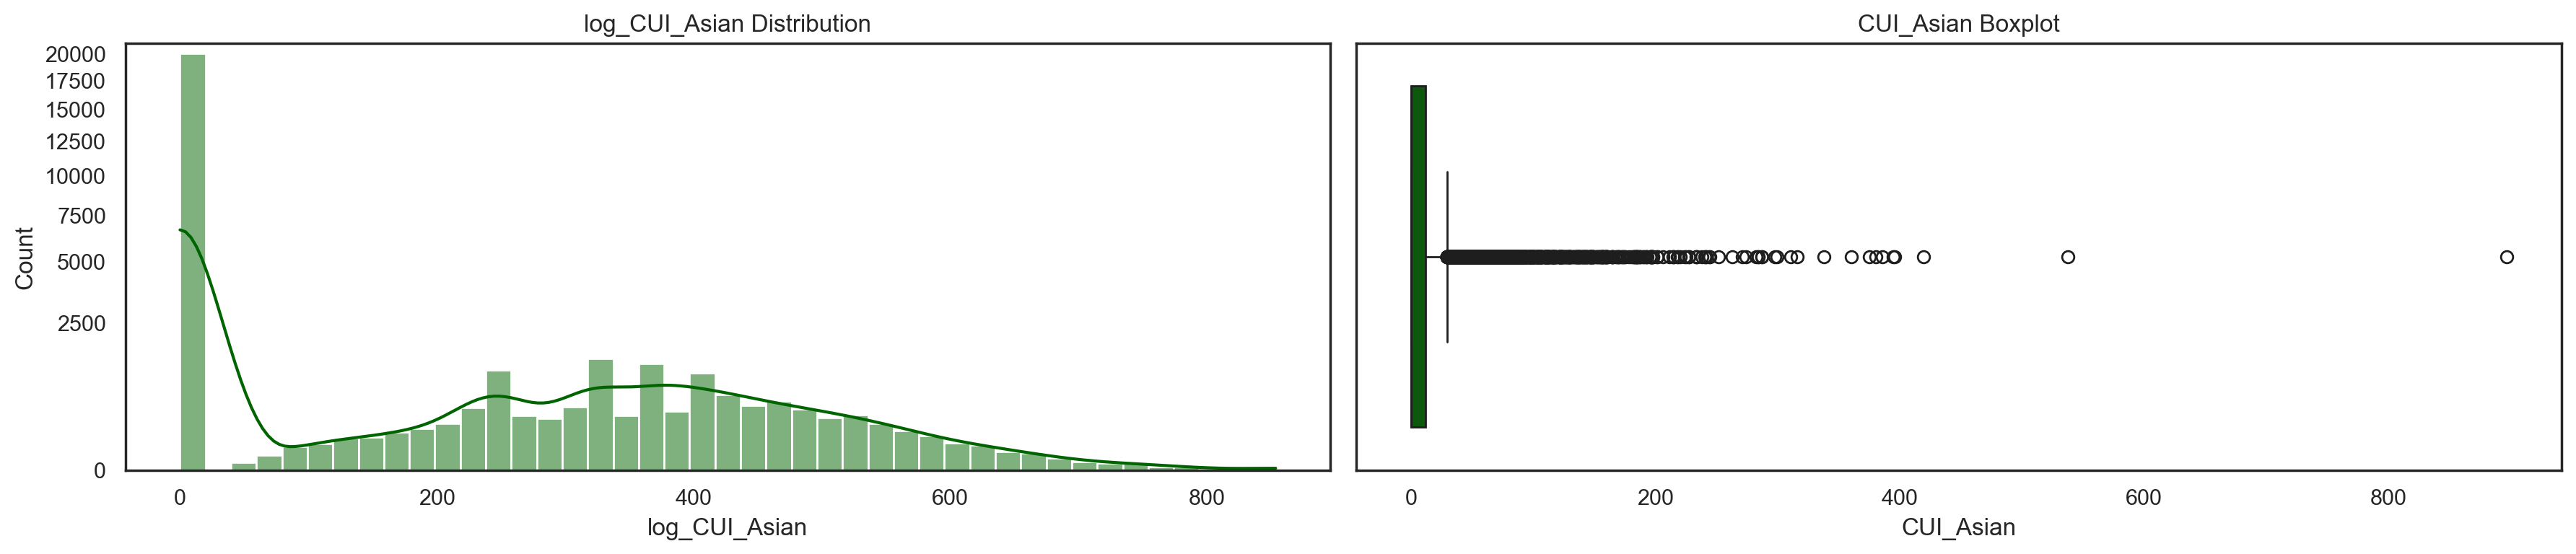

In [258]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Asian', variable2='CUI_Asian', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.9. CUI_Beverages

</a>

In [224]:
ABCDE_copy['log_CUI_Beverages'] = np.log(ABCDE['CUI_Beverages'] + 1) / np.log(1.025)

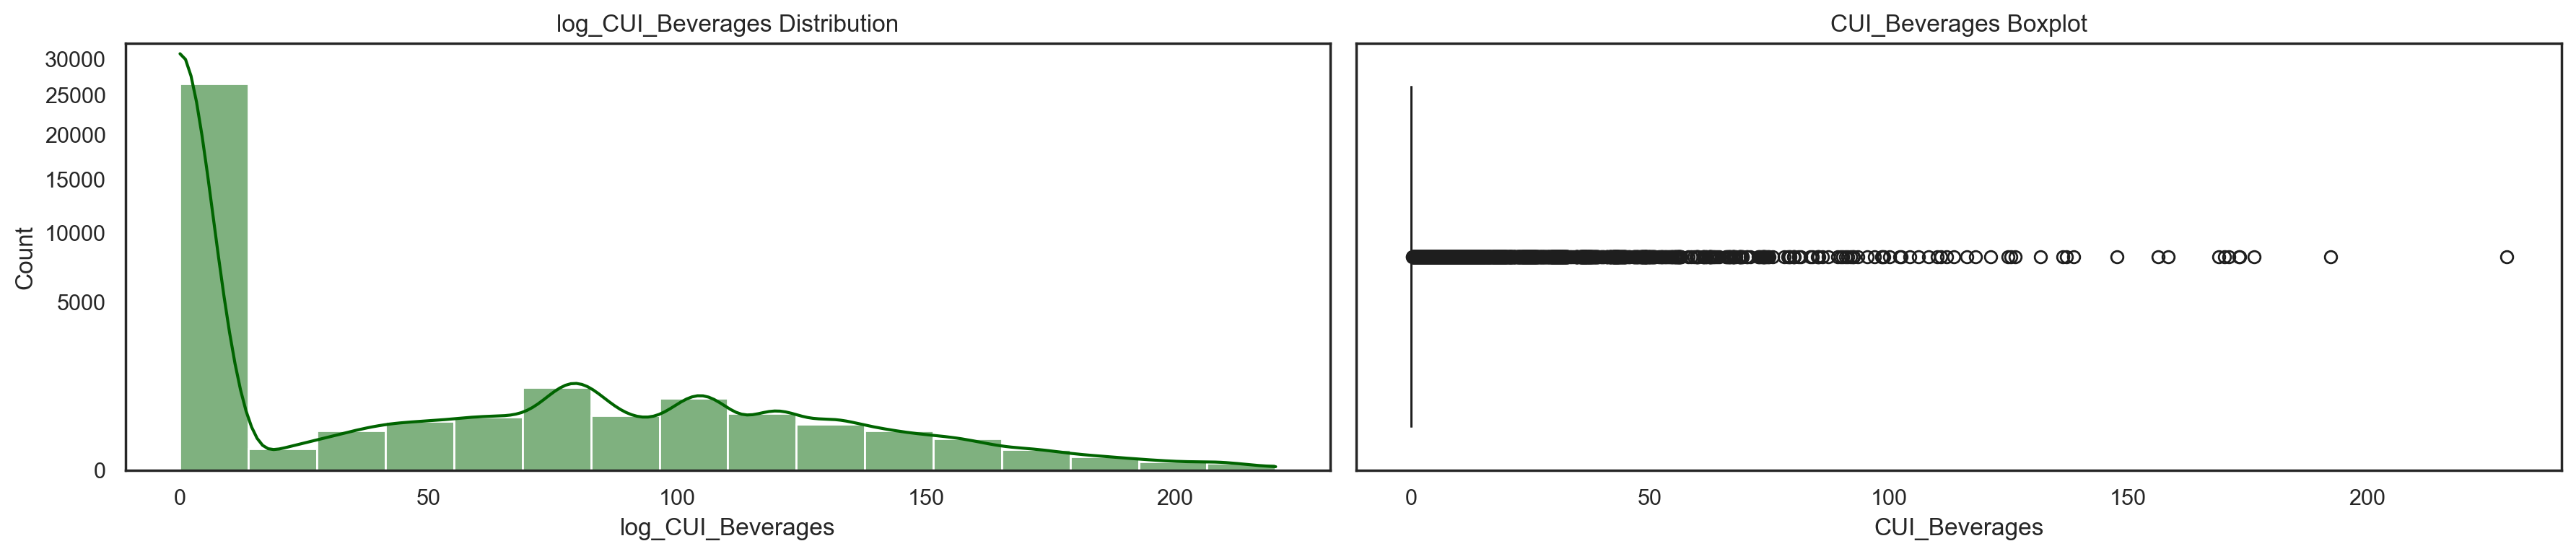

In [226]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Beverages', variable2='CUI_Beverages', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.10. CUI_Cafe

</a>

In [232]:
ABCDE_copy['log_CUI_Cafe'] = np.log(ABCDE['CUI_Cafe'] + 1) / np.log(1.02)

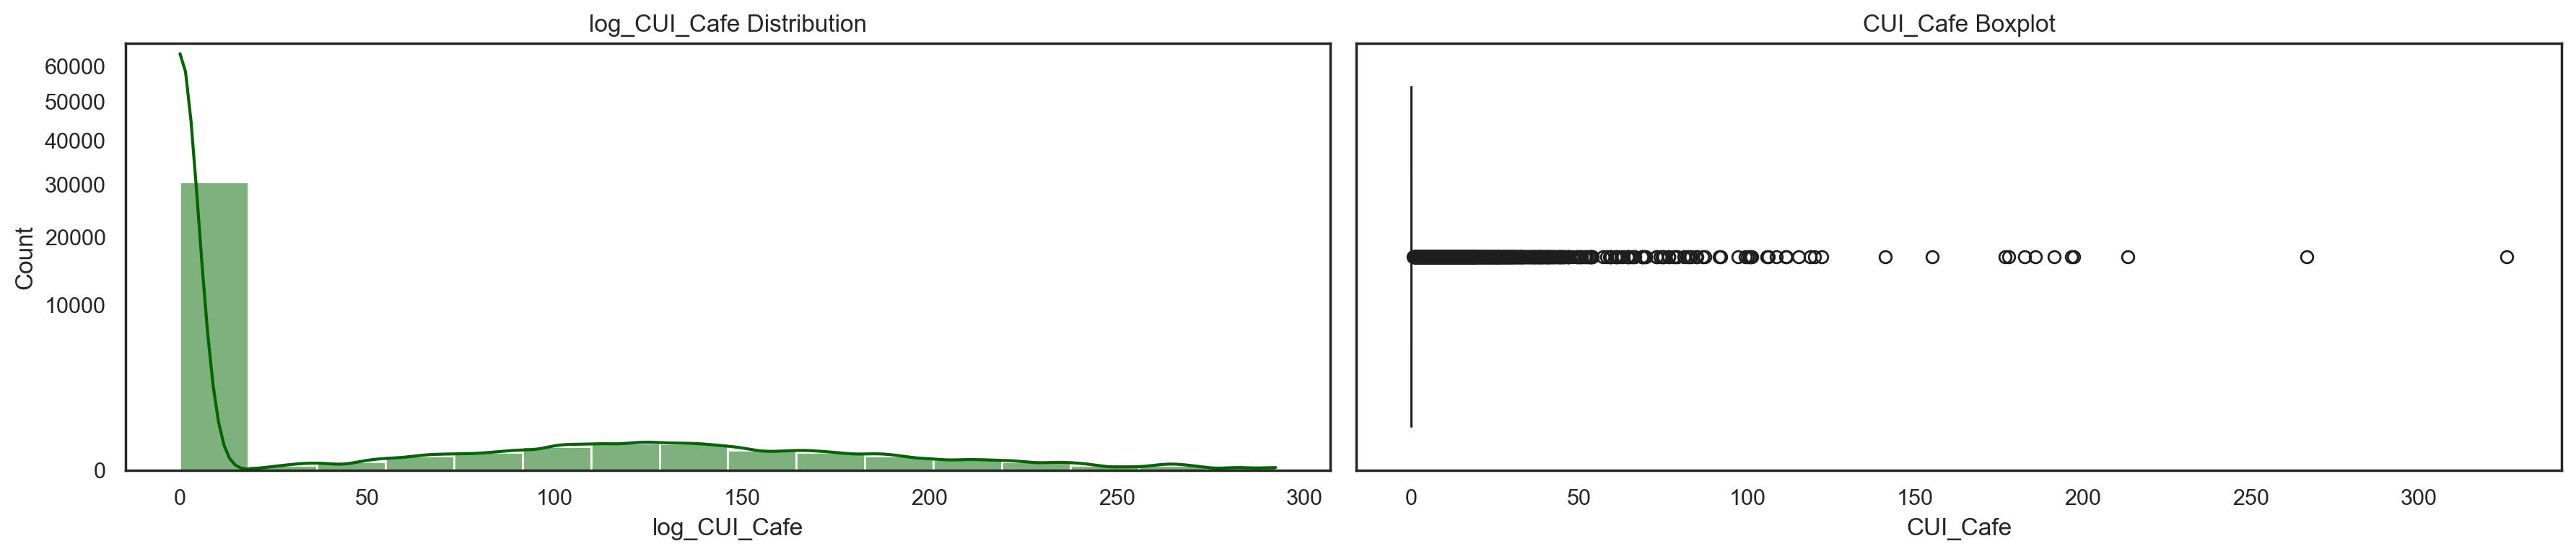

In [234]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Cafe', variable2='CUI_Cafe', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.11. CUI_Chicken Dishes

</a>

In [291]:
ABCDE_copy['log_CUI_Chicken Dishes'] = np.log(ABCDE['CUI_Chicken Dishes'] + 1) / np.log(1.025)

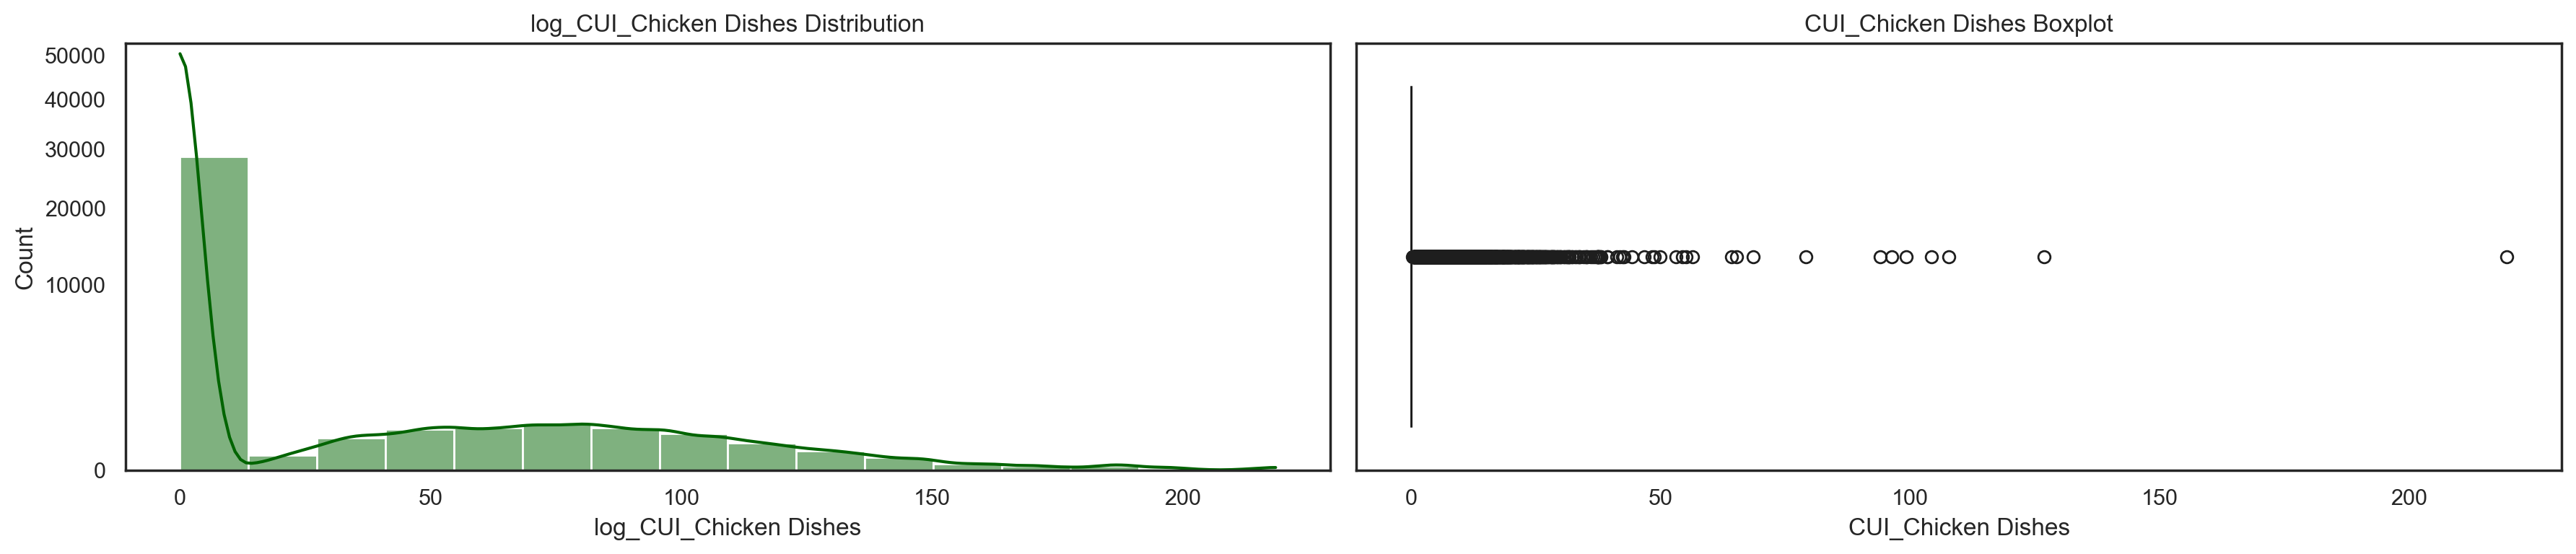

In [293]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Chicken Dishes', variable2='CUI_Chicken Dishes', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.12. CUI_Chinese

</a>

In [54]:
(ABCDE['CUI_Chinese'] > 0).all()

False

In [317]:
ABCDE_copy['log_CUI_Chinese'] = np.log(ABCDE['CUI_Chinese'] + 1) / np.log(1.009)

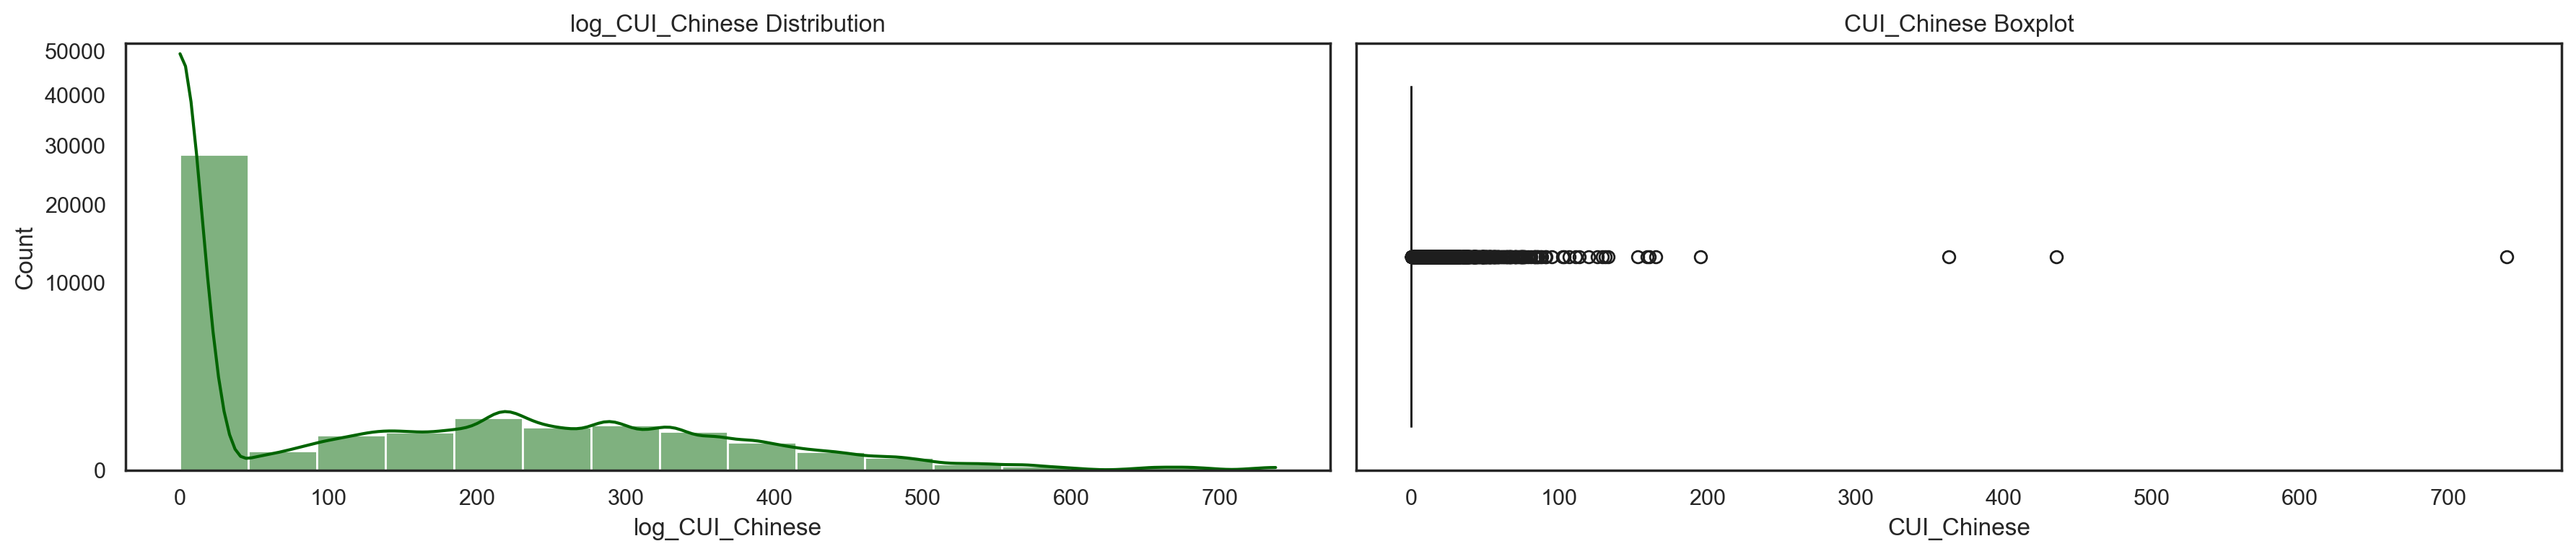

In [319]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Chinese', variable2='CUI_Chinese', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.13. CUI_Desserts

</a>

In [331]:
ABCDE_copy['log_CUI_Desserts'] = np.log(ABCDE['CUI_Desserts'] + 1) / np.log(1.025)

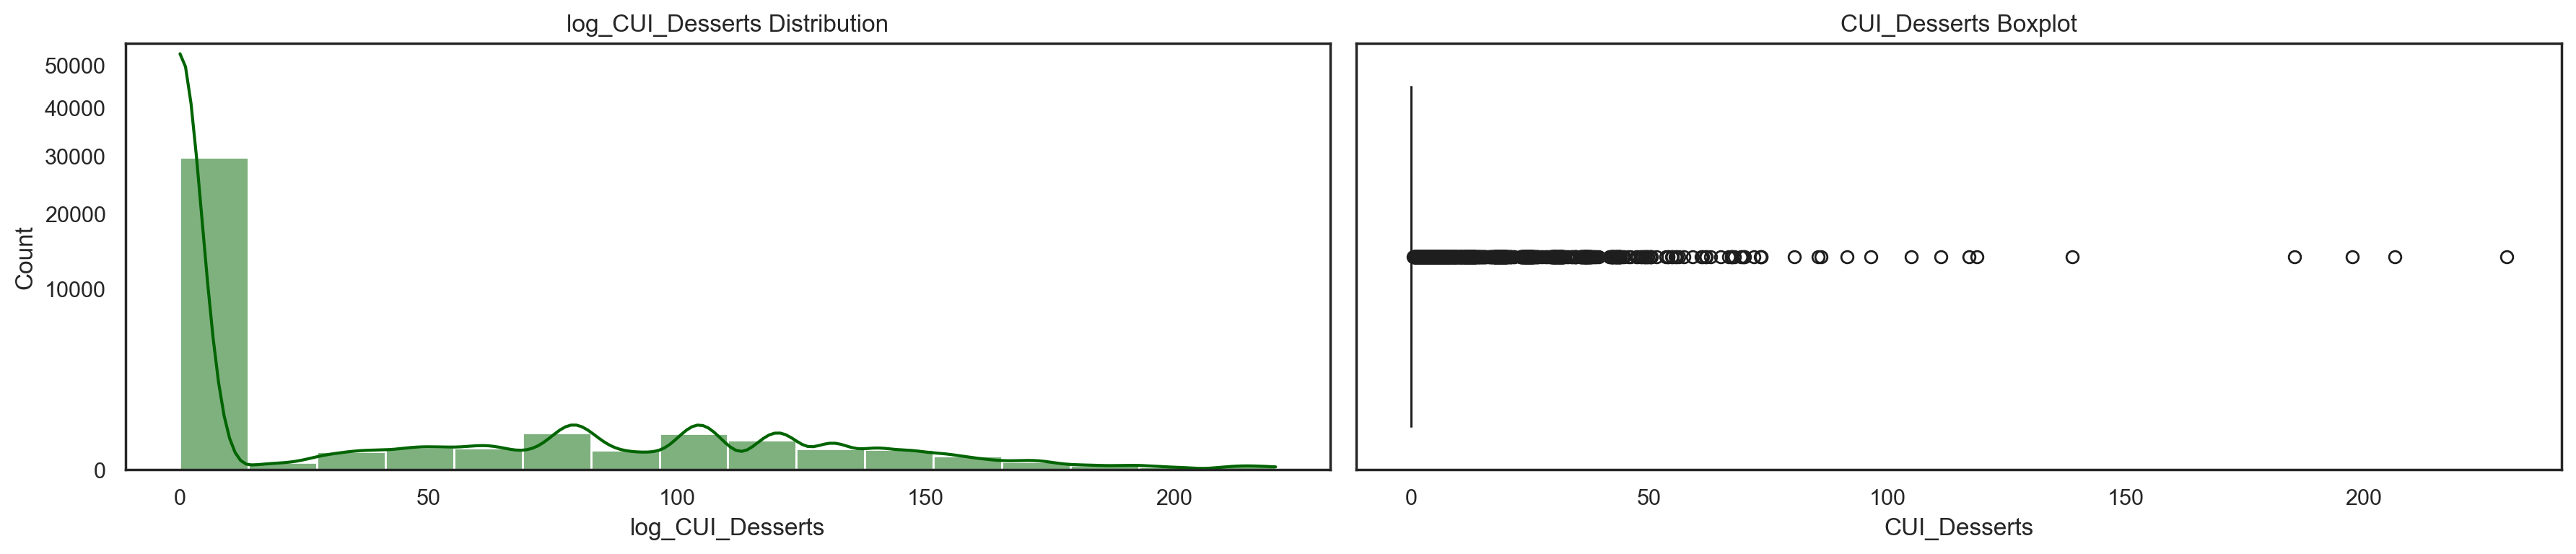

In [333]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Desserts', variable2='CUI_Desserts', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.14. CUI_Healthy

</a>

In [373]:
ABCDE_copy['log_CUI_Healthy'] = np.log(ABCDE['CUI_Healthy'] + 1) / np.log(1.023)

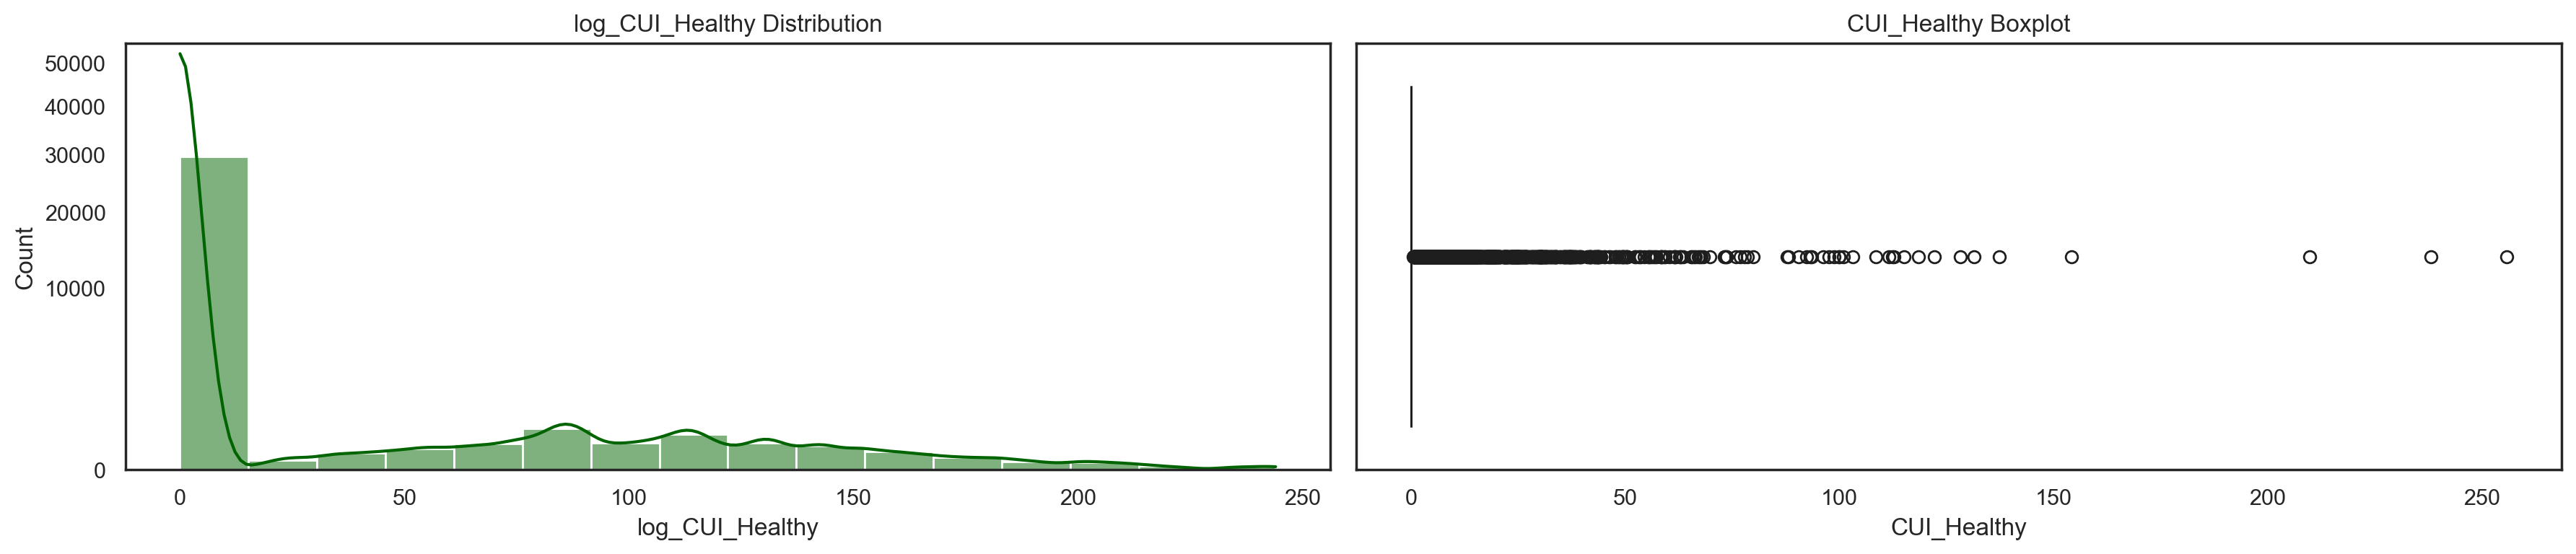

In [375]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Healthy', variable2='CUI_Healthy', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.15. CUI_Indian

</a>

In [381]:
ABCDE_copy['log_CUI_Indian'] = np.log(ABCDE['CUI_Indian'] + 1) / np.log(1.02)

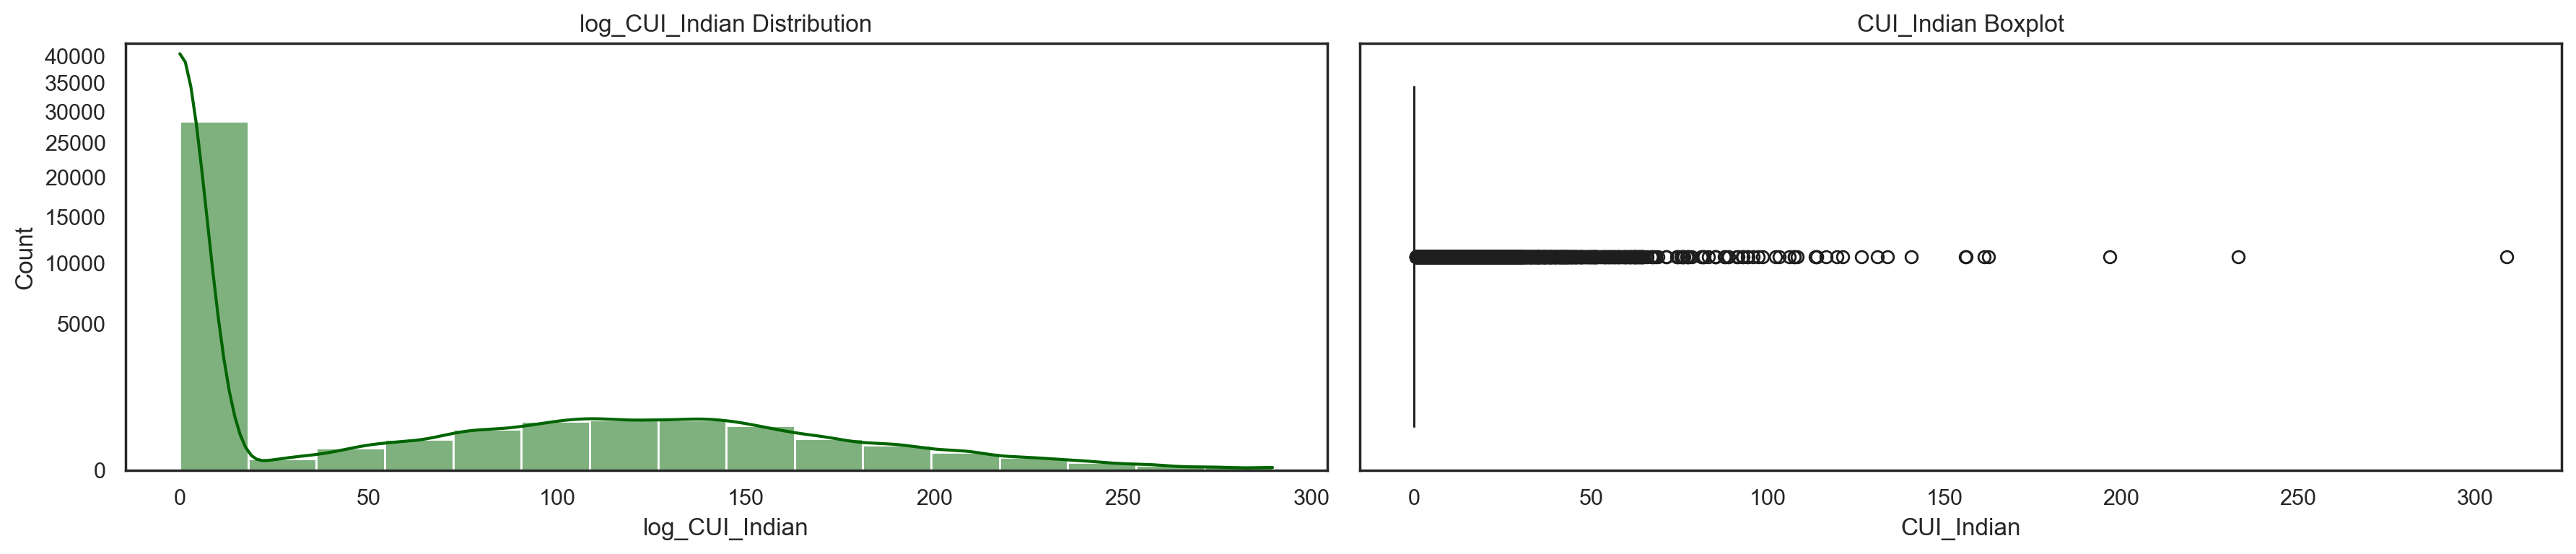

In [383]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Indian', variable2='CUI_Indian', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.16. CUI_Italian

</a>

In [403]:
ABCDE_copy['log_CUI_Italian'] = np.log(ABCDE['CUI_Italian'] + 1) / np.log(1.015)

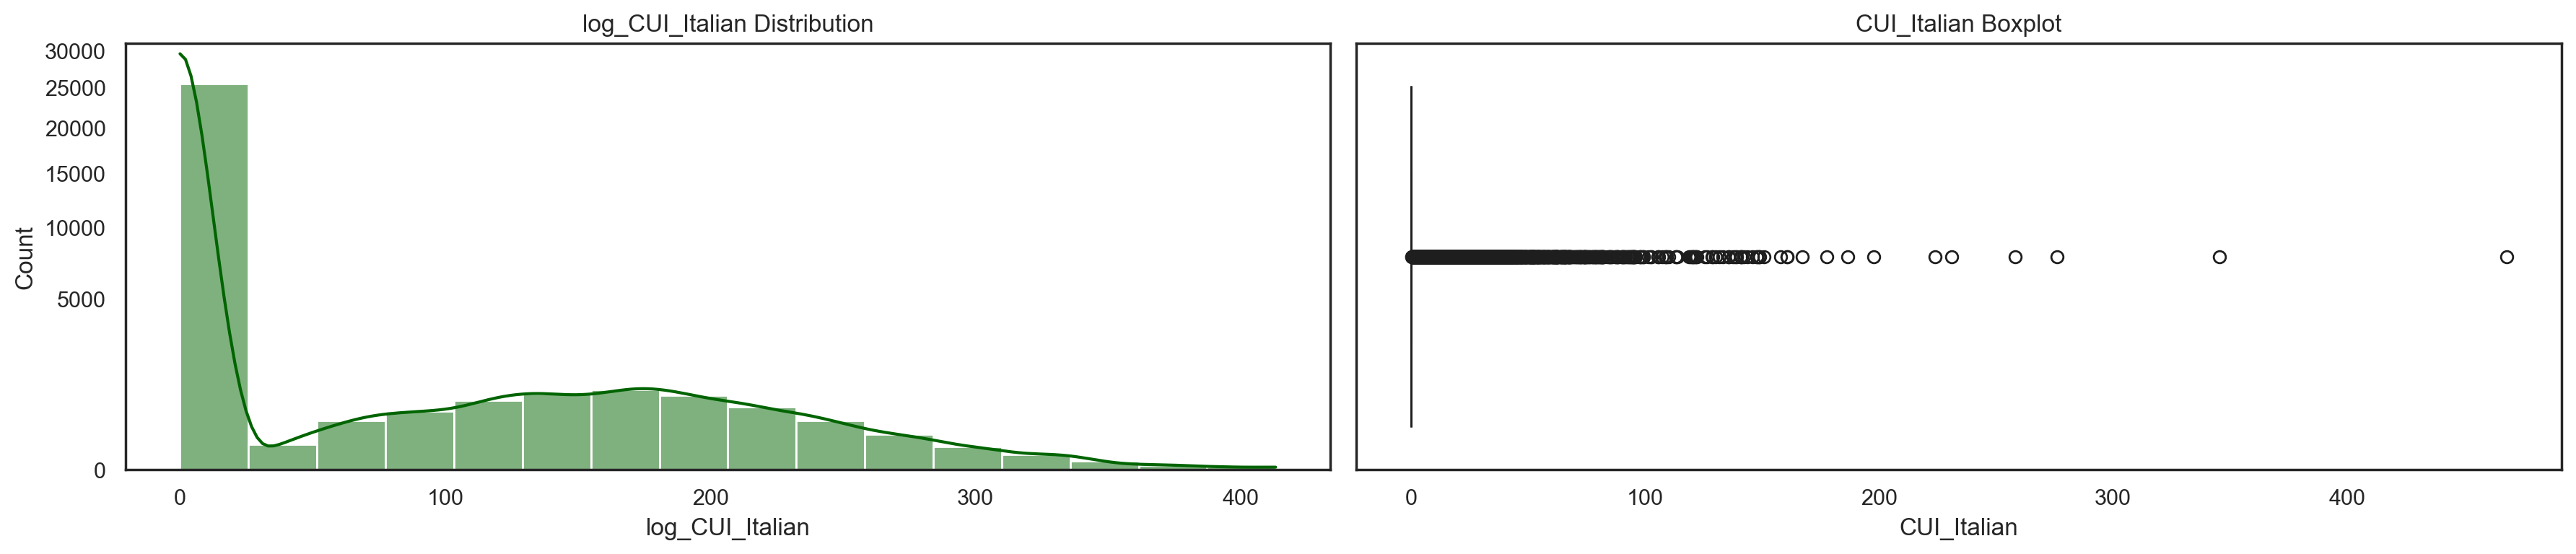

In [405]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Italian', variable2='CUI_Italian', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.17. CUI_Japanese

</a>

In [427]:
ABCDE_copy['log_CUI_Japanese'] = np.log(ABCDE['CUI_Japanese'] + 1) / np.log(1.009)

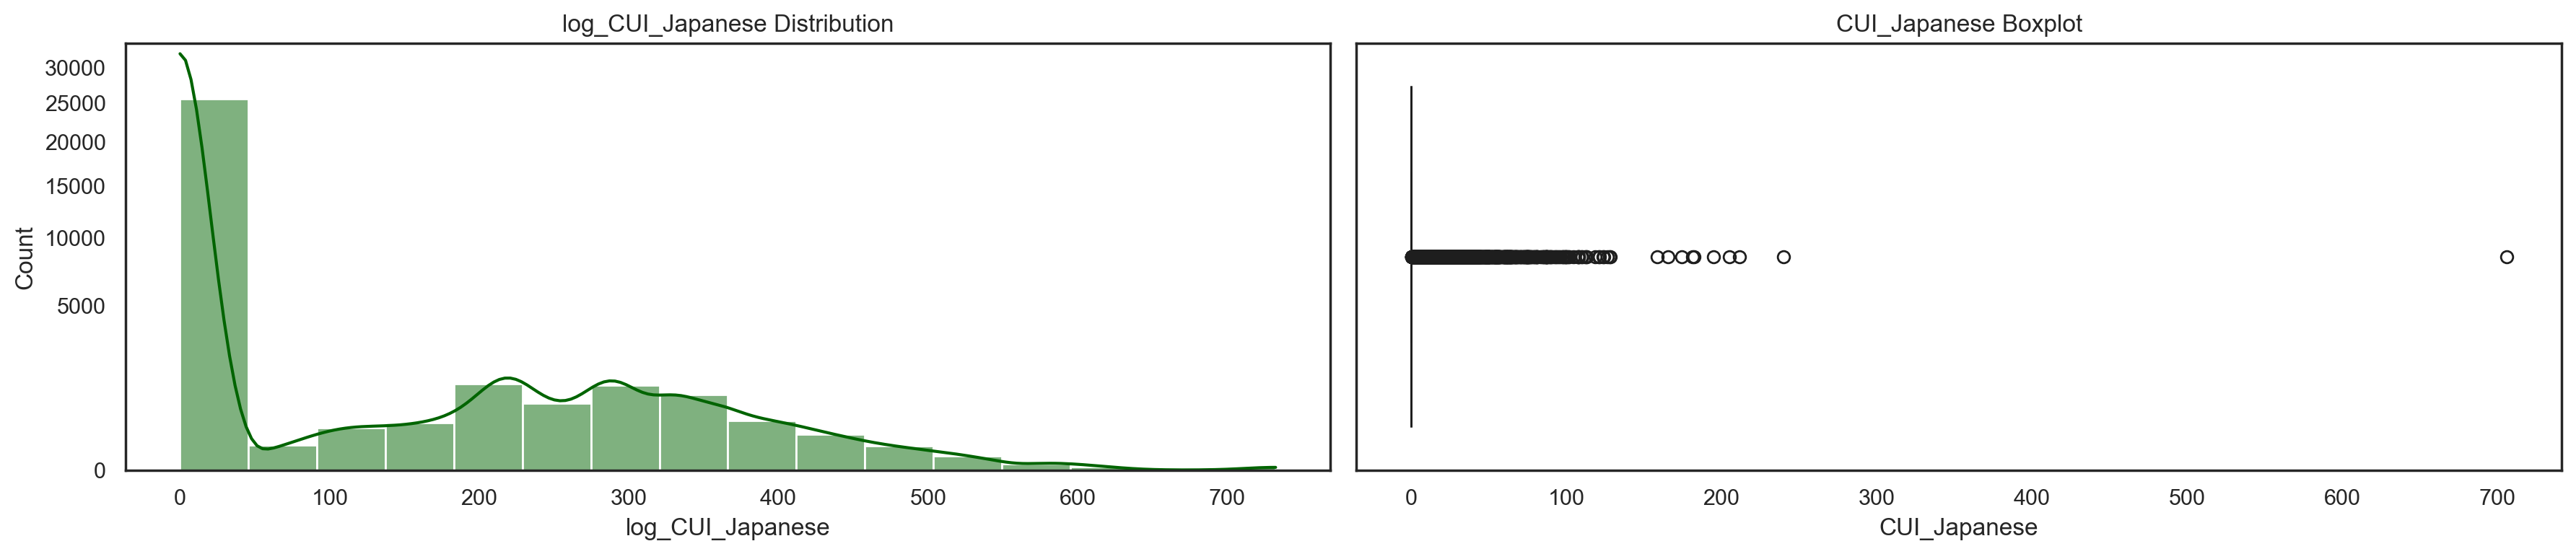

In [429]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Japanese', variable2='CUI_Japanese', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.18. CUI_Noodle Dishes

</a>

In [435]:
ABCDE_copy['log_CUI_Noodle Dishes'] = np.log(ABCDE['CUI_Noodle Dishes'] + 1) / np.log(1.02)

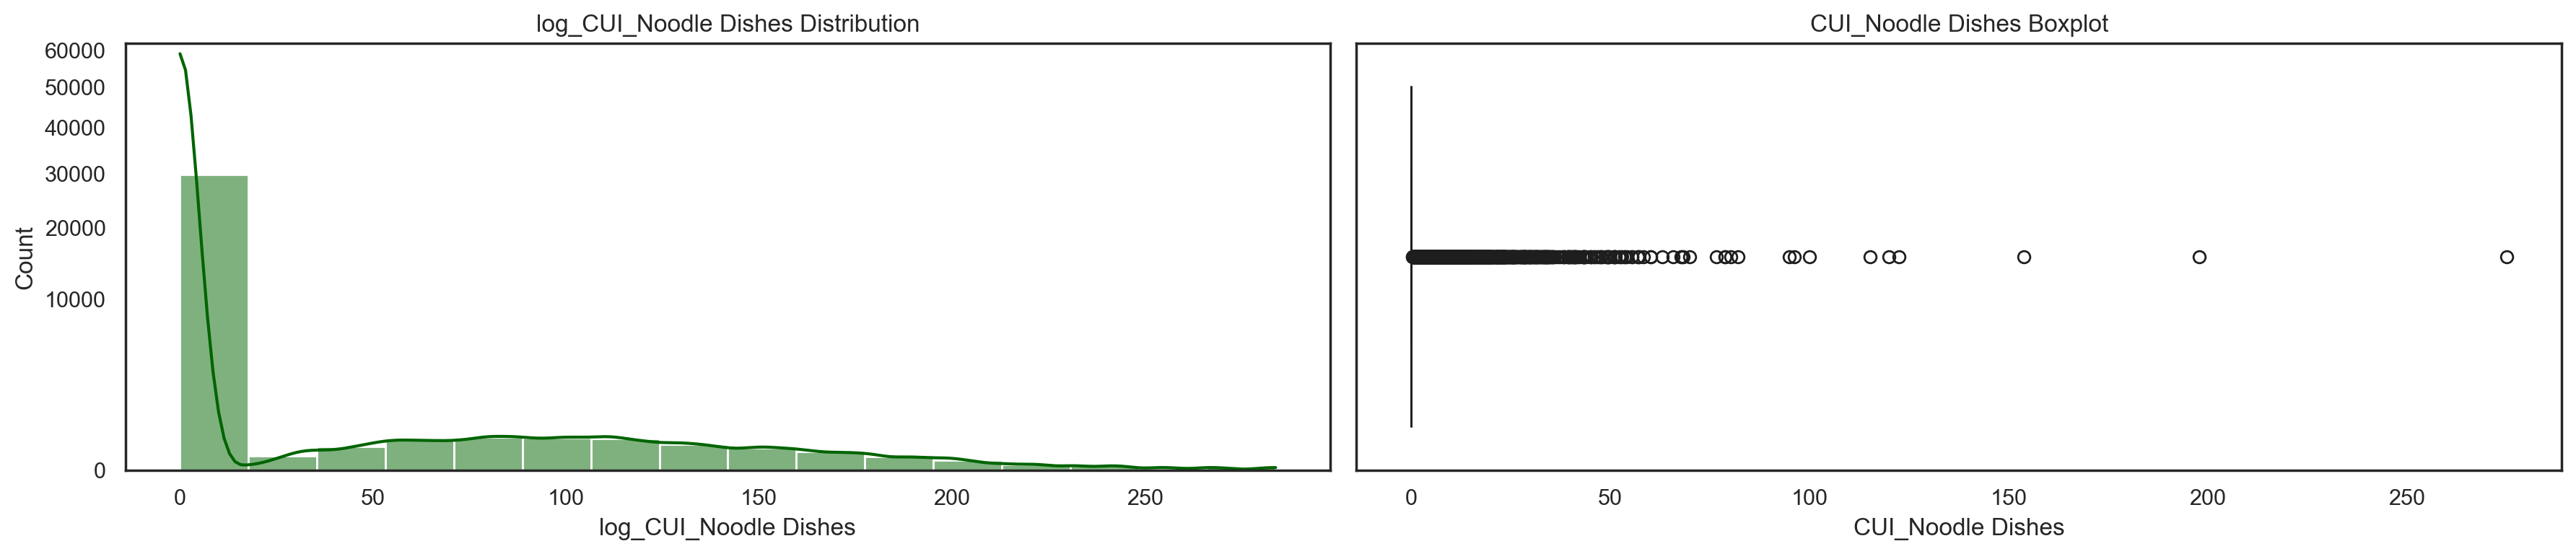

In [437]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Noodle Dishes', variable2='CUI_Noodle Dishes', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.19. CUI_Other

</a>

In [457]:
ABCDE_copy['log_CUI_OTHER'] = np.log(ABCDE['CUI_OTHER'] + 1) / np.log(1.017)

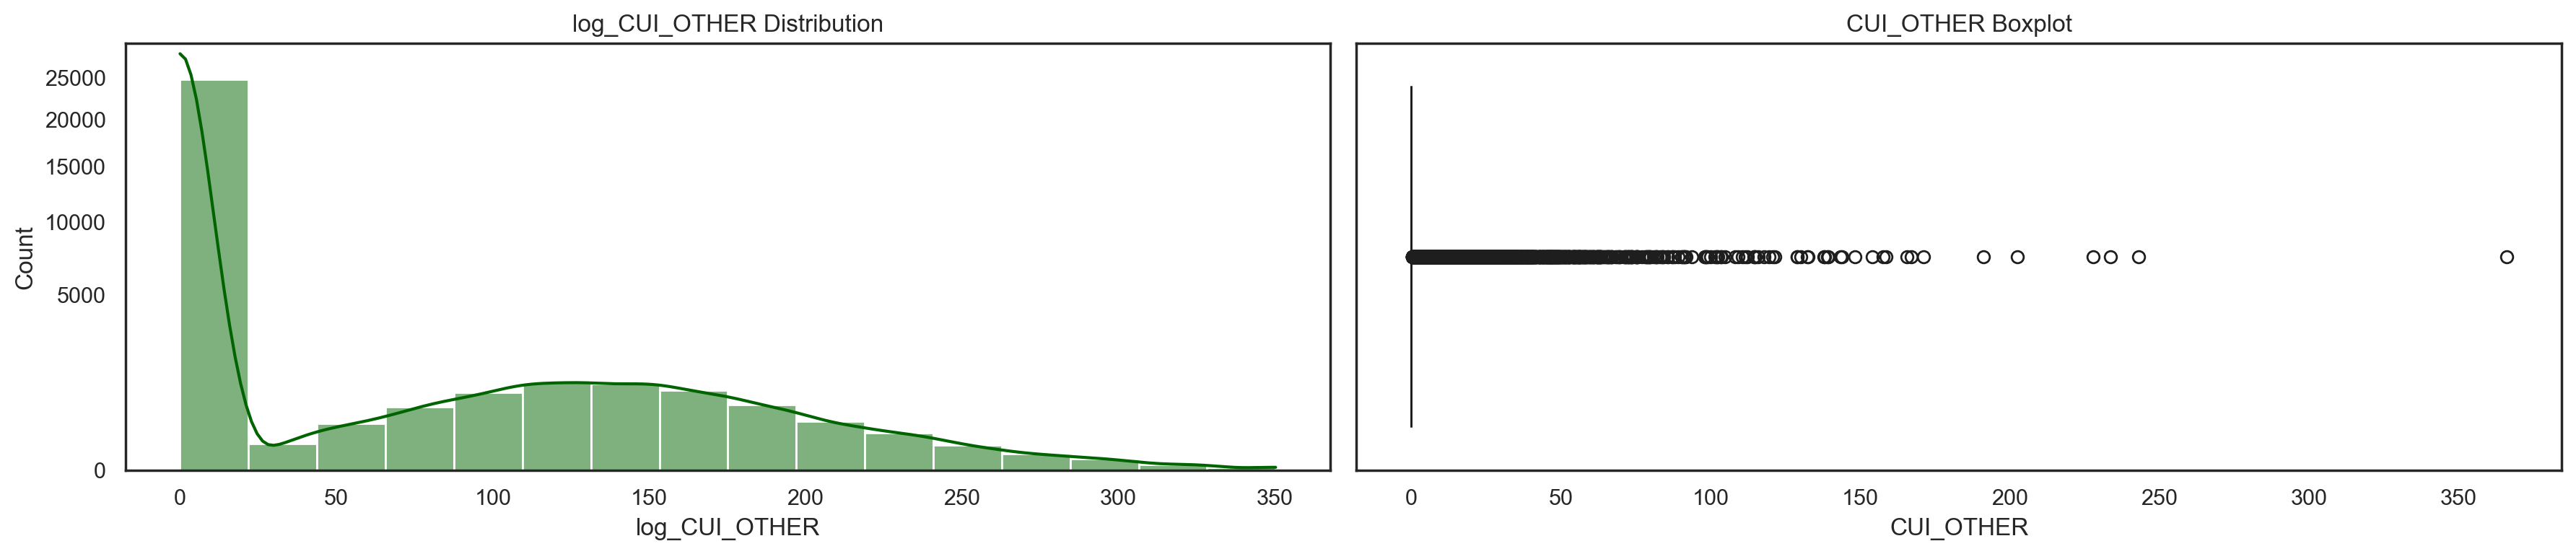

In [459]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_OTHER', variable2='CUI_OTHER', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.20. CUI_Street Food

</a>

In [469]:
ABCDE_copy['log_CUI_Street Food / Snacks'] = np.log(ABCDE['CUI_Street Food / Snacks'] + 1) / np.log(1.015)

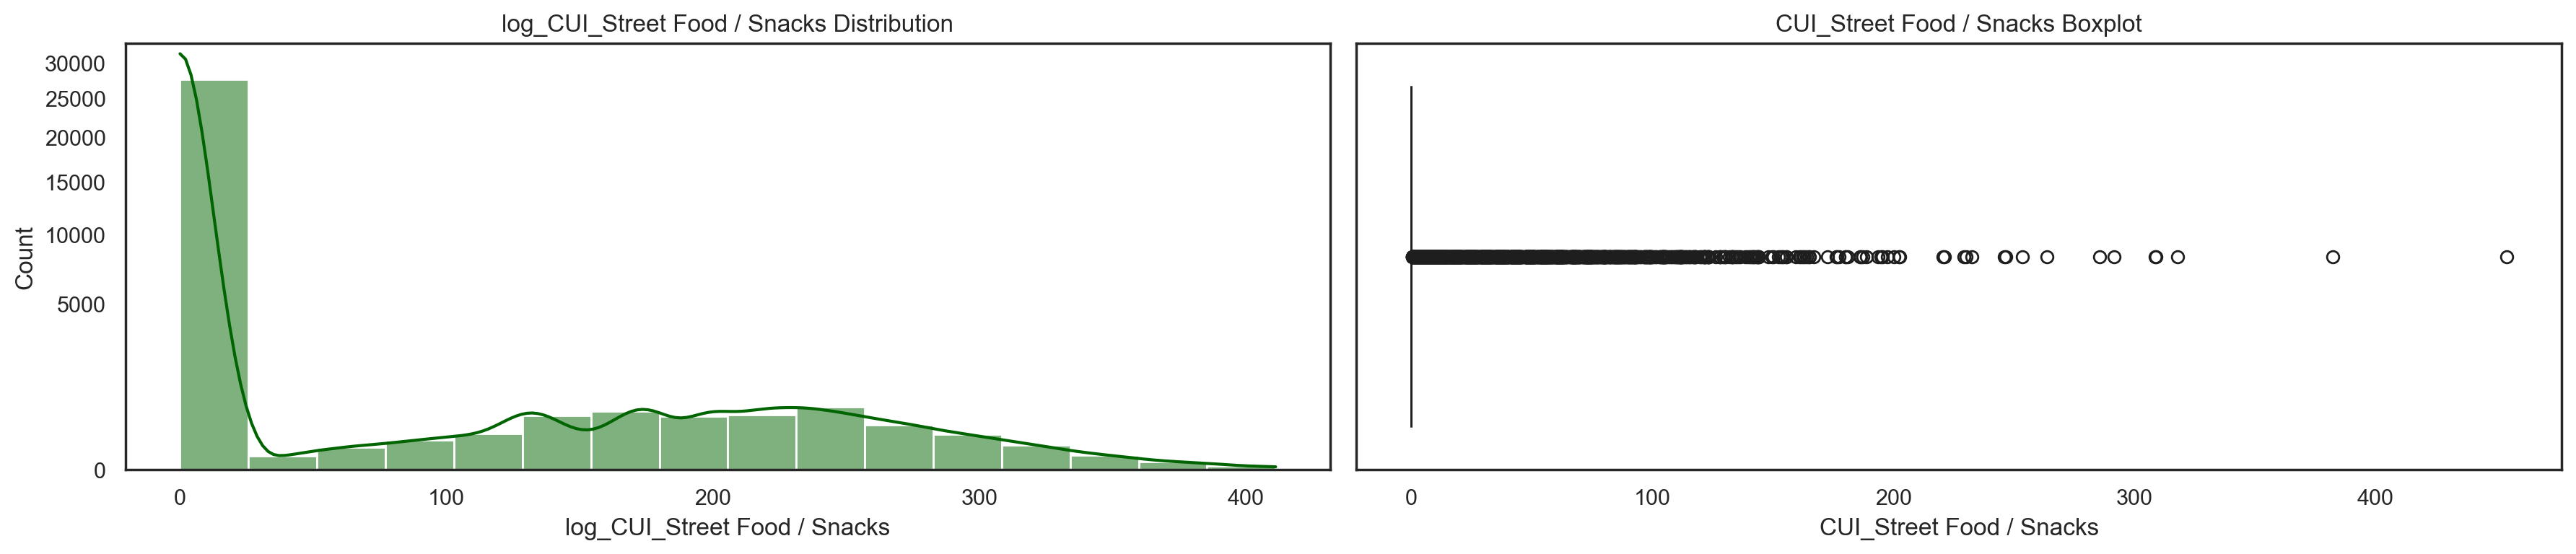

In [471]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Street Food / Snacks', variable2='CUI_Street Food / Snacks', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.21. CUI_Thai

</a>

In [485]:
ABCDE_copy['log_CUI_Thai'] = np.log(ABCDE['CUI_Thai'] + 1) / np.log(1.035)

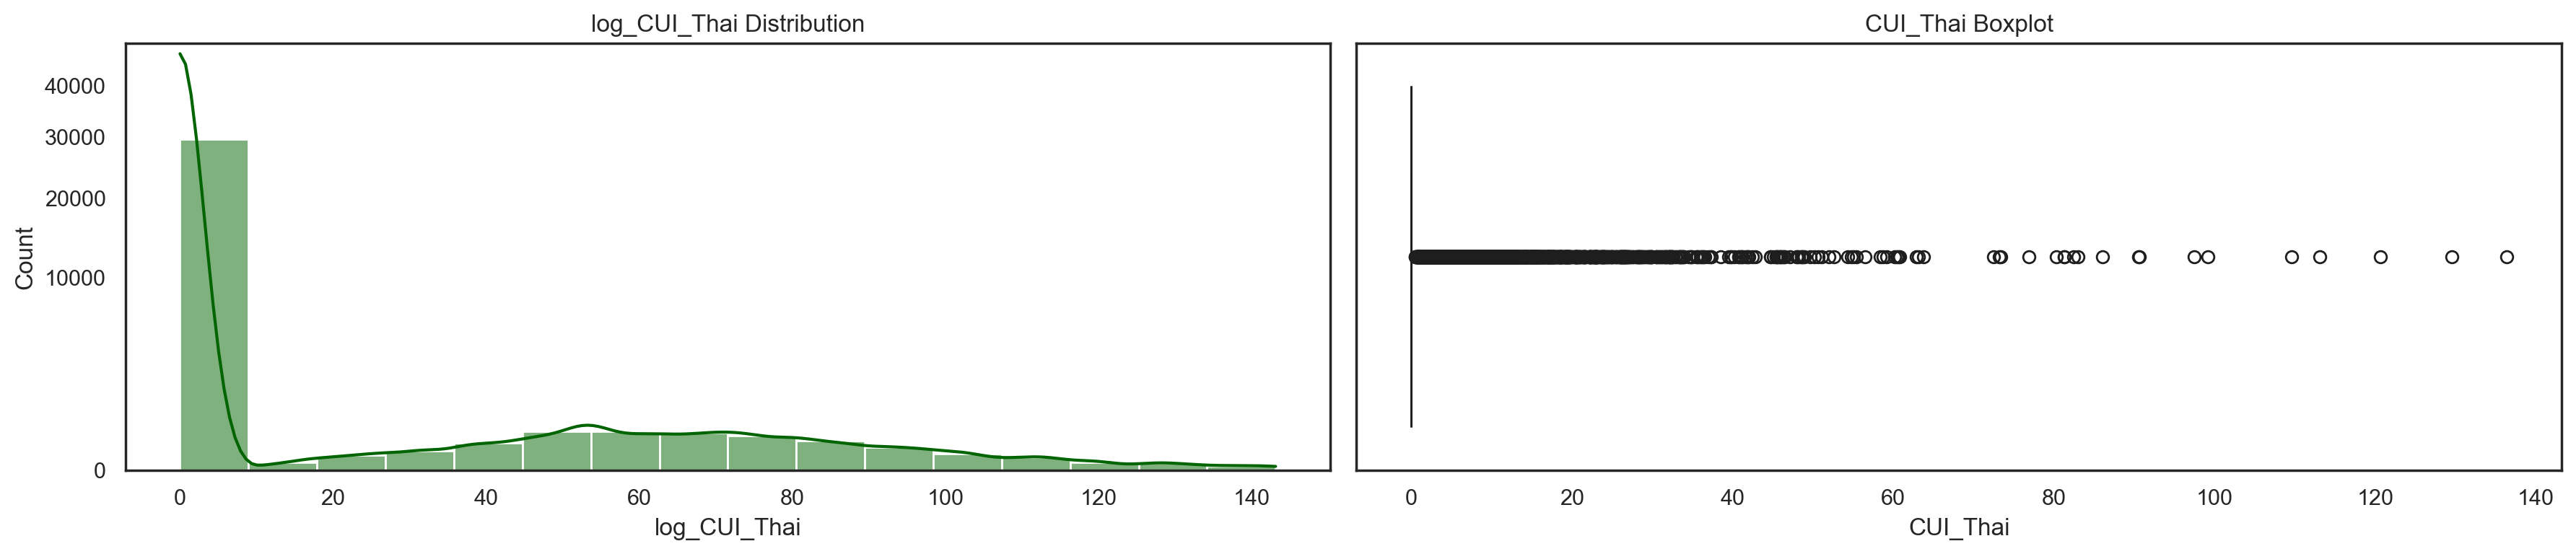

In [487]:
plot_numeric_variable(data=ABCDE_copy, variable='log_CUI_Thai', variable2='CUI_Thai', sqrt_scale=True)

<a class="anchor" id="age">

### 2.1.22. Days of the week

</a>

*Histograms*

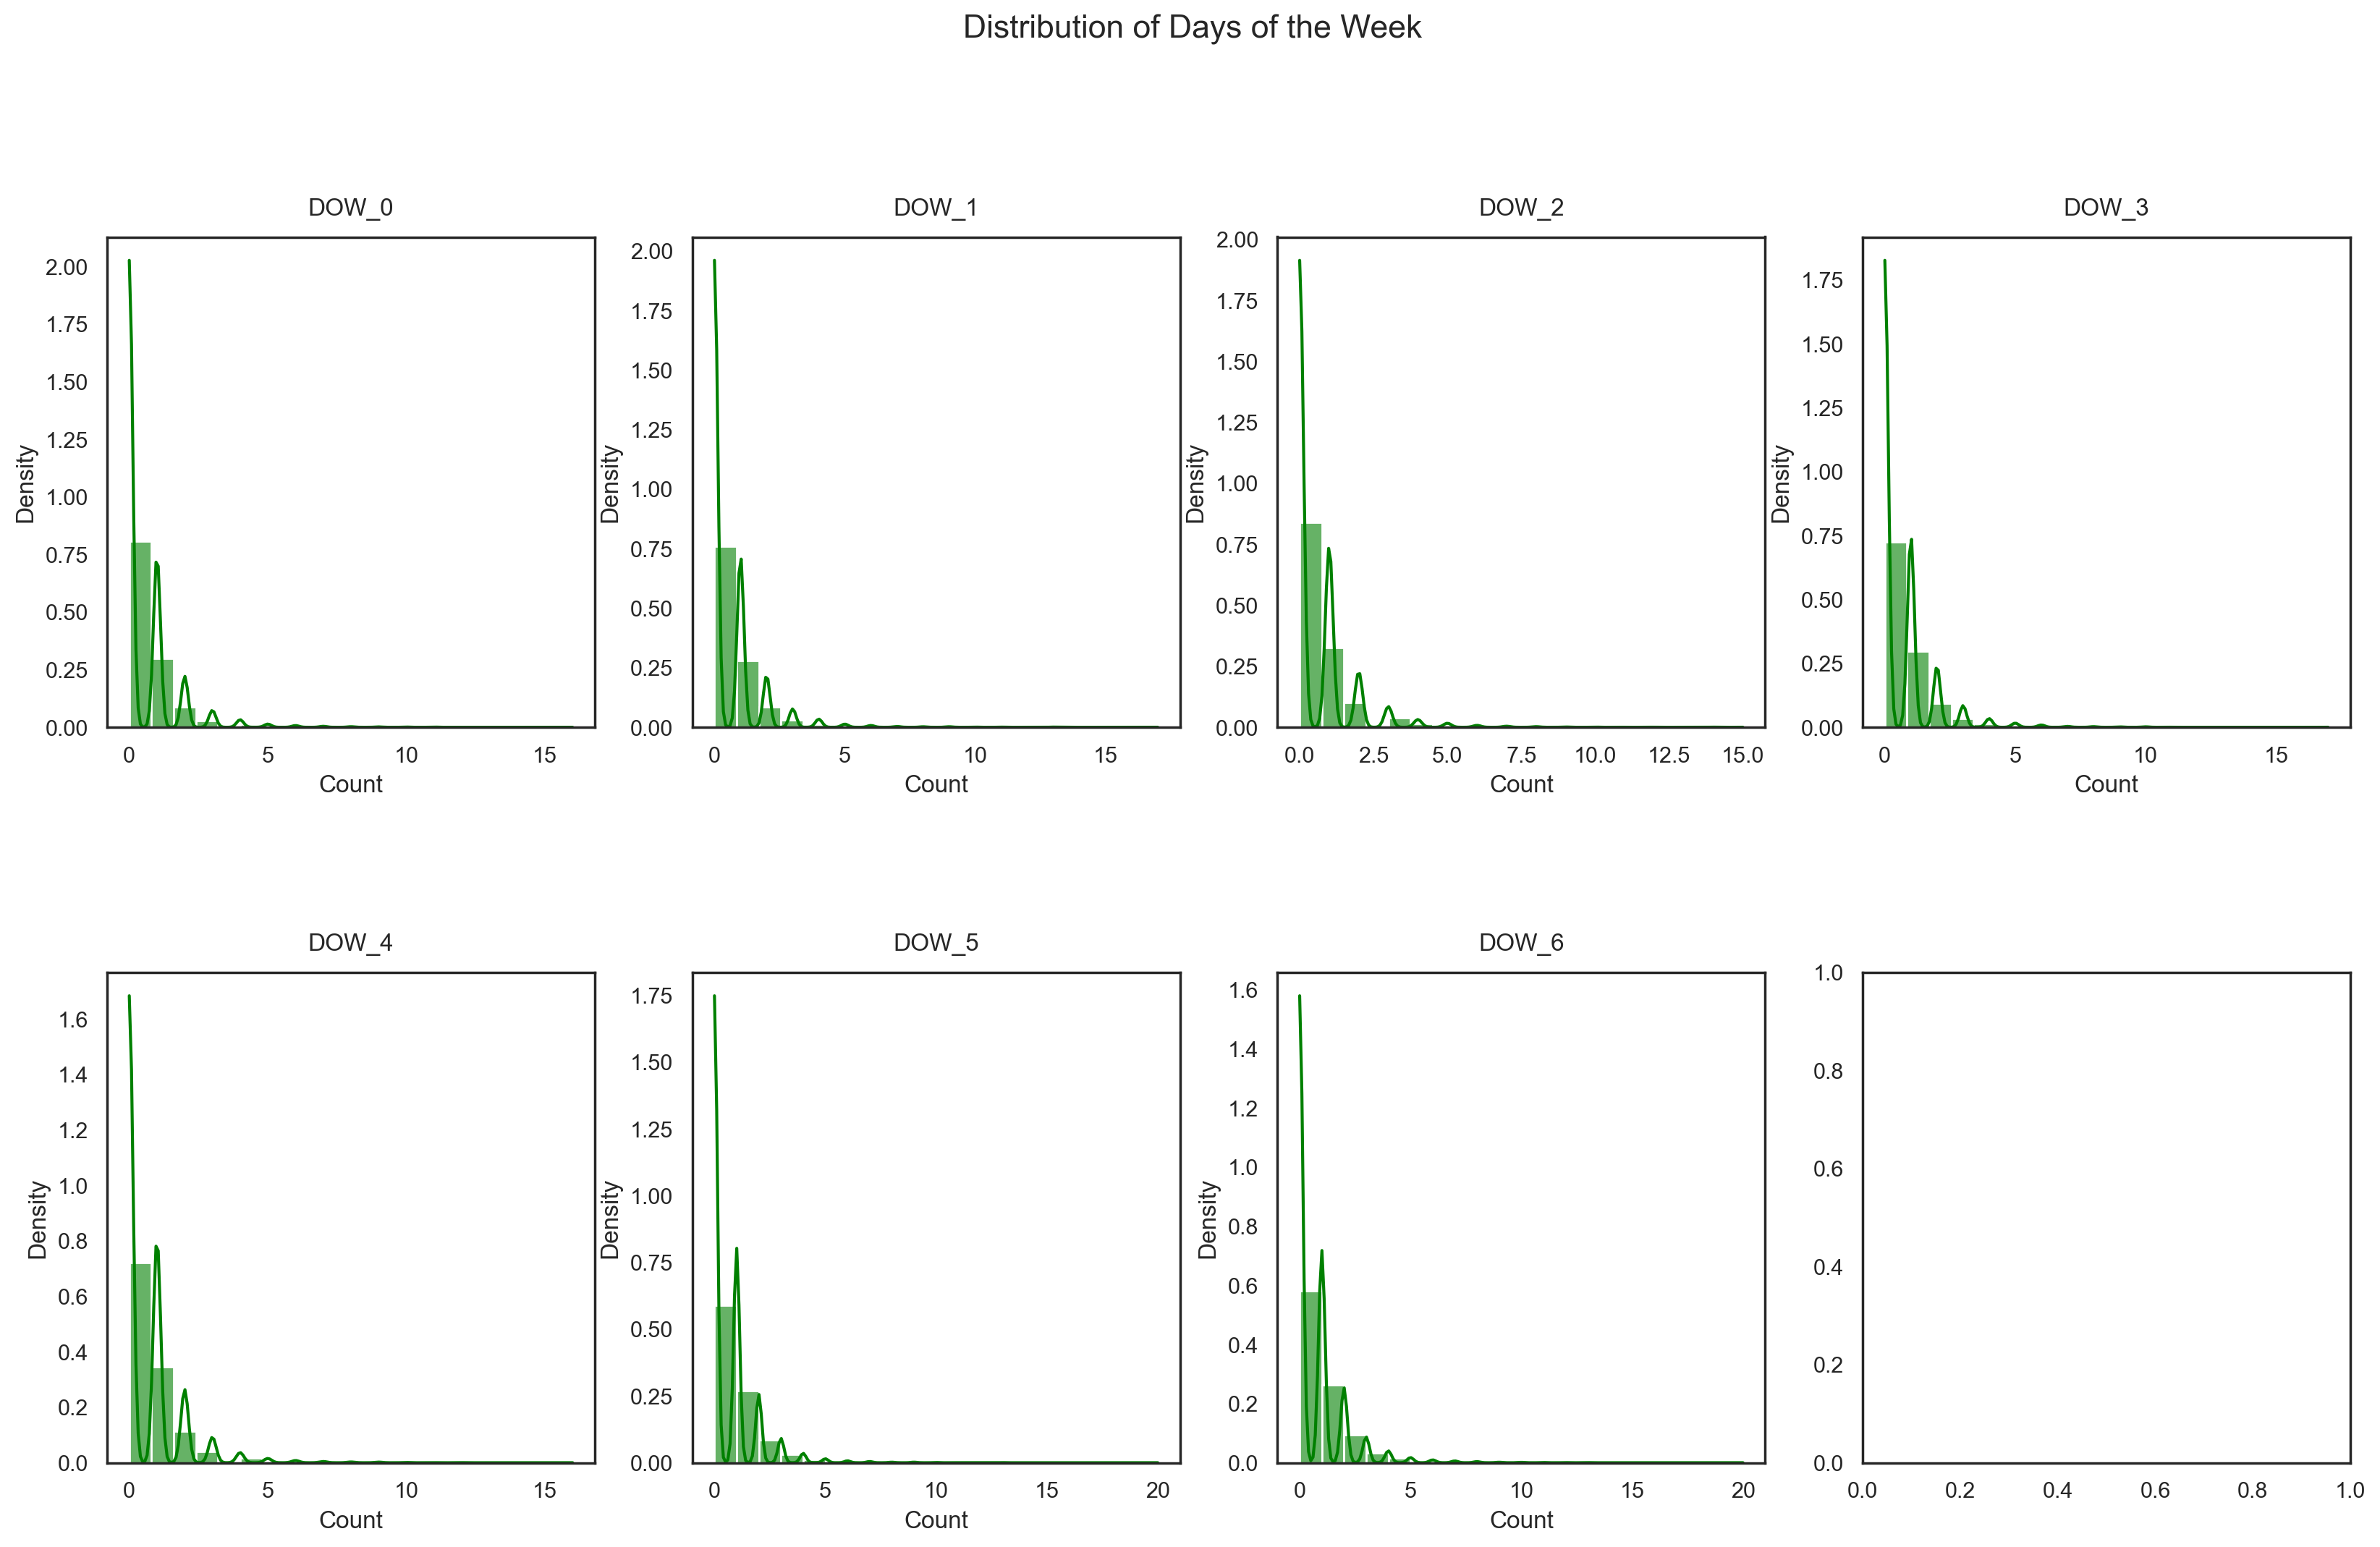

In [489]:
days_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

sns.set_style("white")
# Set up the figure for subplots
sp_rows = 2
sp_cols = 4
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Use a single green color
color = 'green'  # You can also use a hex code like '#008000' if you prefer

# Plot histograms with KDE overlay
for ax, feat in zip(axes.flatten(), days_columns):
    sns.histplot(ABCDE_copy[feat].dropna(), bins=20, kde=True, color=color, ax=ax, stat='density', alpha=0.6)
    ax.set_title(feat, y=1.02)
    ax.set_xlabel('Count')
    ax.set_ylabel('Density')
    ax.grid(False)

# Add a title
plt.suptitle("Distribution of Days of the Week", fontsize=16, y=1.02)

# Adjusting the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Saving the figure 
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Days_histograms_improved.png'), dpi=200)

# Displaying the results
plt.show()


*Box Plots*

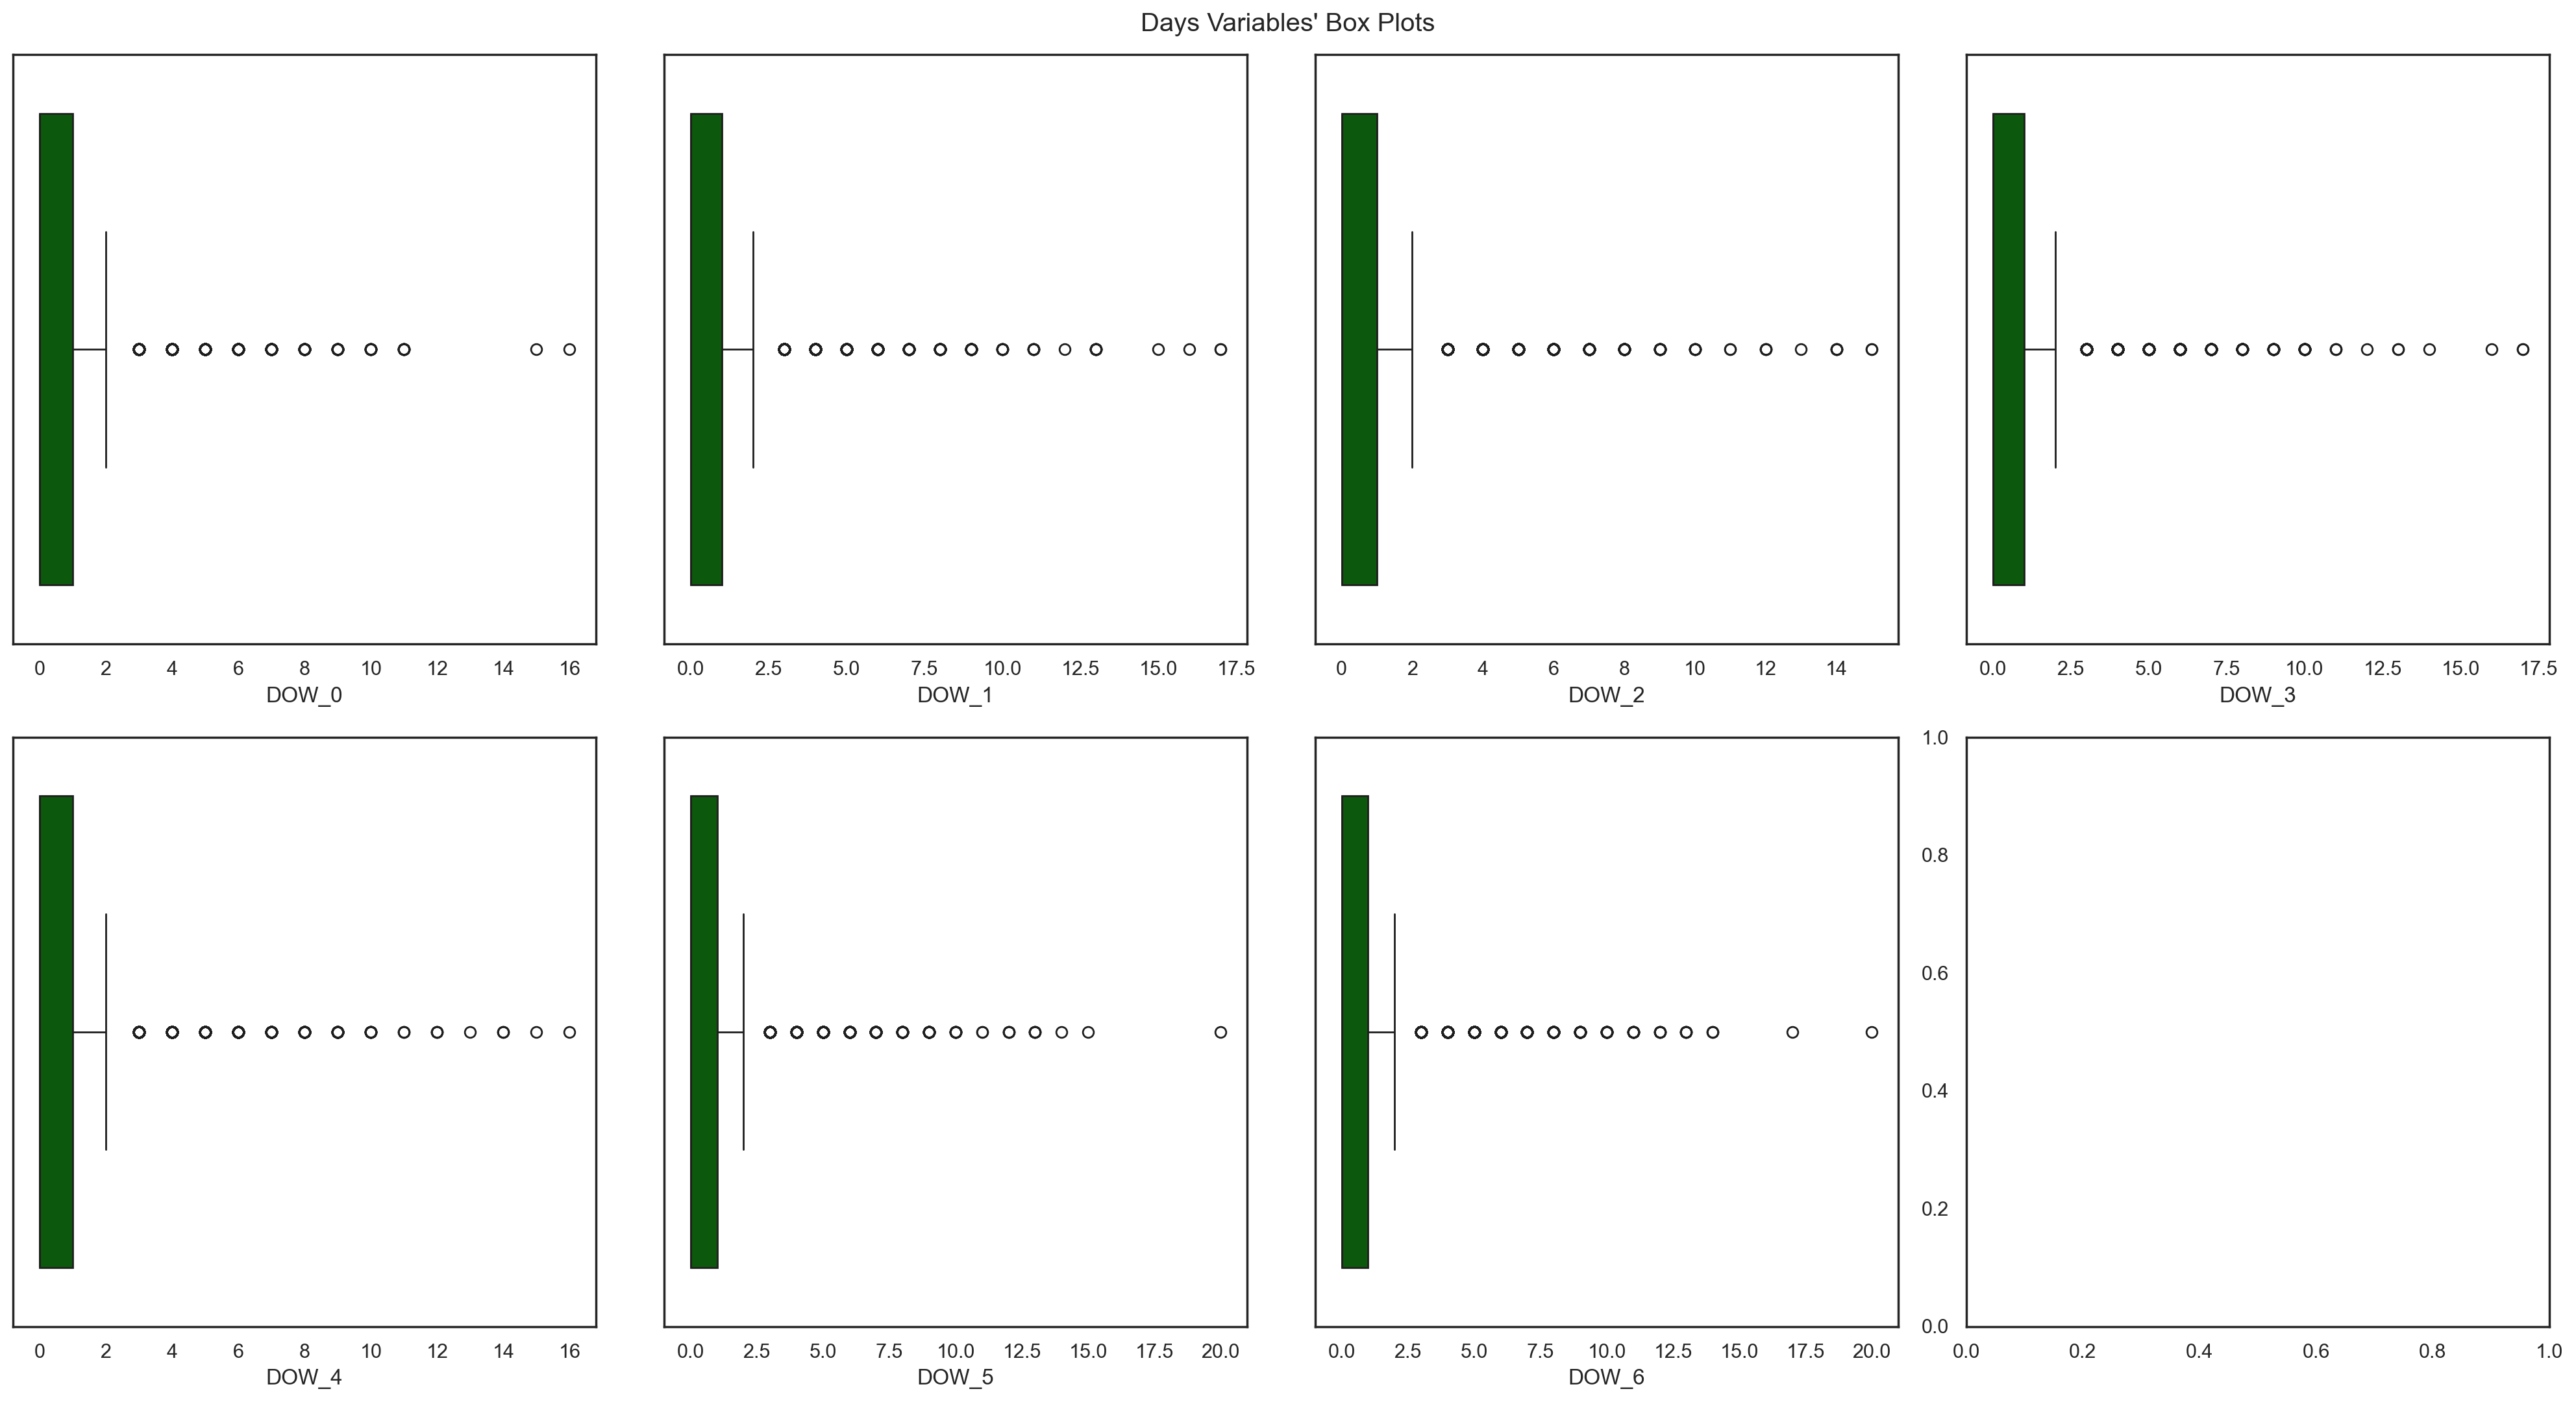

In [78]:
sns.set_style("white")

sp_rows = 2
sp_cols = ceil(len(days_columns) / sp_rows)


fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), days_columns):
    sns.boxplot(x=ABCDE[feat], ax=ax, color='darkgreen')
    
title = "Days Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'days_columns_boxplots.png'), dpi=200)


plt.show()

<a class="anchor" id="age">

### 2.1.23. Hours of the Day

</a>

In [495]:
hours_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
                 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

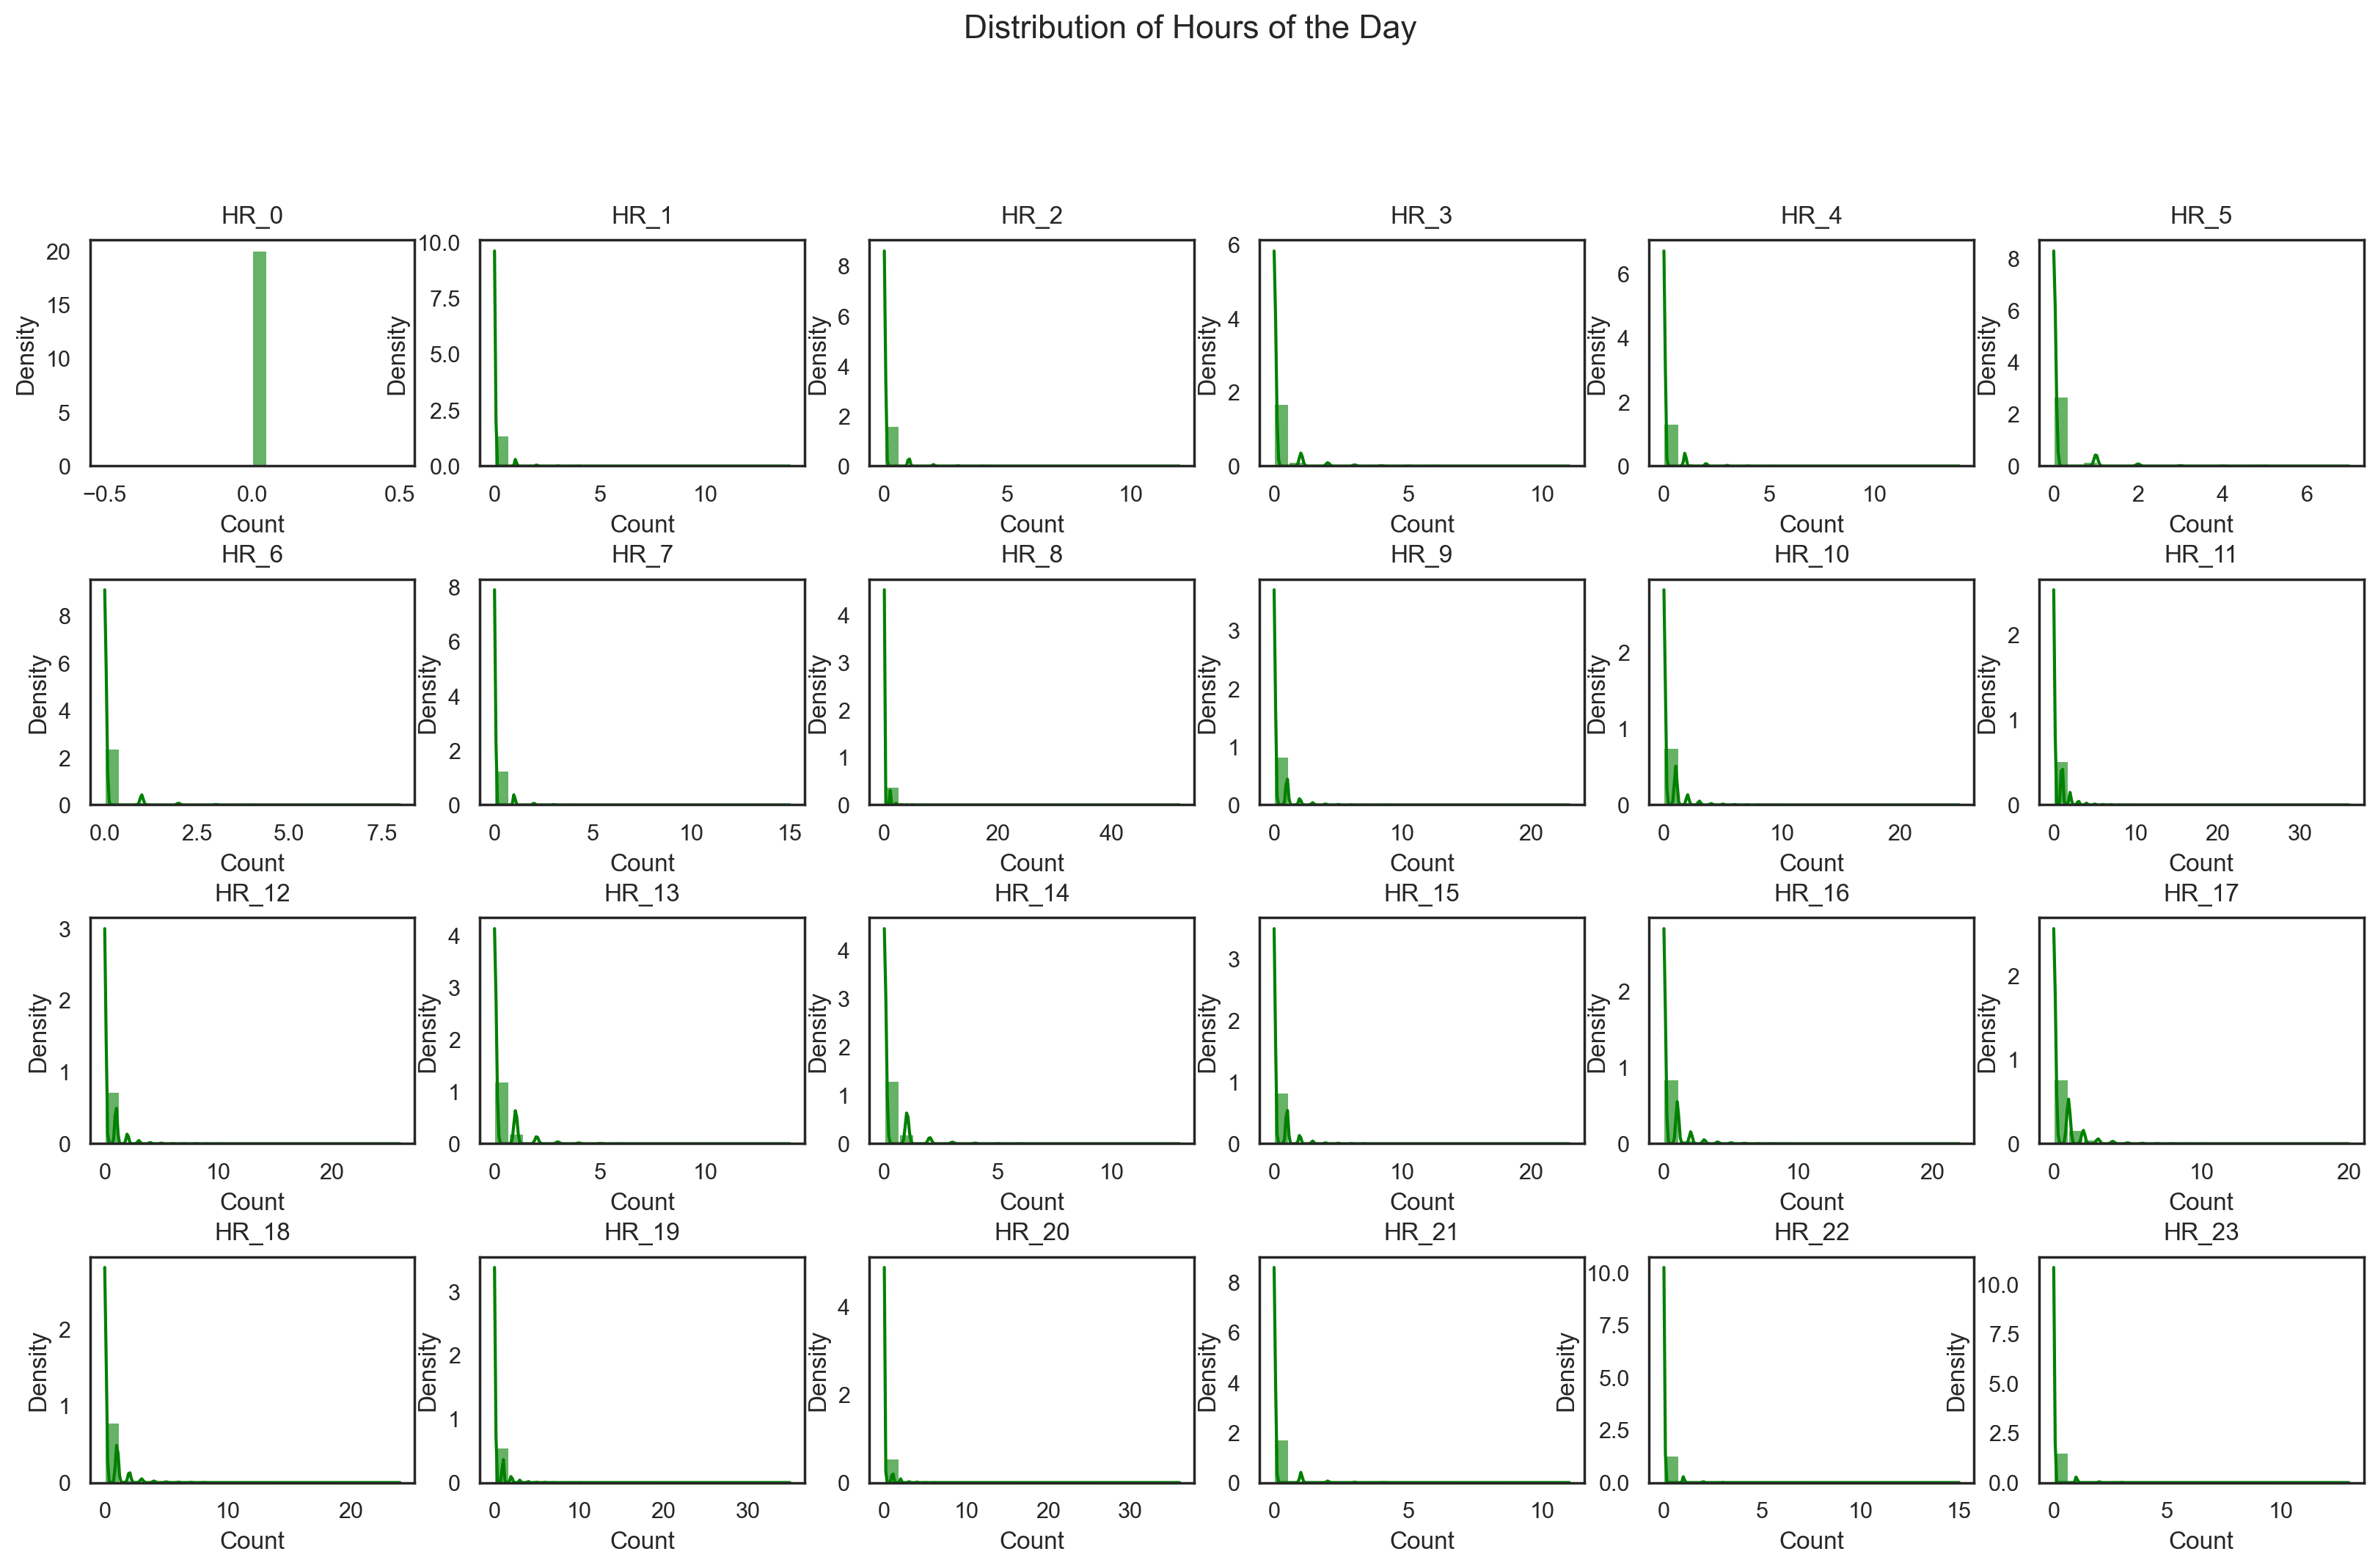

In [81]:
# Specify the columns to visualize
    
sns.set_style("white")

# Set up the figure for subplots
sp_rows = 4
sp_cols = 6
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Define the color to use (single color: green)
color = 'green'  # You can also use a hex code like '#008000' if you prefer

# Plot histograms with KDE overlay
for ax, feat in zip(axes.flatten(), hours_columns):
    sns.histplot(ABCDE_copy[feat].dropna(), bins=20, kde=True, color=color, ax=ax, stat='density', alpha=0.6)
    ax.set_title(feat, y=1.02)
    ax.set_xlabel('Count')
    ax.set_ylabel('Density')
    ax.grid(False)

# Add a title
plt.suptitle("Distribution of Hours of the Day", fontsize=16, y=1.02)

# Adjusting the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Save the figure
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Hours_histograms_improved.png'), dpi=200)

# Display the results
plt.show()

*Box Plots*

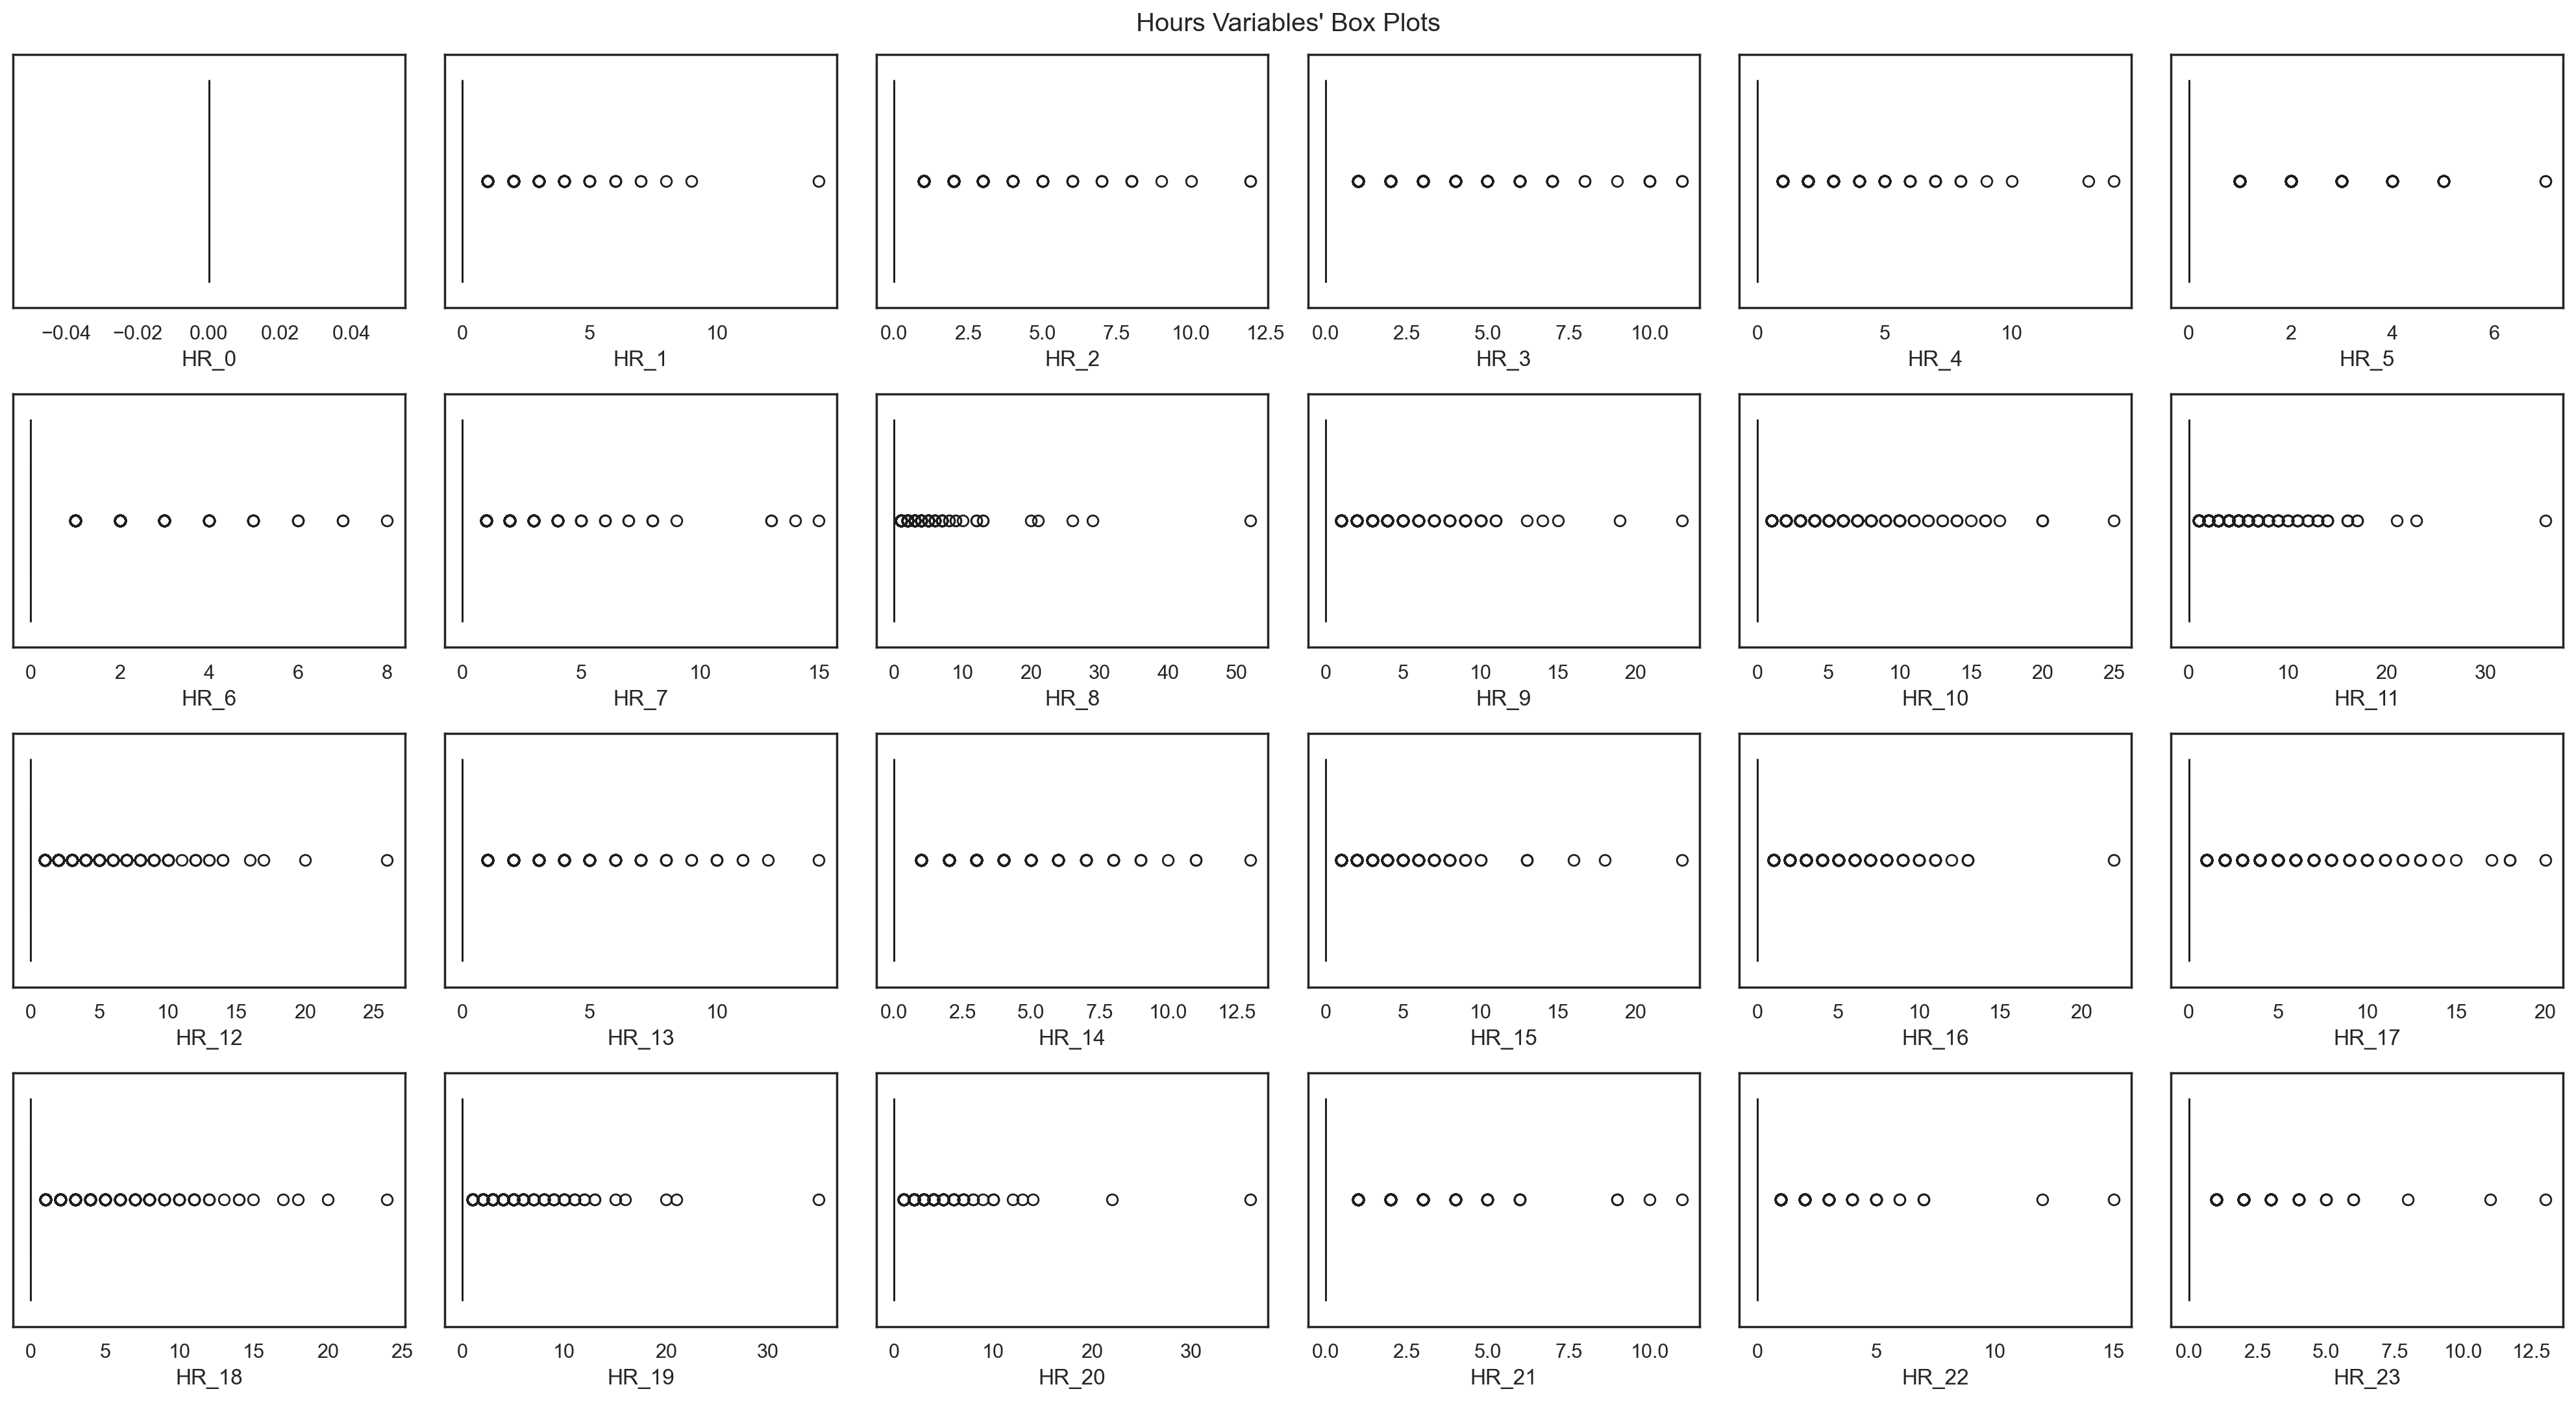

In [83]:
sns.set_style("white")

sp_rows = 4
sp_cols = 6


fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), hours_columns):
    sns.boxplot(x=ABCDE[feat], ax=ax, color='darkgreen')
    
title = "Hours Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'hours_columns_boxplots.png'), dpi=200)


plt.show()

## 2.2. Categorical Visualization <a class="anchor" id="numerical"></a>

In [517]:
# Generate the function for categorical variables
# We get 2 parameters:
#  - data: DataFrame containing the data
#  - categorical_var: str, the name of the categorical variable to analyze
def plot_categorical_analysis(data, categorical_var, order_descending=False):
    sns.set_style("white")

    category_order = data[categorical_var].value_counts(ascending=not order_descending).index
    
    # Set up the figure for one plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # 1. Countplot (Histogram for categorical data)
    sns.countplot(data=data, x=categorical_var, ax=ax, order=category_order, color = 'darkgreen')  # Removed palette argument
    ax.set_title(f"{categorical_var} Distribution")
    ax.set_xlabel(categorical_var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=65)  # Rotate x labels for better readability
  
    # Show the plot
    plt.show()


<a class="anchor" id="age">

### 2.2.1. customer_region

</a>

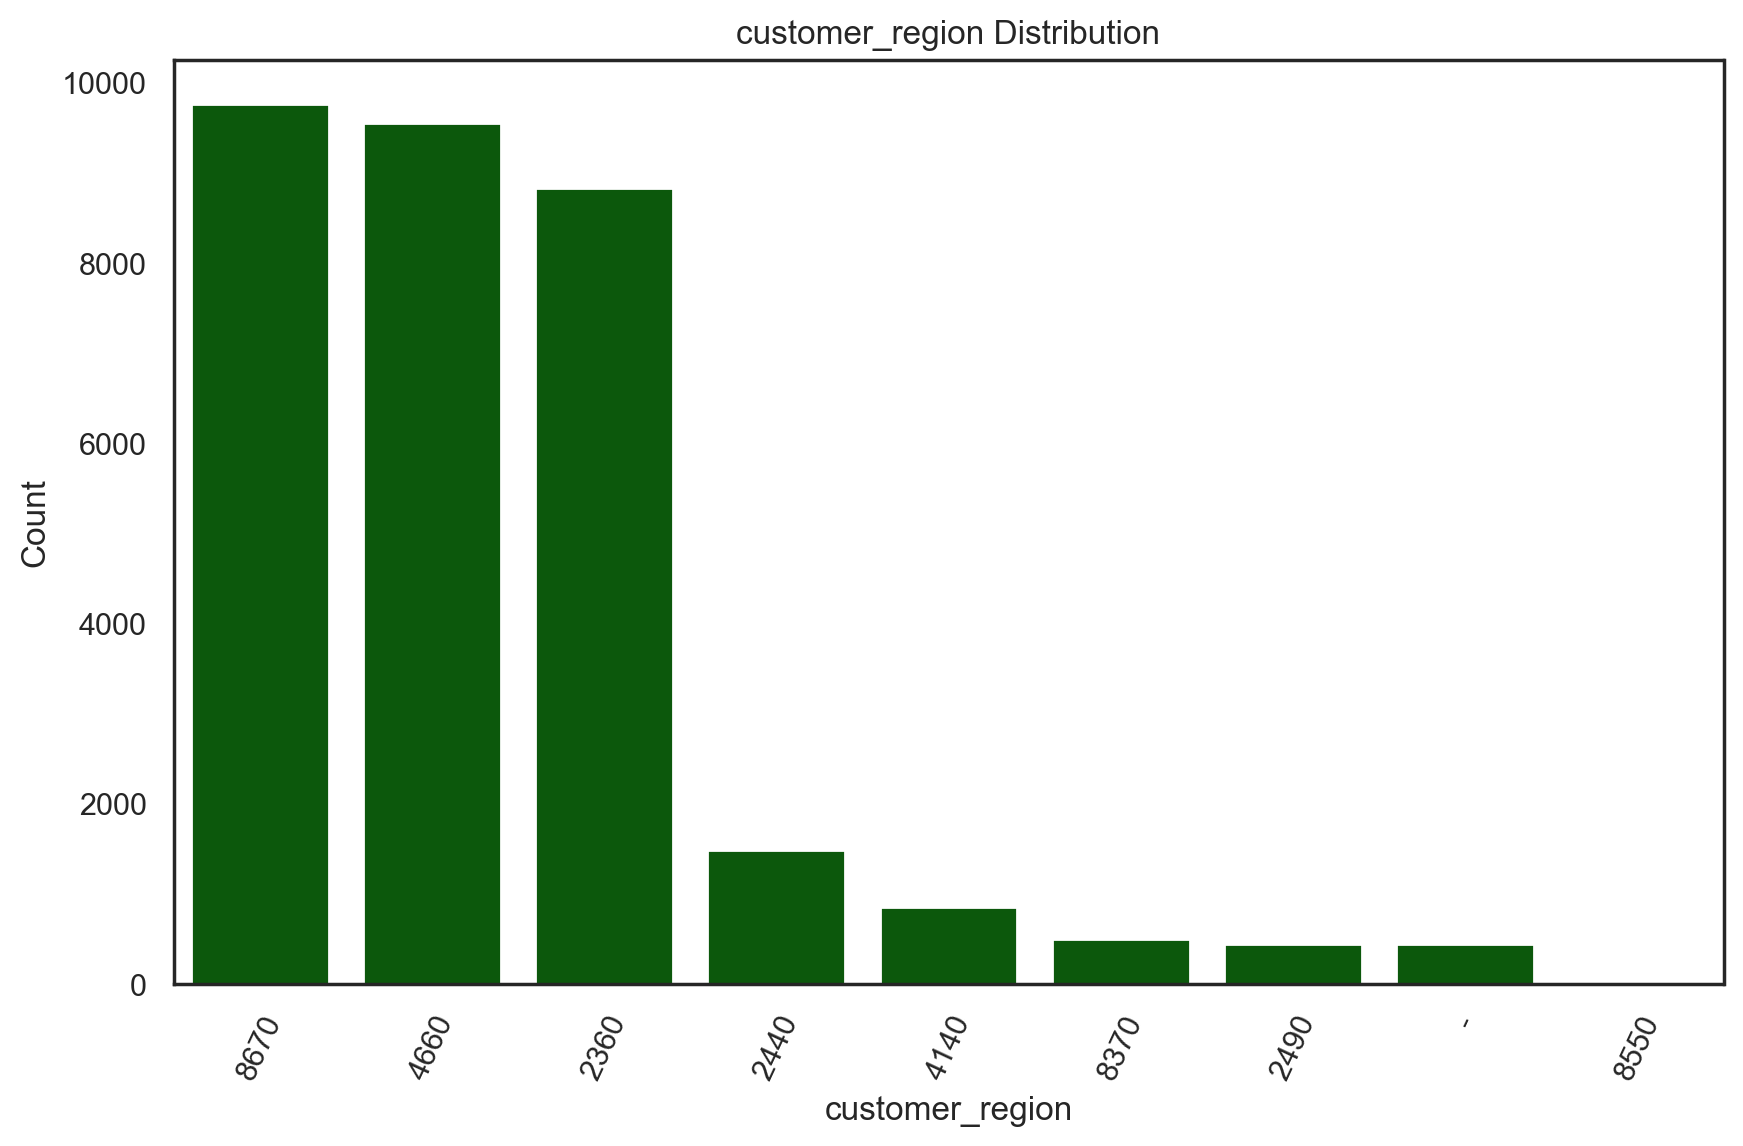

In [87]:
plot_categorical_analysis(data=ABCDE, categorical_var='customer_region', order_descending=True)

<a class="anchor" id="age">

### 2.2.2. last_promo

</a>

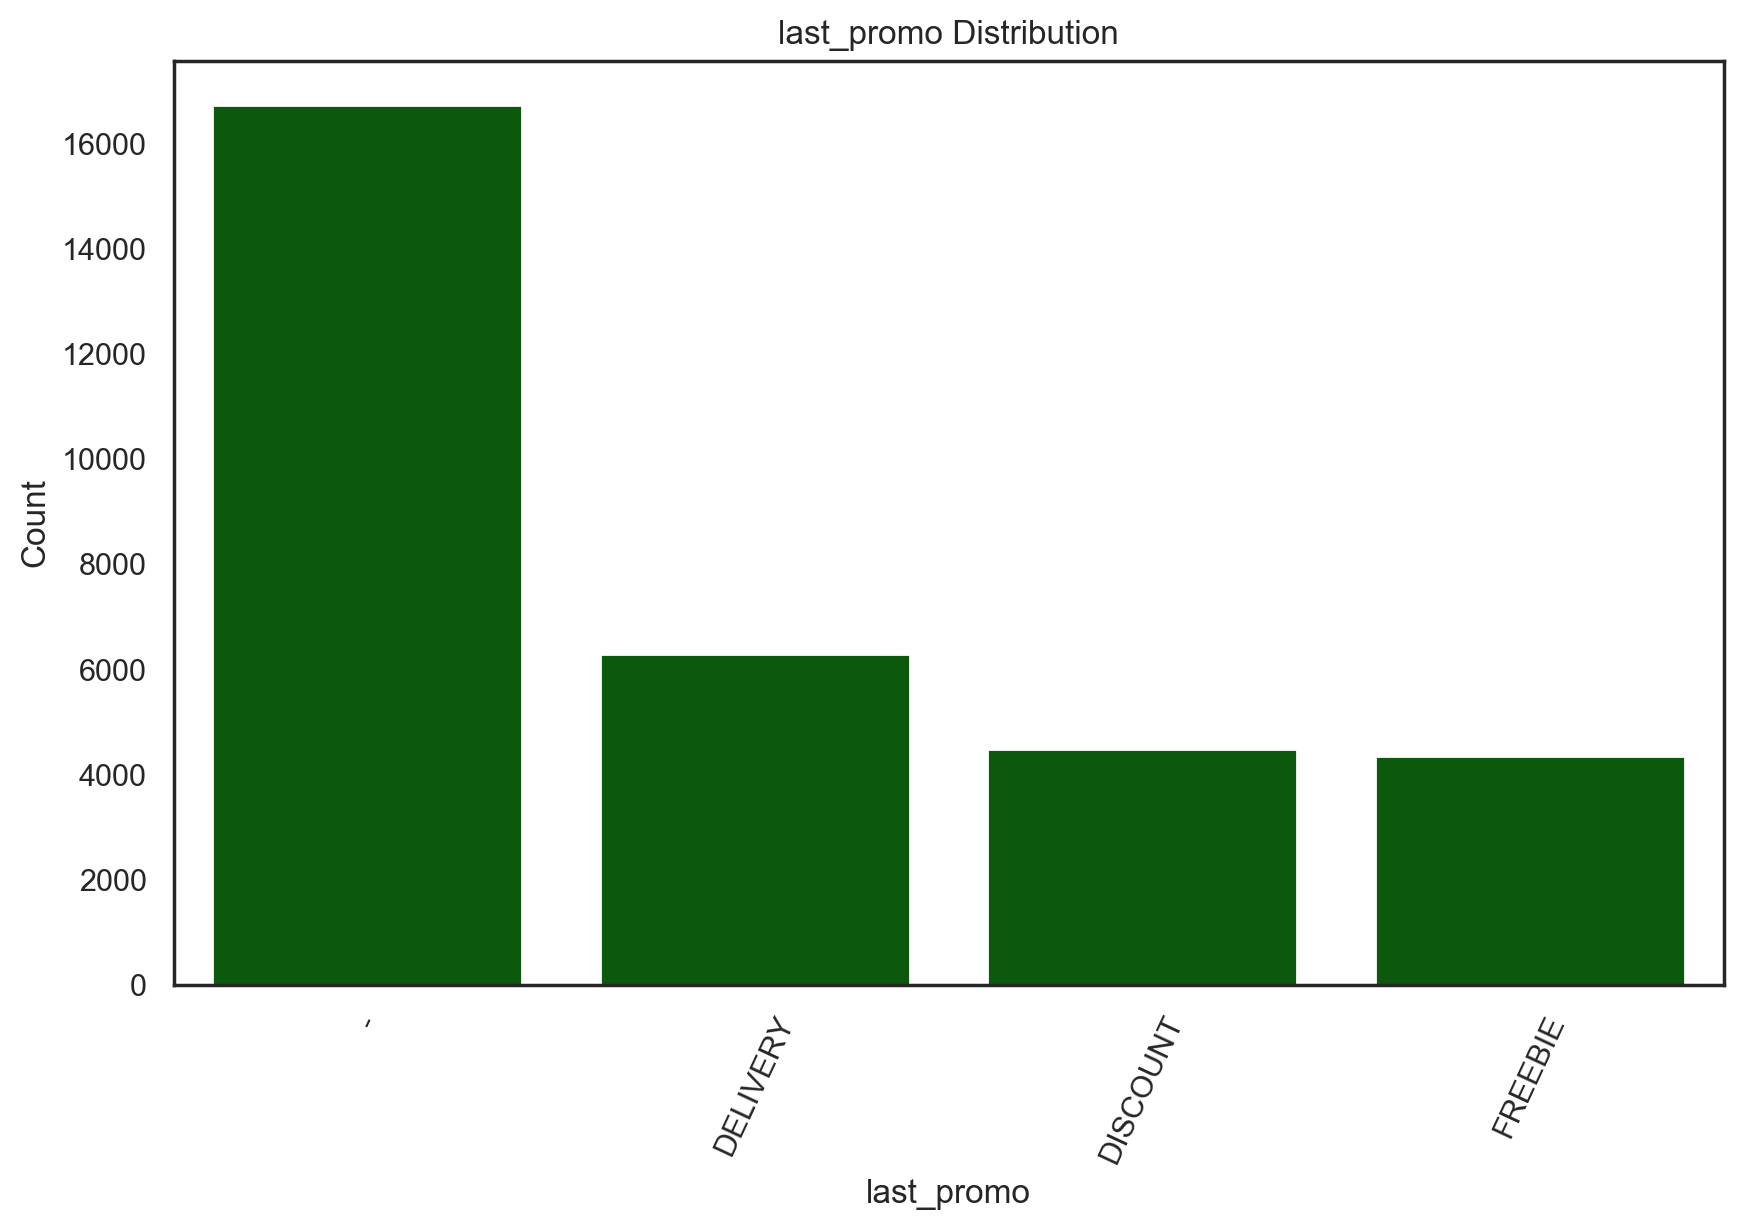

In [89]:
plot_categorical_analysis(data=ABCDE, categorical_var='last_promo', order_descending=True)

<a class="anchor" id="age">

### 2.2.2. payment_method

</a>

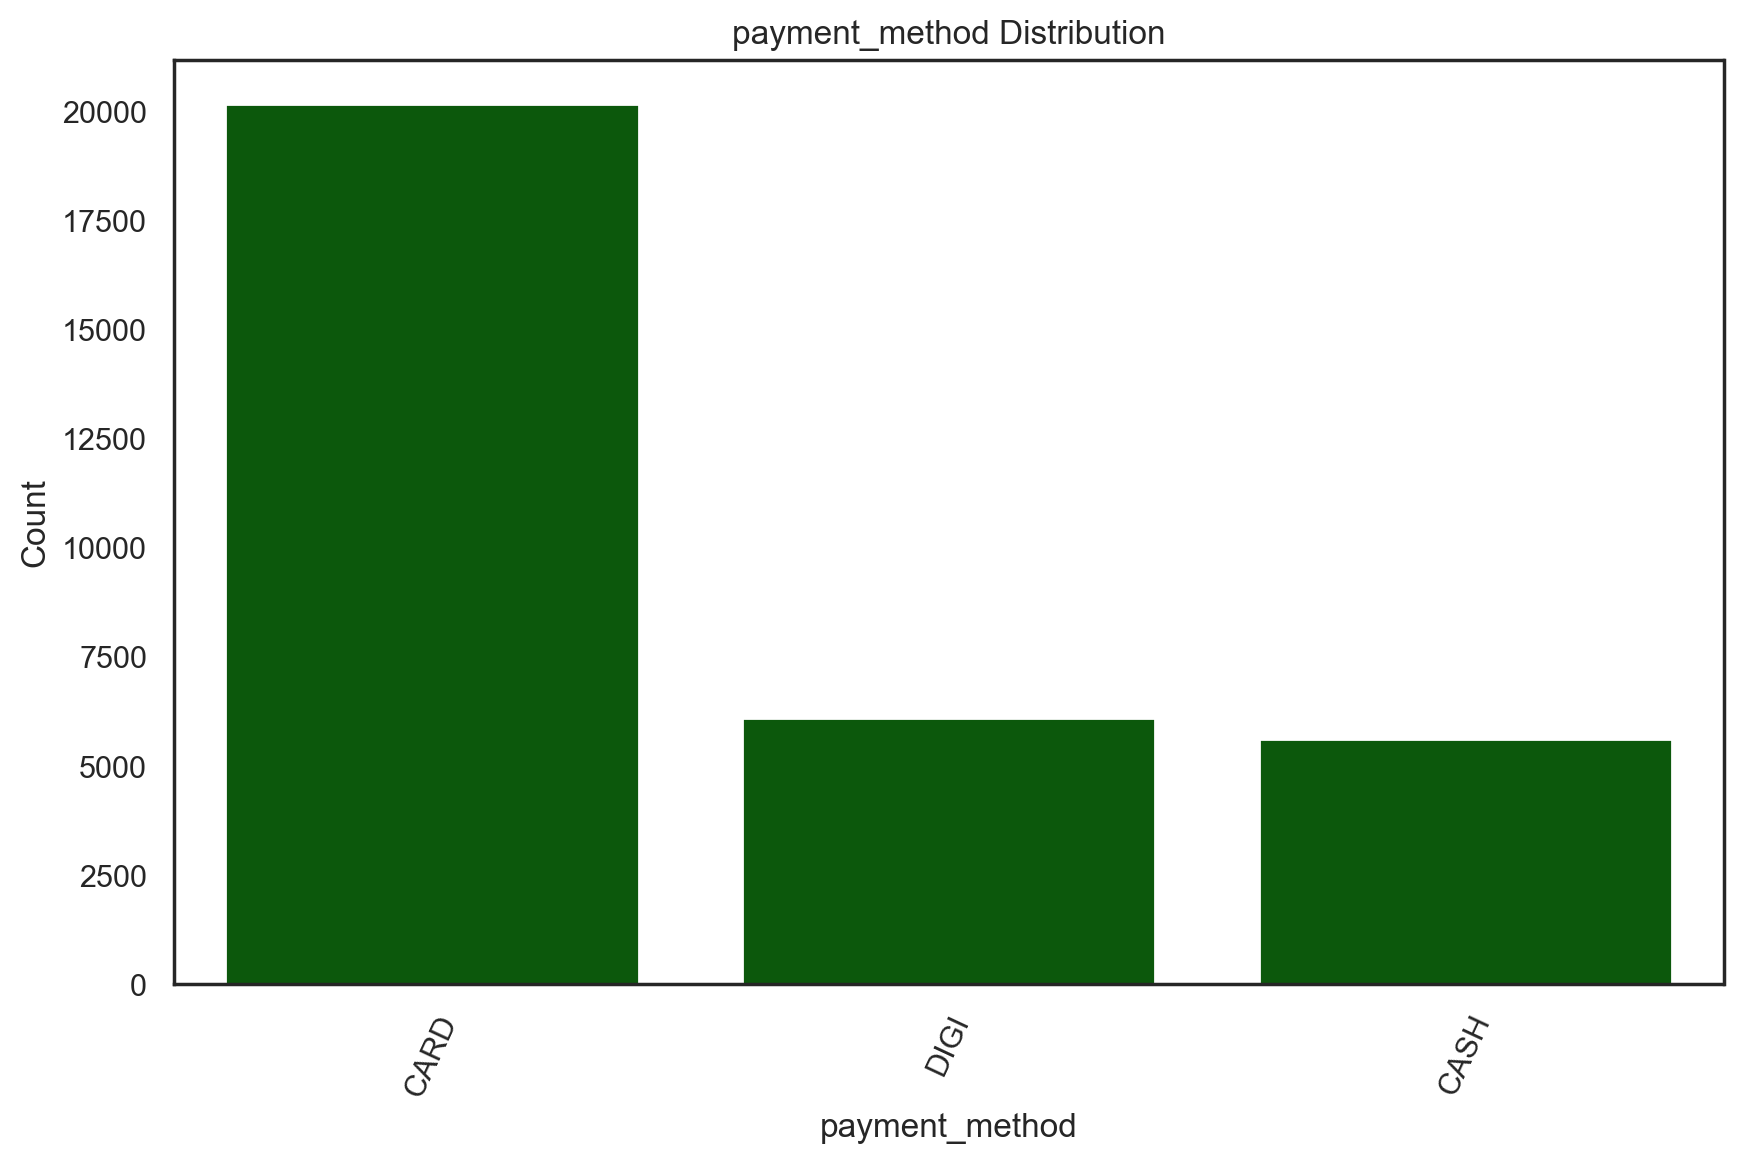

In [91]:
plot_categorical_analysis(data=ABCDE, categorical_var='payment_method', order_descending=True)

## 2.3. Anomalies <a class="anchor" id="22-incoherencies"></a>

### 2.3.1 Incoherences <a class="anchor" id="22-incoherencies"></a>

#### 2.3.1.1 vendor_count = 0 <a class="anchor" id="22-incoherencies"></a>

vendor_count equals 0 meaning that the customer didn't pass an order

In [96]:
ABCDE[ABCDE['vendor_count'] == 0].describe(include='number').T

count       mean        std   min    25%   50%  \
customer_age              138.0  27.065217   6.951560  17.0  22.00  26.0   
vendor_count              138.0   0.000000   0.000000   0.0   0.00   0.0   
product_count             138.0   0.000000   0.000000   0.0   0.00   0.0   
is_chain                  138.0   0.543478   0.499921   0.0   0.00   1.0   
first_order               138.0  44.659420  25.934645   1.0  22.25  44.0   
last_order                138.0  44.659420  25.934645   1.0  22.25  44.0   
CUI_American              138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Asian                 138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Beverages             138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Cafe                  138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Chicken Dishes        138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Chinese               138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Desserts              138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Healthy               138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Indian                138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Italian               138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Japanese              138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Noodle Dishes         138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_OTHER                 138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Street Food / Snacks  138.0   0.000000   0.000000   0.0   0.00   0.0   
CUI_Thai                  138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_0                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_1                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_2                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_3                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_4                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_5                     138.0   0.000000   0.000000   0.0   0.00   0.0   
DOW_6                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_0                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_1                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_2                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_3                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_4                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_5                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_6                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_7                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_8                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_9                      138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_10                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_11                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_12                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_13                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_14                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_15                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_16                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_17                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_18                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_19                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_20                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_21                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_22                     138.0   0.000000   0.000000   0.0   0.00   0.0   
HR_23                     138.0   0.000000   0.000000   0.0   0.00   0.0  

In [97]:
ABCDE[ABCDE['vendor_count'] == 0].describe(include='category').T

count unique   top freq
customer_region   138      1  8670  138
last_promo        138      4     -   51
payment_method    138      3  CARD   54

#### 2.3.1.2 product_count = 0 <a class="anchor" id="22-incoherencies"></a>

It's considered an incoherence since the customer didn't buy any product in his order

In [100]:
ABCDE[ABCDE['product_count'] == 0].describe(include='number').T

count       mean        std   min   25%   50%  \
customer_age              156.0  27.358974   6.921634  17.0  22.0  26.0   
vendor_count              156.0   0.115385   0.320514   0.0   0.0   0.0   
product_count             156.0   0.000000   0.000000   0.0   0.0   0.0   
is_chain                  156.0   0.480769   0.501239   0.0   0.0   0.0   
first_order               156.0  44.801282  26.427605   1.0  21.0  42.5   
last_order                156.0  44.801282  26.427605   1.0  21.0  42.5   
CUI_American              156.0   0.105256   1.314652   0.0   0.0   0.0   
CUI_Asian                 156.0   0.122821   1.534028   0.0   0.0   0.0   
CUI_Beverages             156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Cafe                  156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Chicken Dishes        156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Chinese               156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Desserts              156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Healthy               156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Indian                156.0   0.163782   1.607375   0.0   0.0   0.0   
CUI_Italian               156.0   0.641538   2.486617   0.0   0.0   0.0   
CUI_Japanese              156.0   0.033974   0.424340   0.0   0.0   0.0   
CUI_Noodle Dishes         156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_OTHER                 156.0   0.142564   1.780625   0.0   0.0   0.0   
CUI_Street Food / Snacks  156.0   0.000000   0.000000   0.0   0.0   0.0   
CUI_Thai                  156.0   0.000000   0.000000   0.0   0.0   0.0   
DOW_0                     156.0   0.006410   0.080064   0.0   0.0   0.0   
DOW_1                     156.0   0.019231   0.137777   0.0   0.0   0.0   
DOW_2                     156.0   0.006410   0.080064   0.0   0.0   0.0   
DOW_3                     156.0   0.006410   0.080064   0.0   0.0   0.0   
DOW_4                     156.0   0.025641   0.158571   0.0   0.0   0.0   
DOW_5                     156.0   0.038462   0.192927   0.0   0.0   0.0   
DOW_6                     156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_0                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_1                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_2                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_3                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_4                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_5                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_6                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_7                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_8                      156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_9                      156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_10                     156.0   0.006410   0.080064   0.0   0.0   0.0   
HR_11                     156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_12                     156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_13                     156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_14                     156.0   0.019231   0.137777   0.0   0.0   0.0   
HR_15                     156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_16                     156.0   0.006410   0.080064   0.0   0.0   0.0   
HR_17                     156.0   0.006410   0.080064   0.0   0.0   0.0   
HR_18                     156.0   0.012821   0.112862   0.0   0.0   0.0   
HR_19                     156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_20                     156.0   0.006410   0.080064   0.0   0.0   0.0   
HR_21                     156.0   0.006410   0.080064   0.0   0.0   0.0   
HR_22                     156.0   0.000000   0.000000   0.0   0.0   0.0   
HR_23                     156.0   0.000000   0.000000   0.0   0.0   0.0   

                            75%    max  
customer_

In [101]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)]

customer_id customer_region  customer_age  vendor_count  product_count  \
6180   aed85972bb            4660          27.0             1              0   
6183   b2ebe2e6e0            4660          43.0             1              0   
10995  6f723d9894            4660          36.0             1              0   
14137  9d74f2ac81            4660          27.0             1              0   
14611  27b7eed8fa            4660          35.0             1              0   
14639  6c9e68b2e7            4660          22.0             1              0   
16099  c0b330c4df            4660          27.0             1              0   
17200  68c4faeecb            4660          25.0             1              0   
19972  48e8abd5bf            4660          34.0             1              0   
23095  7bfc19bd89            4660          21.0             1              0   
27237  a8db558a22            4660          26.0             1              0   
28276  85df5faf5f            4660          43.0             1              0   
29635  eab40fe900            4660          32.0             1              0   
29996  1627baf46d            4660          23.0             1              0   
31233  bef195917e            4660          26.0             1              0   
31315  75aa64f1f1            4660          28.0             1              0   
31449  eb83bc9600            4660          28.0             1              0   
31730  8d21b0b83c            4660          30.0             1              0   

       is_chain  first_order  last_order last_promo payment_method  \
6180          0          6.0           6   DISCOUNT           CARD   
6183          0          6.0           6          -           CARD   
10995         0         13.0          13   DELIVERY           CASH   
14137         0         19.0          19   DELIVERY           CARD   
14611         0         20.0          20   DISCOUNT           DIGI   
14639         0         20.0          20   DISCOUNT           DIGI   
16099         0         23.0          23   DELIVERY           CARD   
17200         0         26.0          26    FREEBIE           DIGI   
19972         0         33.0          33   DELIVERY           CASH   
23095         0         42.0          42   DISCOUNT           DIGI   
27237         0         60.0          60          -           CARD   
28276         0         65.0          65   DISCOUNT           CARD   
29635         0         73.0          73   DELIVERY           CARD   
29996         0         76.0          76          -           DIGI   
31233         0         84.0          84   DELIVERY           CARD   
31315         0         85.0          85          -           CASH   
31449         0         86.0          86   DELIVERY           CARD   
31730         0         89.0          89   DELIVERY           DIGI   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
6180           0.00       0.00            0.0       0.0                 0.0   
6183           0.00       0.00            0.0       0.0                 0.0   
10995          0.00       0.00            0.0       0.0                 0.0   
14137          0.00       0.00            0.0       0.0                 0.0   
14611          0.00       0.00            0.0       0.0                 0.0   
14639          0.00       0.00            0.0       0.0                 0.0   
16099          0.00       0.00            0.0       0.0                 0.0   
17200          0.00       0.00            0.0       0.0                 0.0   
19972          0.00       0.00            0.0       0.0                 0.0   
23095          0.00       0.00            0.0       0.0                 0.0   
27237          0.00       0.00            0.0       0.0                 0.0   
28276          0.00       0.00            0.0       0.0                 0.0   
29635          0.00       0.00            0.0       0.0                 0.0   
29996          0.00      19.16            0.0   

In [102]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)].describe().T

count       mean        std   min   25%     50%  \
customer_age               18.0  29.611111   6.427321  21.0  26.0  27.500   
vendor_count               18.0   1.000000   0.000000   1.0   1.0   1.000   
product_count              18.0   0.000000   0.000000   0.0   0.0   0.000   
is_chain                   18.0   0.000000   0.000000   0.0   0.0   0.000   
first_order                18.0  45.888889  30.758813   6.0  20.0  37.500   
last_order                 18.0  45.888889  30.758813   6.0  20.0  37.500   
CUI_American               18.0   0.912222   3.870231   0.0   0.0   0.000   
CUI_Asian                  18.0   1.064444   4.516055   0.0   0.0   0.000   
CUI_Beverages              18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Cafe                   18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Chicken Dishes         18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Chinese                18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Desserts               18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Healthy                18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Indian                 18.0   1.419444   4.655070   0.0   0.0   0.000   
CUI_Italian                18.0   5.560000   5.236557   0.0   0.0   5.155   
CUI_Japanese               18.0   0.294444   1.249222   0.0   0.0   0.000   
CUI_Noodle Dishes          18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_OTHER                  18.0   1.235556   5.242018   0.0   0.0   0.000   
CUI_Street Food / Snacks   18.0   0.000000   0.000000   0.0   0.0   0.000   
CUI_Thai                   18.0   0.000000   0.000000   0.0   0.0   0.000   
DOW_0                      18.0   0.055556   0.235702   0.0   0.0   0.000   
DOW_1                      18.0   0.166667   0.383482   0.0   0.0   0.000   
DOW_2                      18.0   0.055556   0.235702   0.0   0.0   0.000   
DOW_3                      18.0   0.055556   0.235702   0.0   0.0   0.000   
DOW_4                      18.0   0.222222   0.427793   0.0   0.0   0.000   
DOW_5                      18.0   0.333333   0.485071   0.0   0.0   0.000   
DOW_6                      18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_0                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_1                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_2                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_3                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_4                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_5                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_6                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_7                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_8                       18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_9                       18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_10                      18.0   0.055556   0.235702   0.0   0.0   0.000   
HR_11                      18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_12                      18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_13                      18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_14                      18.0   0.166667   0.383482   0.0   0.0   0.000   
HR_15                      18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_16                      18.0   0.055556   0.235702   0.0   0.0   0.000   
HR_17                      18.0   0.055556   0.235702   0.0   0.0   0.000   
HR_18                      18.0   0.111111   0.323381   0.0   0.0   0.000   
HR_19                      18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_20                      18.0   0.055556   0.235702   0.0   0.0   0.000   
HR_21                      18.0   0.055556   0.235702   0.0   0.0   0.000   
HR_22                      18.0   0.000000   0.000000   0.0   0.0   0.000   
HR_23                 

In [103]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)].describe(include='category').T

count unique       top freq
customer_region    18      1      4660   18
last_promo         18      4  DELIVERY    8
payment_method     18      3      CARD    9

In [104]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==0)]

customer_id customer_region  customer_age  vendor_count  product_count  \
1449   4903041977            8670          22.0             0              0   
1476   c94b288475            8670          26.0             0              0   
1488   f687717dc1            8670          21.0             0              0   
2486   c6cf0b76fb            8670          38.0             0              0   
3391   1b7c34738e            8670          24.0             0              0   
...           ...             ...           ...           ...            ...   
31377  177ede2420            8670          30.0             0              0   
31553  0039059c9c            8670          22.0             0              0   
31667  0e60632fe2            8670          23.0             0              0   
31680  28ed1f1e3f            8670          20.0             0              0   
31695  4c06e104de            8670          25.0             0              0   

       is_chain  first_order  last_order last_promo payment_method  \
1449          1          1.0           1   DELIVERY           DIGI   
1476          0          1.0           1   DELIVERY           CASH   
1488          1          1.0           1   DELIVERY           DIGI   
2486          0          2.0           2   DELIVERY           CASH   
3391          0          3.0           3          -           CASH   
...         ...          ...         ...        ...            ...   
31377         1         86.0          86          -           DIGI   
31553         1         88.0          88   DISCOUNT           CARD   
31667         0         89.0          89   DISCOUNT           CARD   
31680         0         89.0          89   DELIVERY           DIGI   
31695         1         89.0          89          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
1449            0.0        0.0            0.0       0.0                 0.0   
1476            0.0        0.0            0.0       0.0                 0.0   
1488            0.0        0.0            0.0       0.0                 0.0   
2486            0.0        0.0            0.0       0.0                 0.0   
3391            0.0        0.0            0.0       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31377           0.0        0.0            0.0       0.0                 0.0   
31553           0.0        0.0            0.0       0.0                 0.0   
31667           0.0        0.0            0.0       0.0                 0.0   
31680           0.0        0.0            0.0       0.0                 0.0   
31695           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
1449           0.0           0.0          0.0         0.0          0.0   
1476           0.0           0.0          0.0         0.0          0.0   
1488           0.0           0.0          0.0         0.0          0.0   
2486           0.0           0.0          0.0         0.0          0.0   
3391           0.0           0.0          0.0         0.0          0.0   
...            ...           ...          ...         ...          ...   
31377          0.0           0.0          0.0         0.0          0.0   
31553          0.0           0.0          0.0         0.0          0.0   
31667          0.0           0.0          0.0         0.0          0.0   
31680          0.0           0.0          0.0         0.0          0.0   
31695          0.0           0.0          0.0         0.0          0.0   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
1449            0.0                0.0        0.0                       0.0   
1476            0.0                0.0        0.0                       0.0   
1488            0.0                0.0        0.0                       0.0   
2486            0.0                0.0        0.0 

### 2.3.2 Duplicates <a class="anchor" id="22-incoherencies"></a>

For duplicates analysis, we want to consider only the features without customer_id, since this doesn't tell us any information about the customers and these unique values could simply be the result of a new automated data entry:

In [107]:
subset = ABCDE.columns.drop('customer_id')

In [108]:
duplicate_rows = ABCDE[ABCDE.duplicated(subset=subset, keep=False)] #keep=False, to showcase both the first ocurrence and its duplicate
duplicate_rows

customer_id customer_region  customer_age  vendor_count  product_count  \
43     412c8c0b2d            2360          24.0             1              2   
45     4336560739            2360          24.0             1              2   
1641   11a56d6fbf            4660          32.0             3              4   
1647   dcc76a0a1b            4660          32.0             3              4   
3355   b55012ee1c            8550          23.0             4             11   
...           ...             ...           ...           ...            ...   
31088  a6bdd77ae2            8670          30.0             1              1   
31472  1f616608ed            2360          23.0             1              2   
31538  6020a9ce3d            2360          23.0             1              2   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
43            0          0.0          11   DELIVERY           DIGI   
45            0          0.0          11   DELIVERY           DIGI   
1641          3          1.0          43          -           CARD   
1647          3          1.0          43          -           CARD   
3355          1          2.0          89    FREEBIE           CARD   
...         ...          ...         ...        ...            ...   
31088         0         83.0          83   DELIVERY           DIGI   
31472         1         87.0          87   DELIVERY           CARD   
31538         1         87.0          87   DELIVERY           CARD   
31639         1         88.0          88          -           DIGI   
31653         1         88.0          88          -           DIGI   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
43             0.00       0.00            0.0       0.0                 0.0   
45             0.00       0.00            0.0       0.0                 0.0   
1641          10.15       0.00            0.0       0.0                 0.0   
1647          10.15       0.00            0.0       0.0                 0.0   
3355           0.00      93.43            0.0       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31088          0.00      11.59            0.0       0.0                 0.0   
31472          0.00      10.00            0.0       0.0                 0.0   
31538          0.00      10.00            0.0       0.0                 0.0   
31639          0.00       0.00            0.0       0.0                 0.0   
31653          0.00       0.00            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
43           10.36           0.0          0.0        0.00          0.0   
45           10.36           0.0          0.0        0.00          0.0   
1641          0.00           0.0          0.0        6.29          0.0   
1647          0.00           0.0          0.0        6.29          0.0   
3355          0.00           0.0          0.0        0.00          0.0   
...            ...           ...          ...         ...          ...   
31088         0.00           0.0          0.0        0.00          0.0   
31472         0.00           0.0          0.0        0.00          0.0   
31538         0.00           0.0          0.0        0.00          0.0   
31639         0.00           0.0          0.0        0.00          0.0   
31653         0.00           0.0          0.0        0.00          0.0   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
43             0.00                0.0        0.0                       0.0   
45             0.00                0.0        0.0                       0.0   
1641          14.73                0.0        0.0                       0.0   
1647          14.73                0.0        0.0 

#### 2.3.3 Missing Values <a class="anchor" id="25-missing-values"></a>

In [110]:
#Checking if there are missing values
ABCDE.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [111]:
#Calculating the non-null percentage and null counts
non_null_percentage = ABCDE.notna().mean() * 100
null_counts = ABCDE.isna().sum()

#Converting to a data frame
non_null_ABCDE = pd.DataFrame({
    'Variable': ABCDE.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

#Sorting the DataFrame by Non-Null Percentage
non_null_ABCDE.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
0                customer_id           100.000000            0
42                     HR_10           100.000000            0
30                     DOW_5           100.000000            0
31                     DOW_6           100.000000            0
33                      HR_1           100.000000            0
34                      HR_2           100.000000            0
35                      HR_3           100.000000            0
36                      HR_4           100.000000            0
37                      HR_5           100.000000            0
38                      HR_6           100.000000            0
39                      HR_7           100.000000            0
40                      HR_8           100.000000            0
41                      HR_9           100.000000            0
43                     HR_11           100.000000            0
1            customer_region           100.000000            0
44                     HR_12           100.000000            0
45                     HR_13           100.000000            0
46                     HR_14           100.000000            0
47                     HR_15           100.000000            0
48                     HR_16           100.000000            0
49                     HR_17           100.000000            0
50                     HR_18           100.000000            0
51                     HR_19           100.000000            0
52                     HR_20           100.000000            0
53                     HR_21           100.000000            0
54                     HR_22           100.000000            0
29                     DOW_4           100.000000            0
28                     DOW_3           100.000000            0
27                     DOW_2           100.000000            0
15               CUI_Chinese           100.000000            0
3               vendor_count           100.000000            0
4              product_count           100.000000            0
5                   is_chain           100.000000            0
7                 last_order           100.000000            0
8                 last_promo           100.000000            0
9             payment_method           100.000000            0
10              CUI_American           100.000000            0
11                 CUI_Asian           100.000000            0
12             CUI_Beverages           100.000000            0
13                  CUI_Cafe           100.000000            0
26                     DOW_1           100.000000            0
14        CUI_Chicken Dishes           100.000000            0
16              CUI_Desserts           100.000000            0
17               CUI_Healthy           100.000000            0
18                CUI_Indian           100.000000            0
19               CUI_Italian           100.000000            0
20              CUI_Japanese           100.000000            0
21         CUI_Noodle Dishes           100.000000            0
22                 CUI_OTHER           100.000000            0
23  CUI_Street Food / Snacks           100.000000            0
24                  CUI_Thai           100.000000            0
25                     DOW_0           100.000000            0
55                     HR_23           100.000000            0
6                first_order            99.667587          106
2               customer_age            97.720146          727
32                      HR_0            96.346588         1165

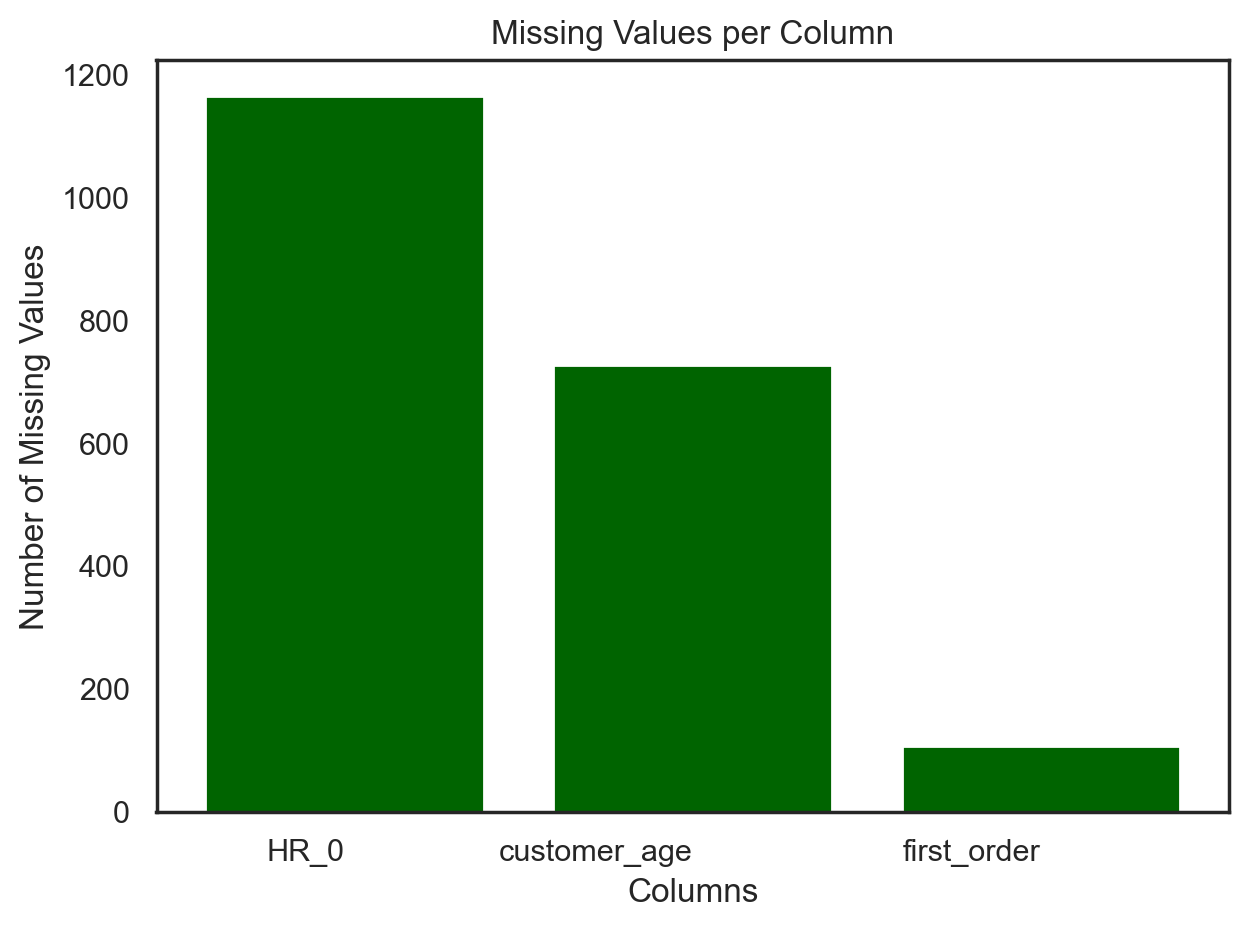

In [515]:
#Vizualization of the missing values 

def plot_missing_values_bar(data, xlabel, ylabel, title, order_descending=False):
    sns.set_style("white")

    # Reorder the data based on missing values count
    category_order = data.sort_values(ascending=not order_descending).index
    
    data = data[category_order]
    
    plt.bar(data.index, data.values, edgecolor='white', color='darkgreen')
    plt.xticks(rotation=0, ha='right')  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()  
    plt.show()

missing_values_per_column = ABCDE[["customer_age", "first_order", "HR_0"]].isna().sum()

plot_missing_values_bar(
    data=missing_values_per_column,
    xlabel='Columns',
    ylabel='Number of Missing Values',
    title='Missing Values per Column',
    order_descending=True
)

## 2.4. Multivariate Relationship <a class="anchor" id="22-incoherencies"></a>

#### 2.4.1 Correlation Matrix <a class="anchor" id="25-missing-values"></a>

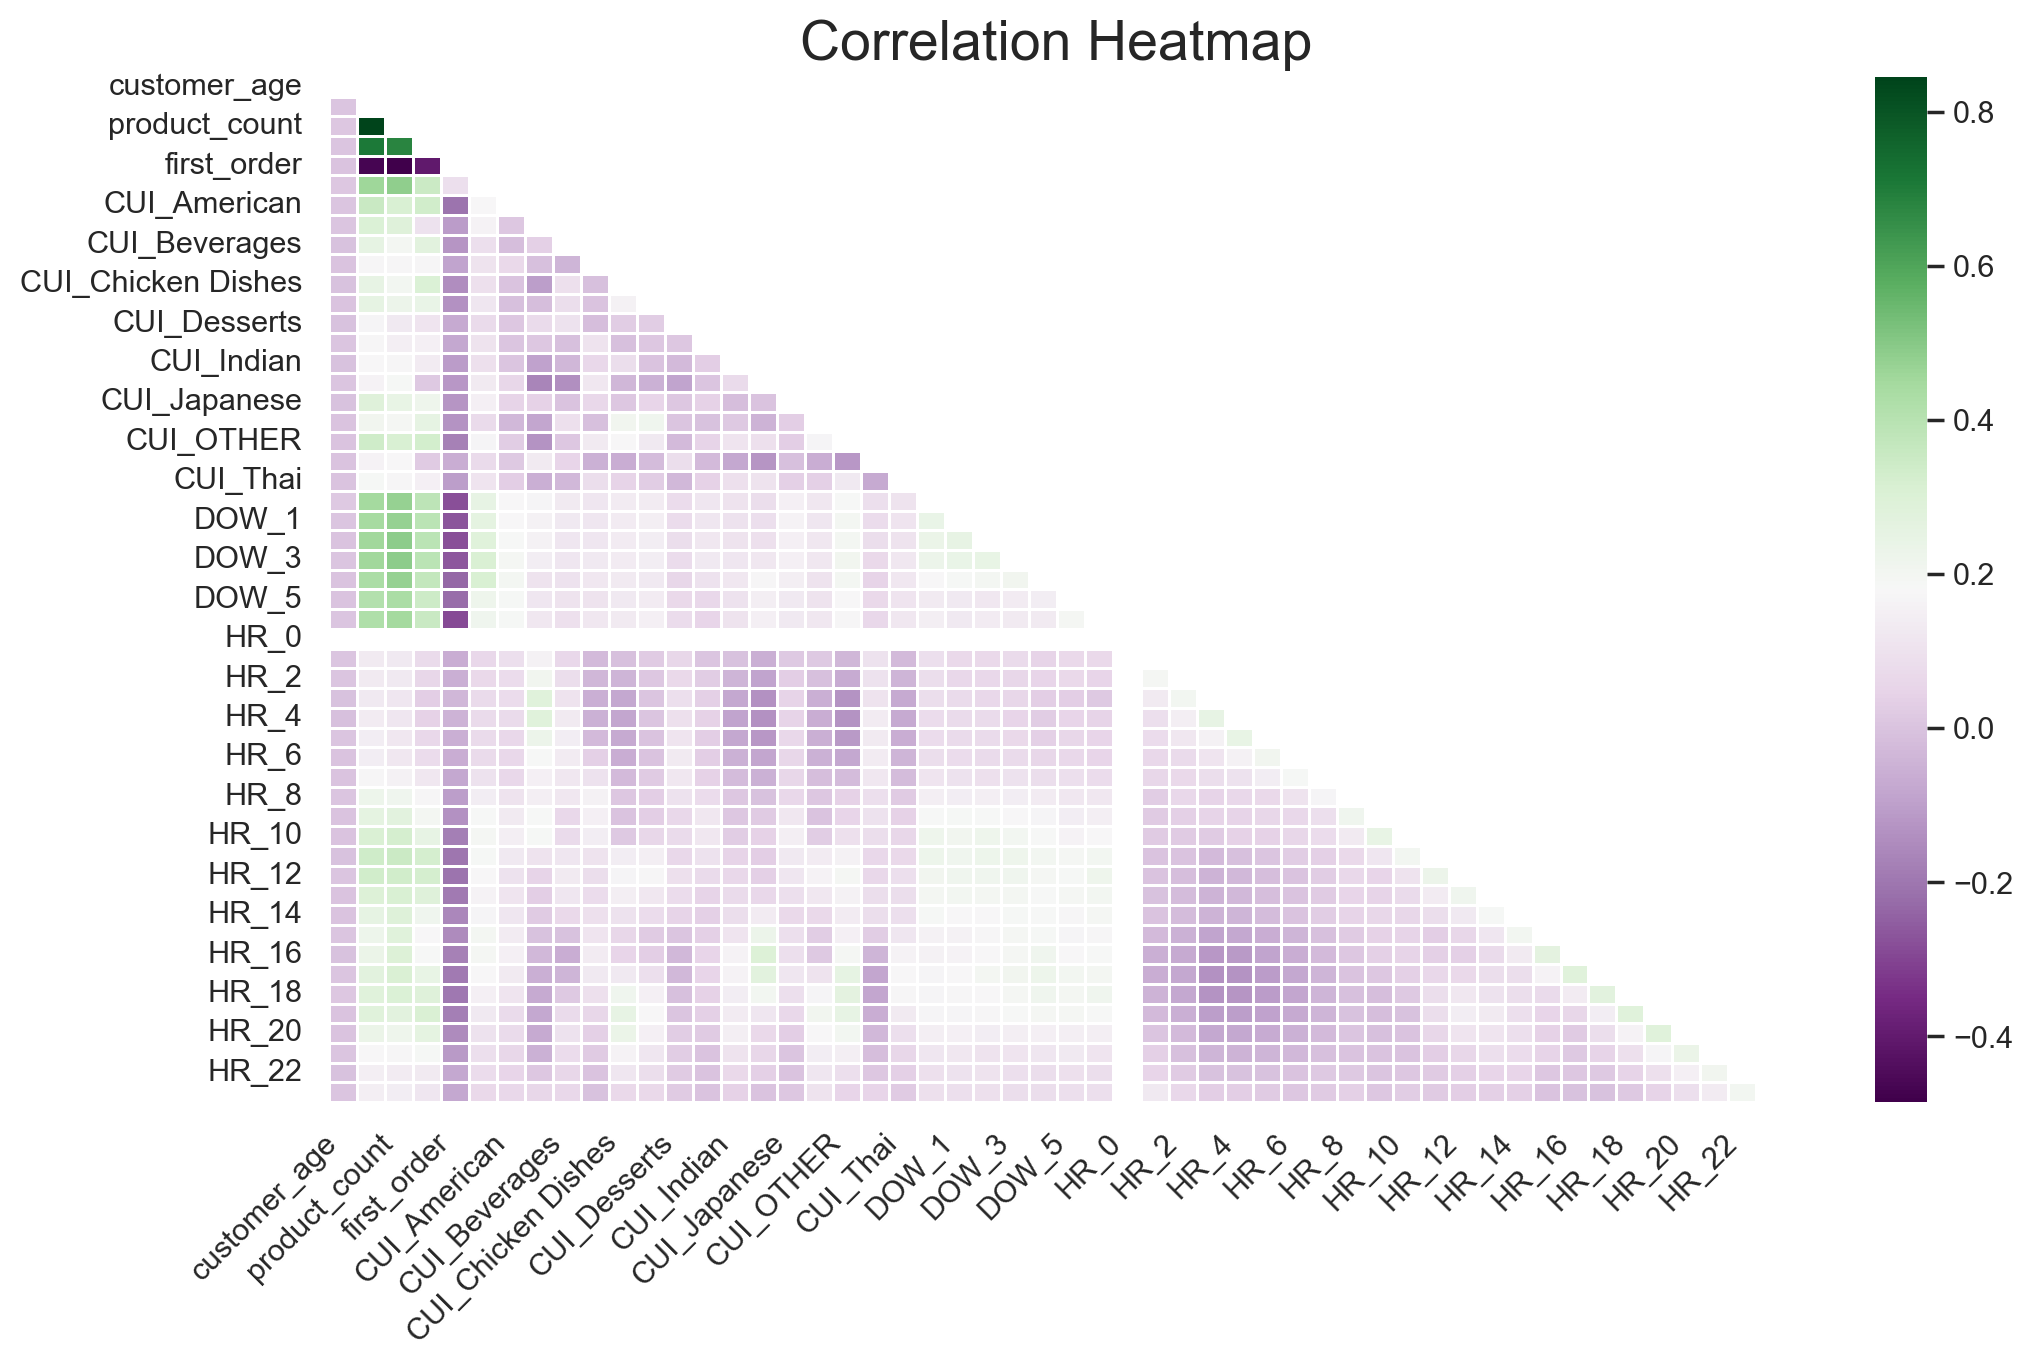

In [511]:
#Creating the necessary list
metric_features=['customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

fig = plt.figure(figsize=(11, 7))

#Obtain correlation matrix. 
corr = ABCDE[metric_features].corr(method="spearman")
#Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=False, mask=mask, cmap='PRGn', cbar=True, square=False, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  

#Display the results
plt.show()

#### 2.4.2 Correlation between vendor_count and product_count <a class="anchor" id="25-missing-values"></a>

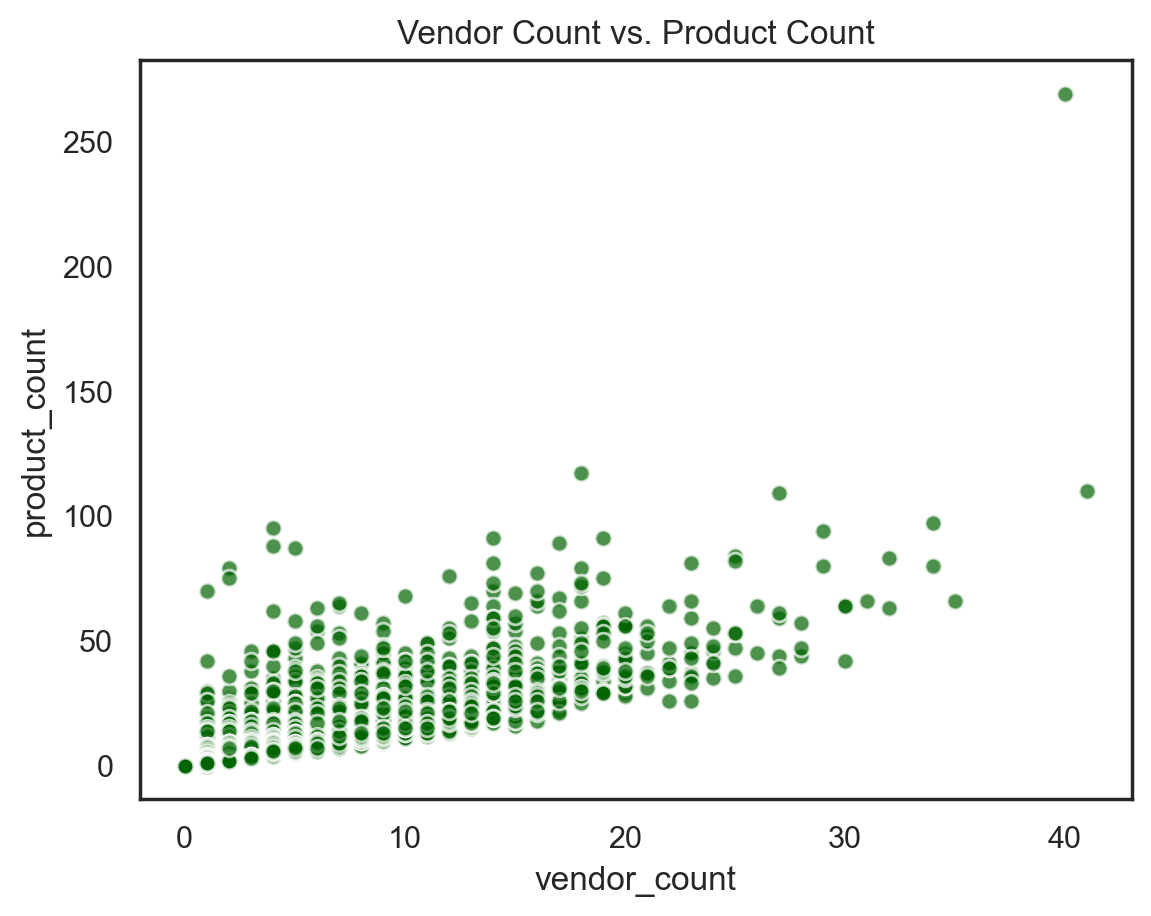

In [117]:
#Pair of Metric Variables Scatter Plot
plt.scatter(ABCDE["vendor_count"], ABCDE["product_count"], 
            color='darkgreen',  
            edgecolors='white',    
            alpha=0.7)            

plt.xlabel("vendor_count")
plt.ylabel("product_count")

plt.title("Vendor Count vs. Product Count") 
plt.show()

#### 2.4.3 Relationship between Vendor_Count and Region <a class="anchor" id="25-missing-values"></a>

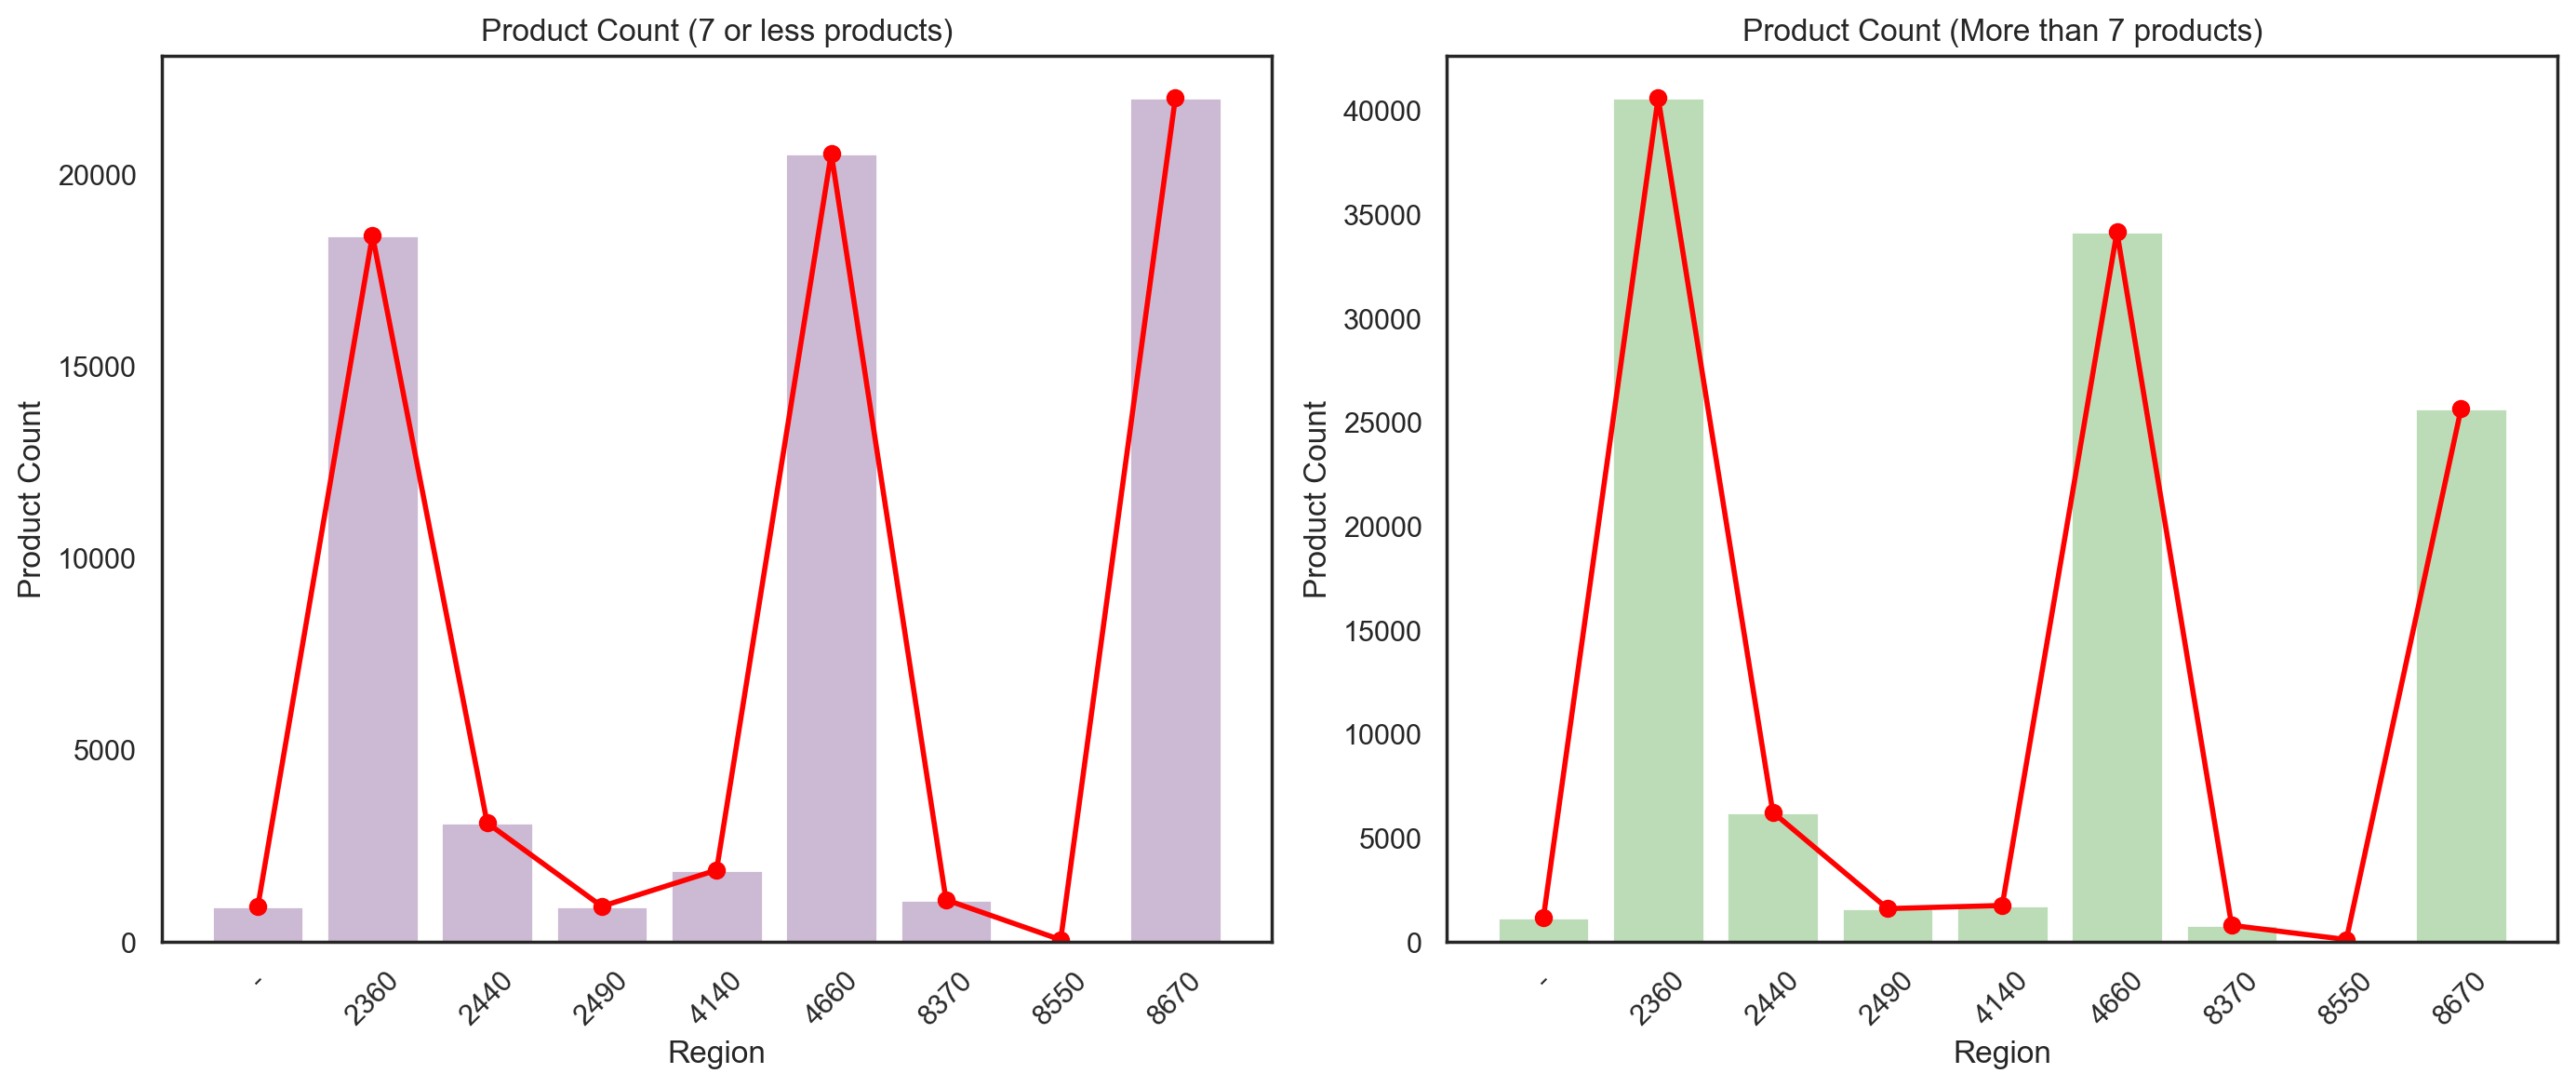

In [119]:
#Filter the data
low_count_ABCDE = ABCDE[ABCDE['product_count'] < 7]
high_count_ABCDE = ABCDE[ABCDE['product_count'] >= 7]

#Counting occurrences per region
low_product_count = low_count_ABCDE.groupby('customer_region')['product_count'].sum().reset_index()
high_product_count = high_count_ABCDE.groupby('customer_region')['product_count'].sum().reset_index()

#Choosing out palette
colors = sns.color_palette("PRGn", 2)  

#Plotting the figure
plt.figure(figsize=(14, 6))

#Bar Chart for Product Count
plt.subplot(1, 2, 1)
sns.barplot(x='customer_region', y='product_count', data=low_product_count, color=colors[0])
plt.title('Product Count (7 or less products)')
plt.xlabel('Region')
plt.ylabel('Product Count')
plt.xticks(rotation=45)

#Adding a line to connect the bars
plt.plot(low_product_count['customer_region'], low_product_count['product_count'], marker='o', color='red', linestyle='-', linewidth=2)

#Bar Chart for Product Count
plt.subplot(1, 2, 2)
sns.barplot(x='customer_region', y='product_count', data=high_product_count, color=colors[1])
plt.title('Product Count (More than 7 products)')
plt.xlabel('Region')
plt.ylabel('Product Count')
plt.xticks(rotation=45)

#Adding a line to connect the bars
plt.plot(high_product_count['customer_region'], high_product_count['product_count'], marker='o', color='red', linestyle='-', linewidth=2)

#Display the results
plt.tight_layout()
plt.show()


#### 2.4.4 Promo Code Usage by Region for customers that bought more and less than 7 products <a class="anchor" id="25-missing-values"></a>

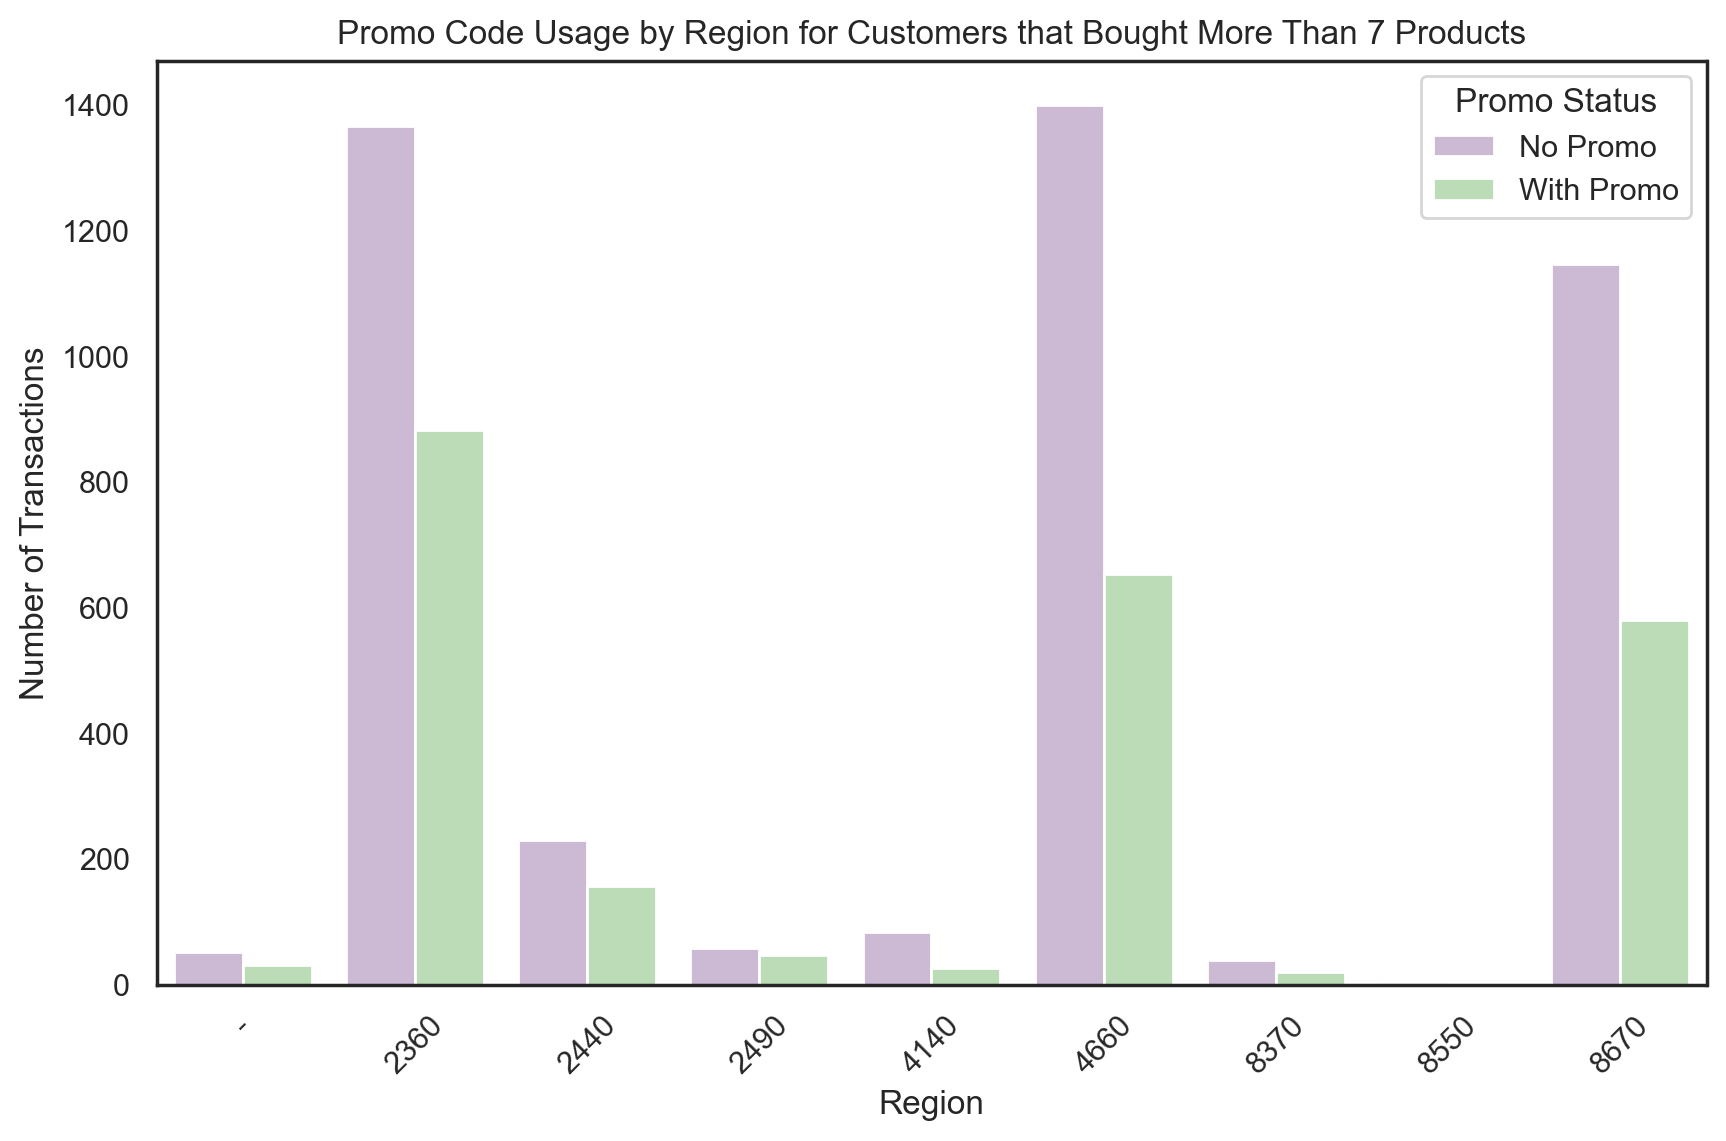

In [121]:
#Filter for high product count
high_product_count_ABCDE = ABCDE_copy[ABCDE_copy['product_count'] > 7]

#Creating a new column to categorize promo usage using .loc
high_product_count_ABCDE.loc[:, 'promo_used'] = high_product_count_ABCDE['last_promo'].apply(lambda x: 'With Promo' if x != '-' else 'No Promo')

#Group by region and promo usage
region_promo_counts = high_product_count_ABCDE.groupby(['customer_region', 'promo_used']).size().unstack(fill_value=0)

#Reset index for easier plotting
region_promo_counts = region_promo_counts.reset_index()

#Melt the DataFrame for Seaborn
region_promo_melted = region_promo_counts.melt(id_vars='customer_region', var_name='Promo Status', value_name='Count')

#Plotting and displaying the results
plt.figure(figsize=(10, 6))
sns.barplot(data=region_promo_melted, x='customer_region', y='Count', hue='Promo Status', palette='PRGn')
plt.title('Promo Code Usage by Region for Customers that Bought More Than 7 Products')
plt.ylabel('Number of Transactions')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Promo Status')
plt.show()

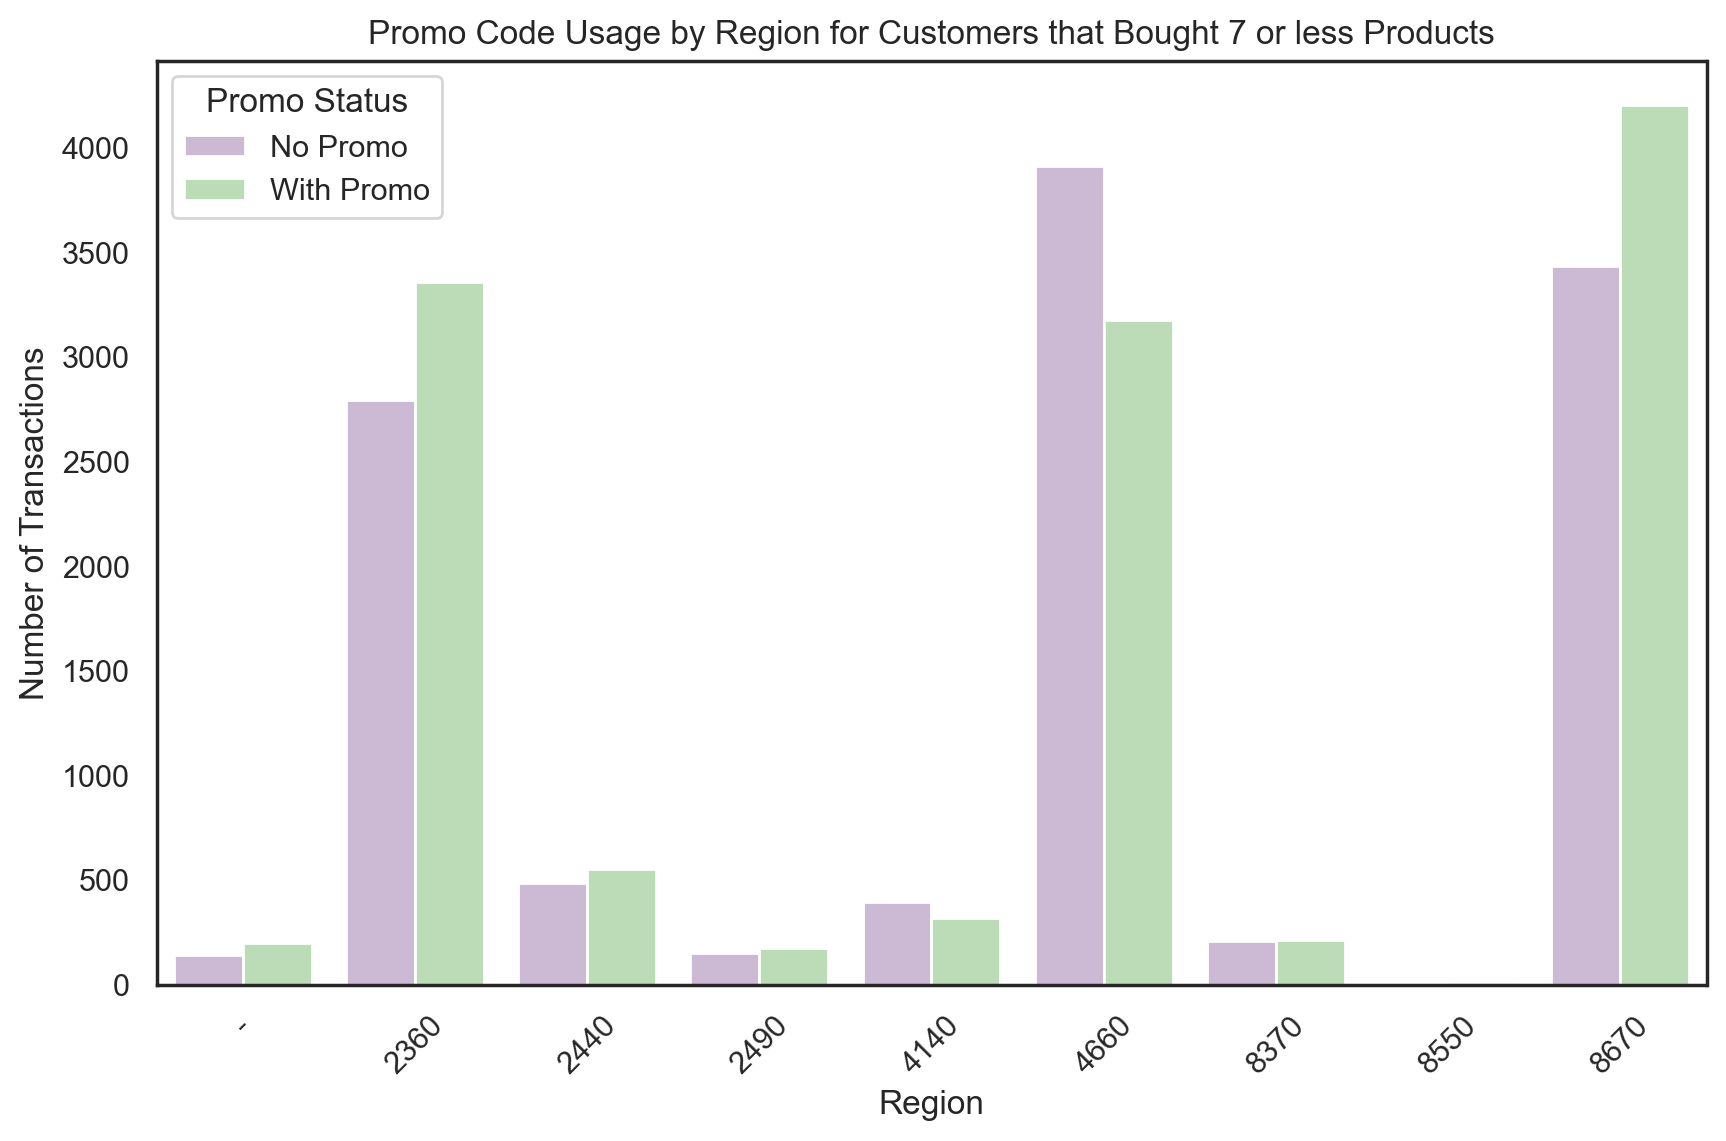

In [122]:
#Now the same as before but for less or 7 products

high_product_count_ABCDE = ABCDE_copy[ABCDE_copy['product_count'] < 7] 


high_product_count_ABCDE.loc[:, 'promo_used'] = high_product_count_ABCDE['last_promo'].apply(lambda x: 'With Promo' if x != '-' else 'No Promo')


region_promo_counts = high_product_count_ABCDE.groupby(['customer_region', 'promo_used']).size().unstack(fill_value=0)


region_promo_counts = region_promo_counts.reset_index()


region_promo_melted = region_promo_counts.melt(id_vars='customer_region', var_name='Promo Status', value_name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=region_promo_melted, x='customer_region', y='Count', hue='Promo Status', palette='PRGn')
plt.title('Promo Code Usage by Region for Customers that Bought 7 or less Products')
plt.ylabel('Number of Transactions')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Promo Status')
plt.show()


#### 2.4.5 Relationship between customer region and spending/cuisine preferences <a class="anchor" id="25-missing-values"></a>


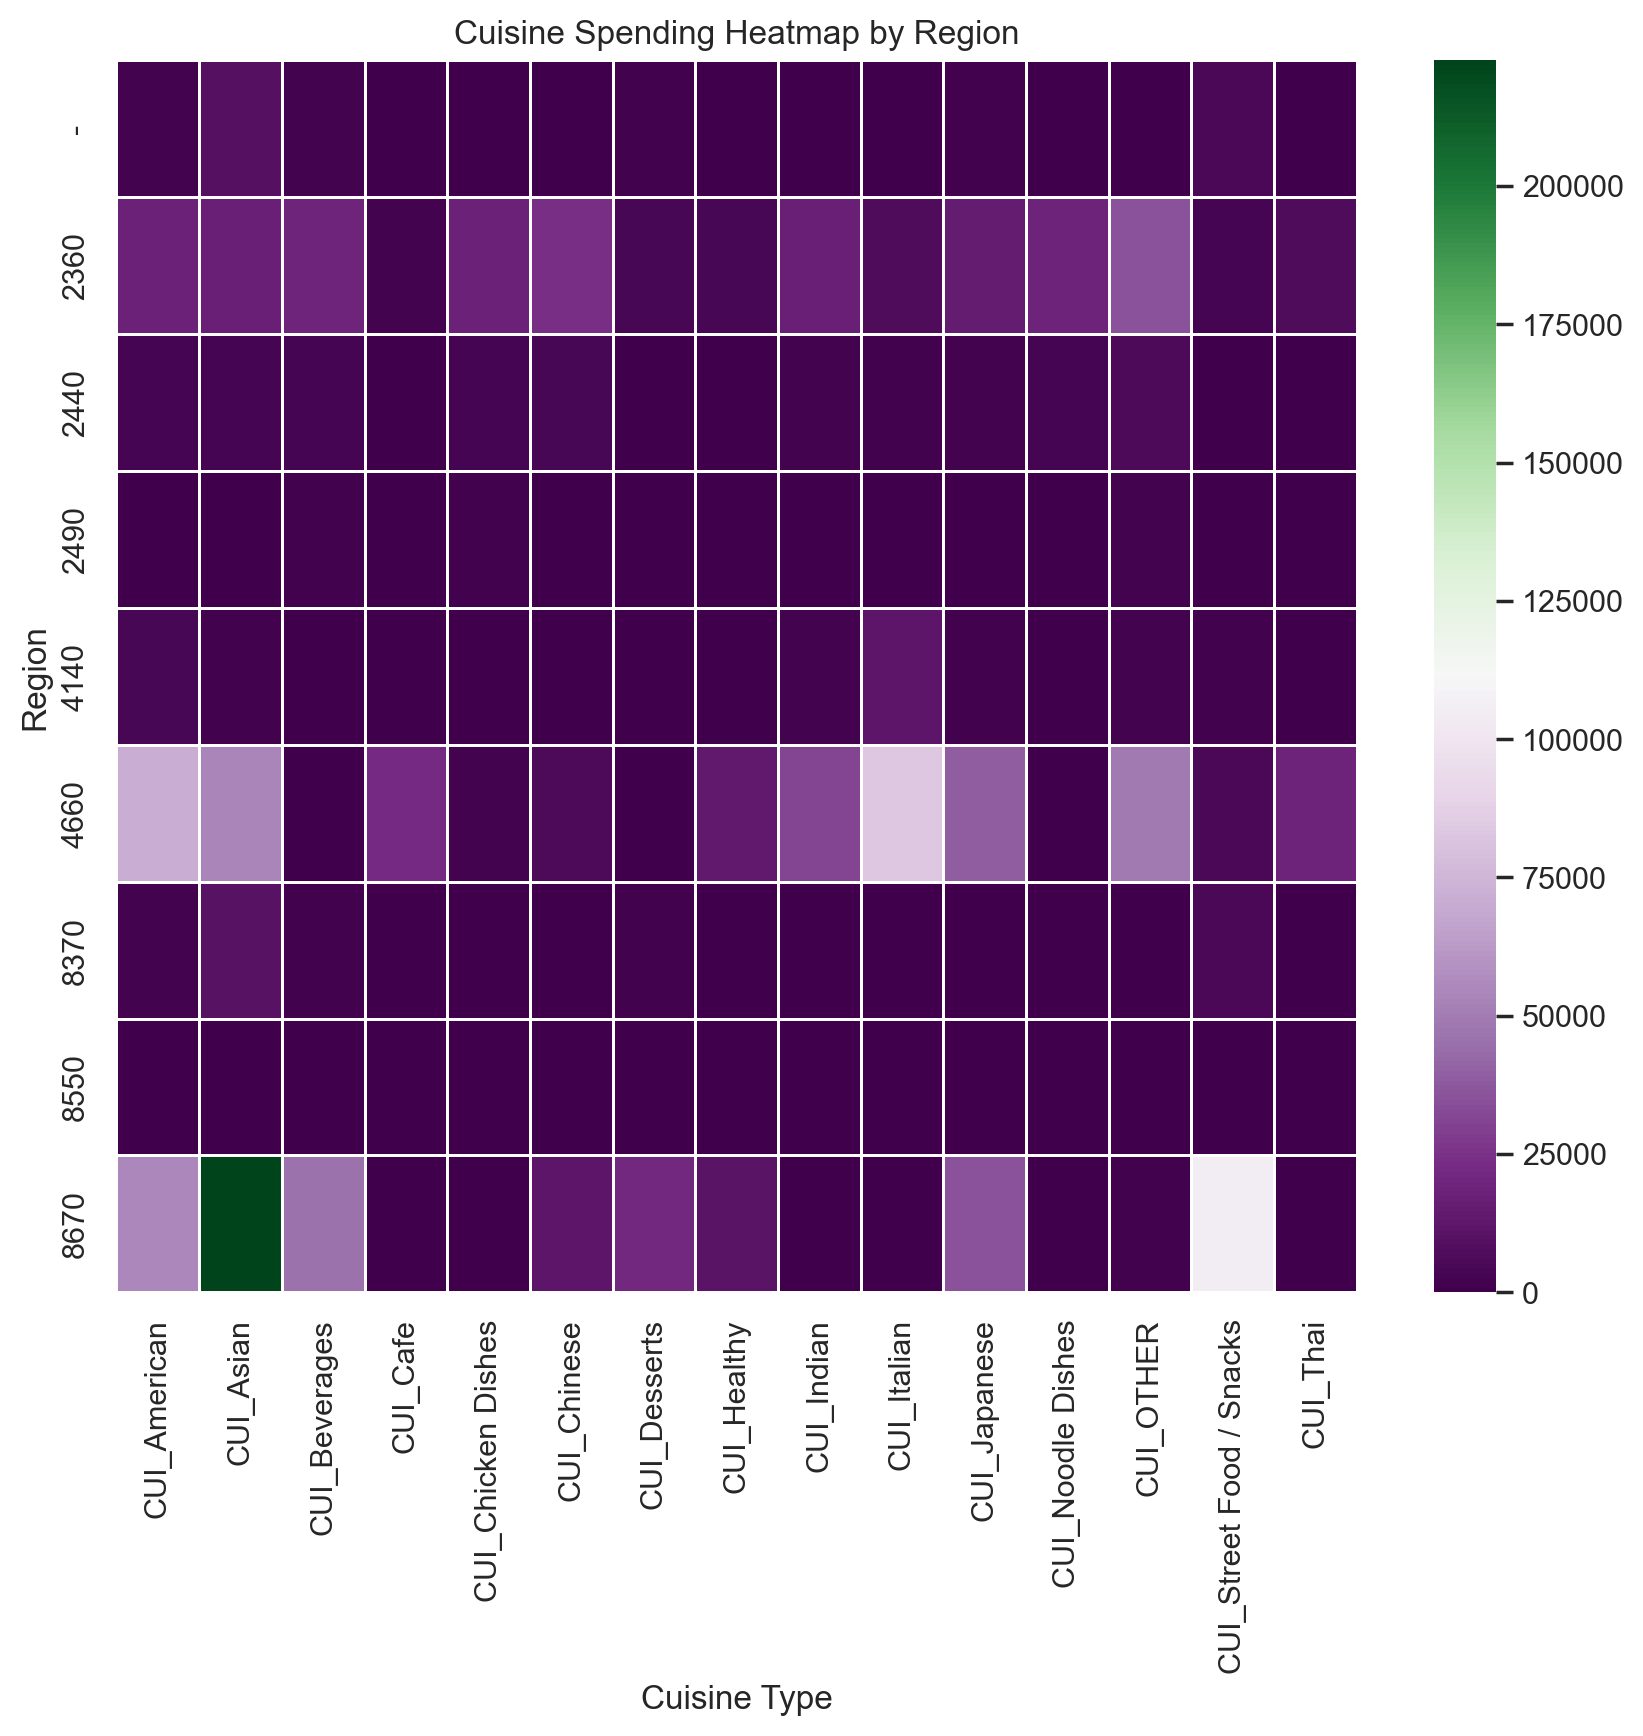

In [124]:
#Creating a new feature to be able to analyse this relationship 
cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai']
 

region_cuisine = ABCDE_copy.groupby('customer_region', observed=True)[cuisine_columns].sum()

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations formatted to 2 decimal places
sns.heatmap(region_cuisine, annot=False, fmt=".2f", cmap="PRGn", cbar=True, square=False, linewidths=0.5)

# Customize title and labels
plt.title('Cuisine Spending Heatmap by Region')
plt.xlabel('Cuisine Type')
plt.ylabel('Region')

# Display the plot
plt.show()

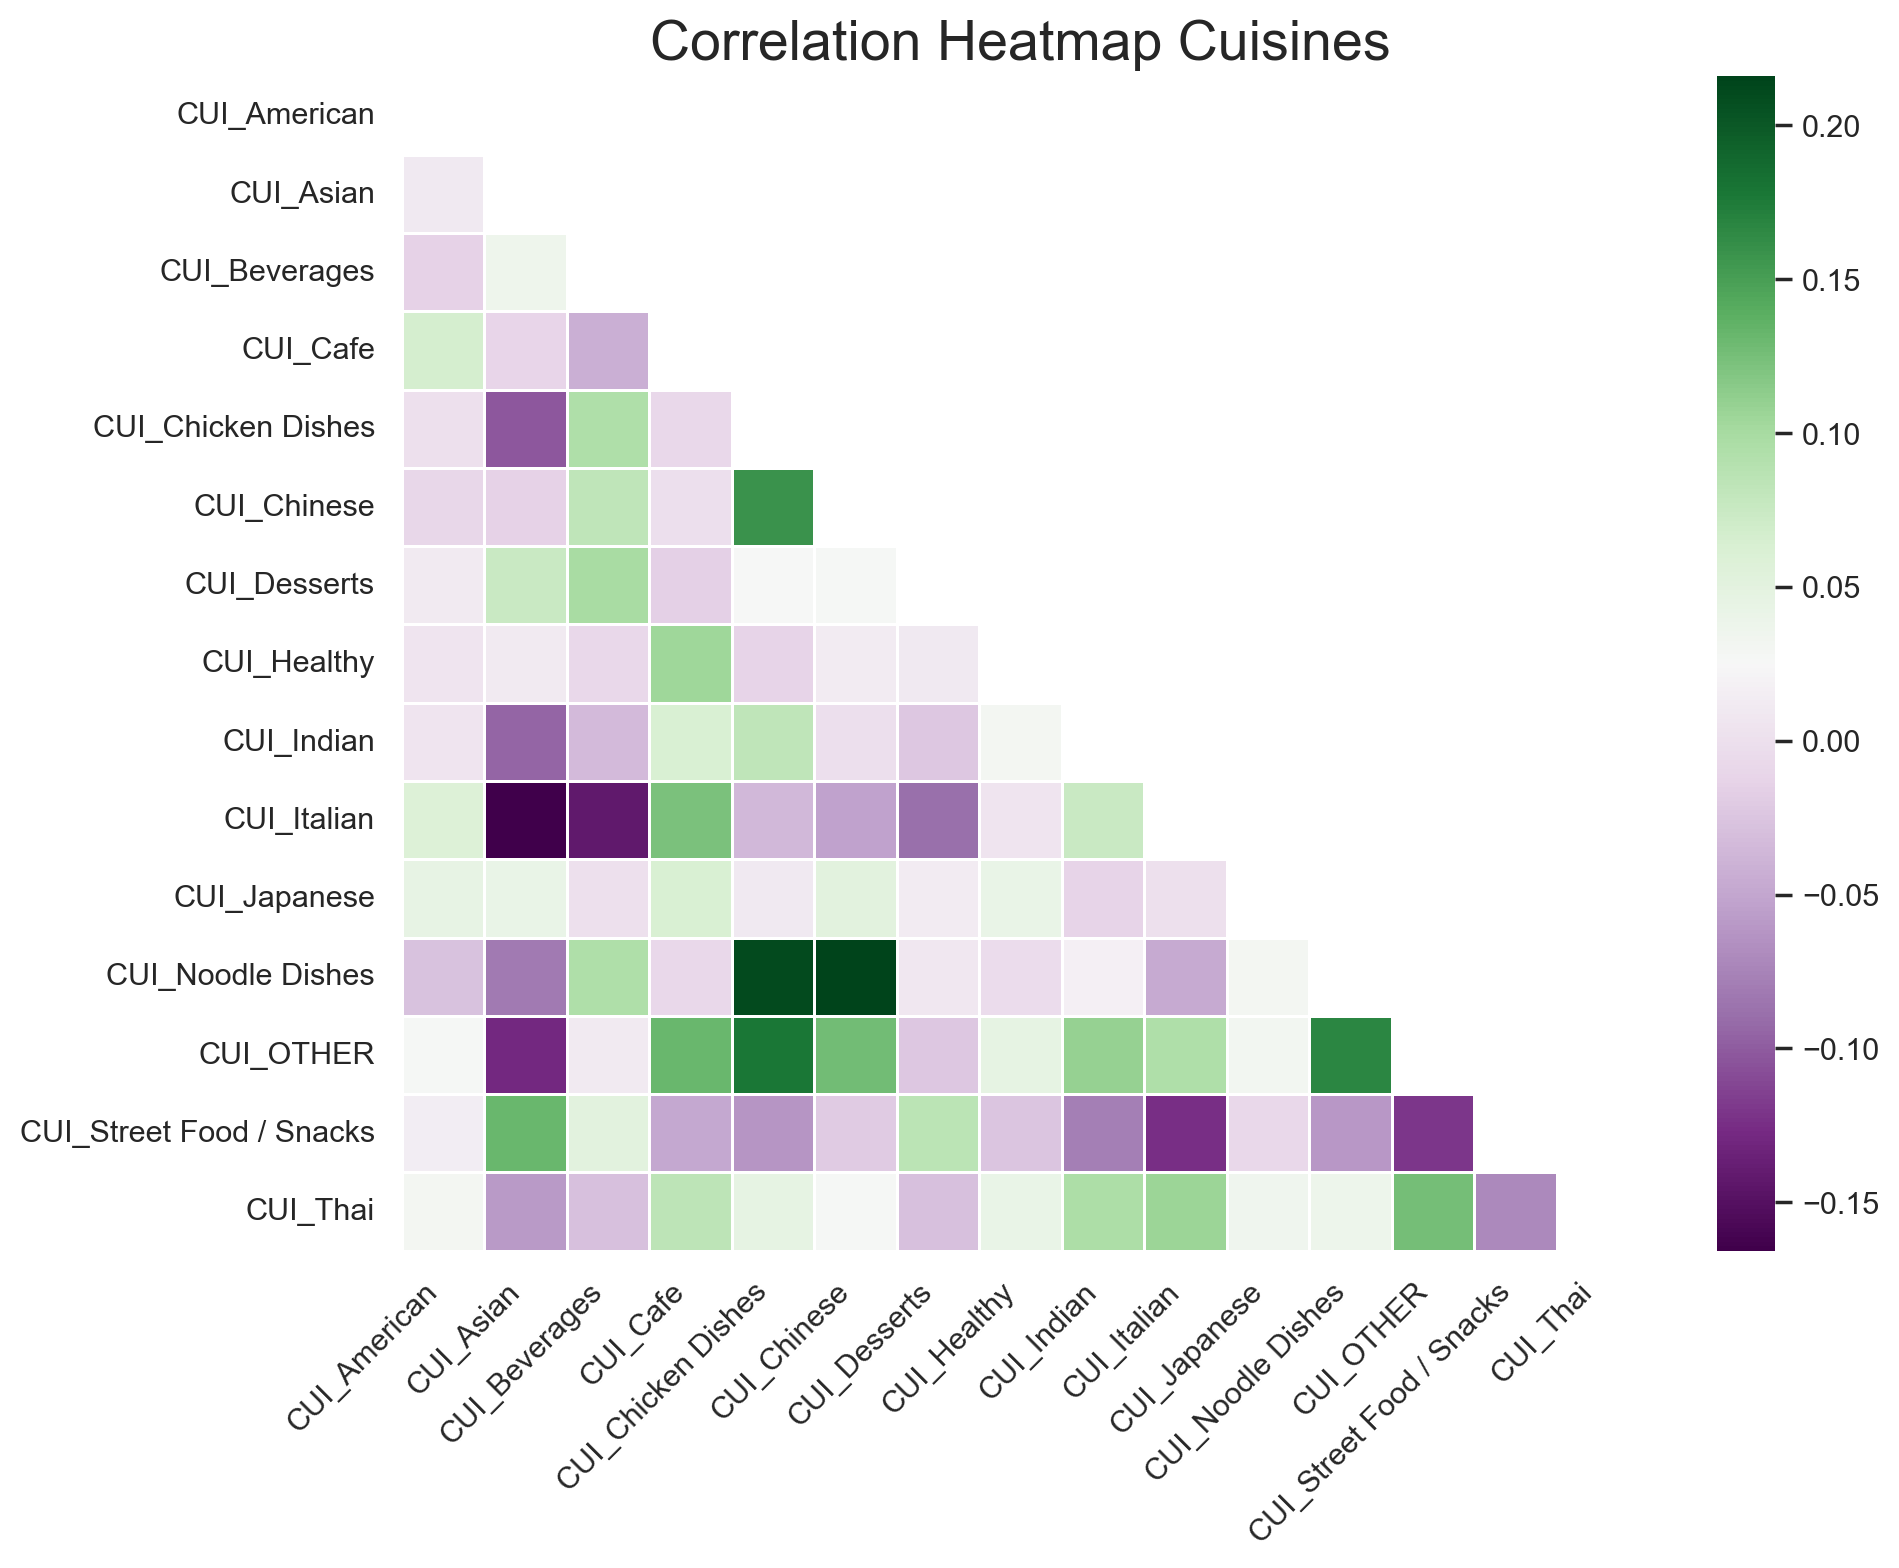

In [125]:
#Correlation matrix of all Cuisines 

fig = plt.figure(figsize=(10, 8))

#Obtain correlation matrix. 
corr = ABCDE[cuisine_columns].corr(method="spearman")
#Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=False, mask=mask, cmap='PRGn', cbar=True, square=False, linewidths=0.5)

plt.title('Correlation Heatmap Cuisines', fontsize=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  

#Display the results
plt.show()

<Figure size 3000x2000 with 0 Axes>

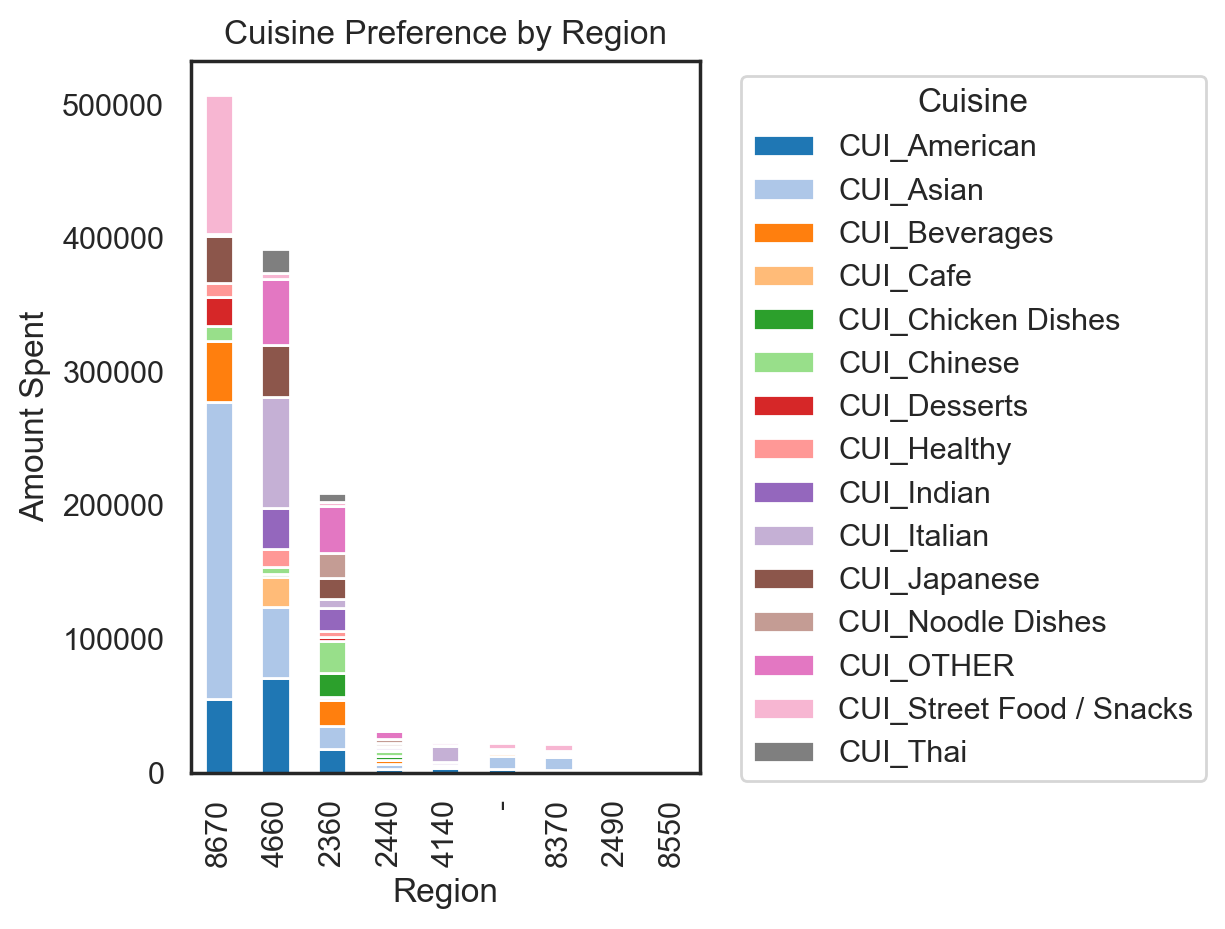

In [126]:
#Group the data by 'customer_region' and sum up spending across all specified cuisine columns for each region.
region_cuisine = ABCDE.groupby('customer_region', observed=True)[cuisine_columns].sum()

# Add a column for total spending (frequency) across all cuisines for sorting
region_cuisine['Total Spending'] = region_cuisine.sum(axis=1)

# Sort the regions by total spending
region_cuisine = region_cuisine.sort_values(by='Total Spending', ascending=False)

# Drop the 'Total Spending' column after sorting (optional for visualization)
region_cuisine = region_cuisine.drop(columns=['Total Spending'])


#Set the figure size to make the chart large and readable.
plt.figure(figsize=(30, 20))

#Defining the color palette
colors = plt.get_cmap("tab20").colors

#Plot the graph.
region_cuisine.plot(kind='bar', stacked=True, color=colors)

#Legend the figure
plt.title('Cuisine Preference by Region')
plt.xlabel('Region')
plt.ylabel('Amount Spent')

#Place the legend outside the plot
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()

#Display the results
plt.show()


#### 2.4.6 Customer Behaviour in last and First Order <a class="anchor" id="25-missing-values"></a>


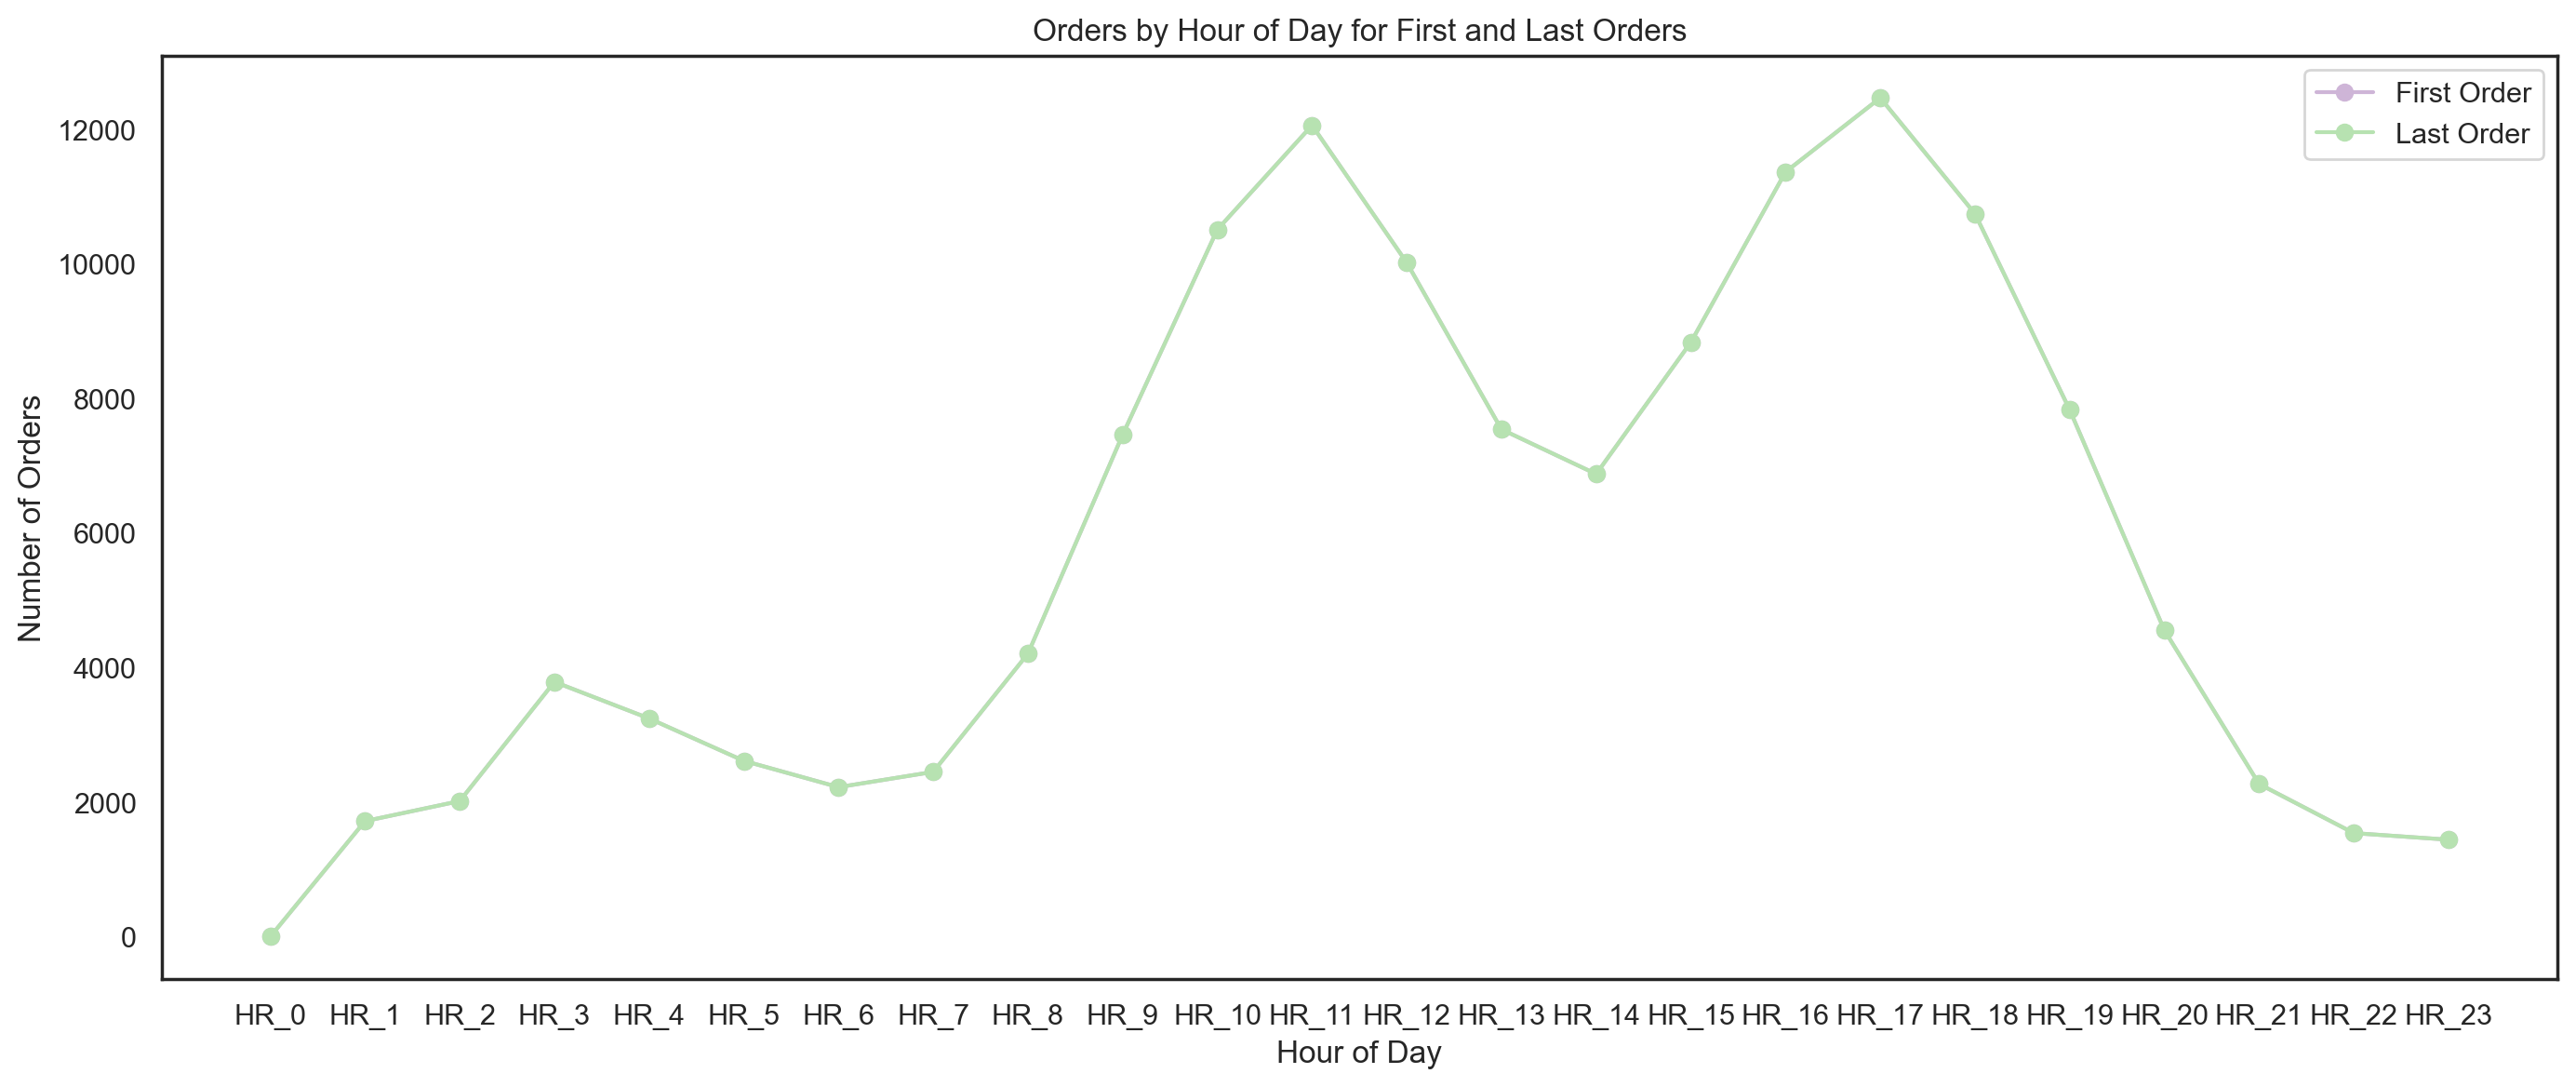

In [128]:
#Analyzing Time of Day Orders
colors = sns.color_palette("PRGn", 2)  # Get two colors from the mako palette

#Calculating total orders for each hour of the day for first and last orders
first_order_counts = ABCDE.filter(like='HR_').iloc[:, :24].sum()  
last_order_counts = ABCDE.filter(like='HR_').iloc[:, :24].sum()  

#Defining the Plot and displaying the results
plt.figure(figsize=(14, 6))
plt.plot(first_order_counts.index, first_order_counts.values, label='First Order', marker='o', color=colors[0])
plt.plot(last_order_counts.index, last_order_counts.values, label='Last Order', marker='o', color=colors[1])
plt.title('Orders by Hour of Day for First and Last Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(False)  
plt.tight_layout() 


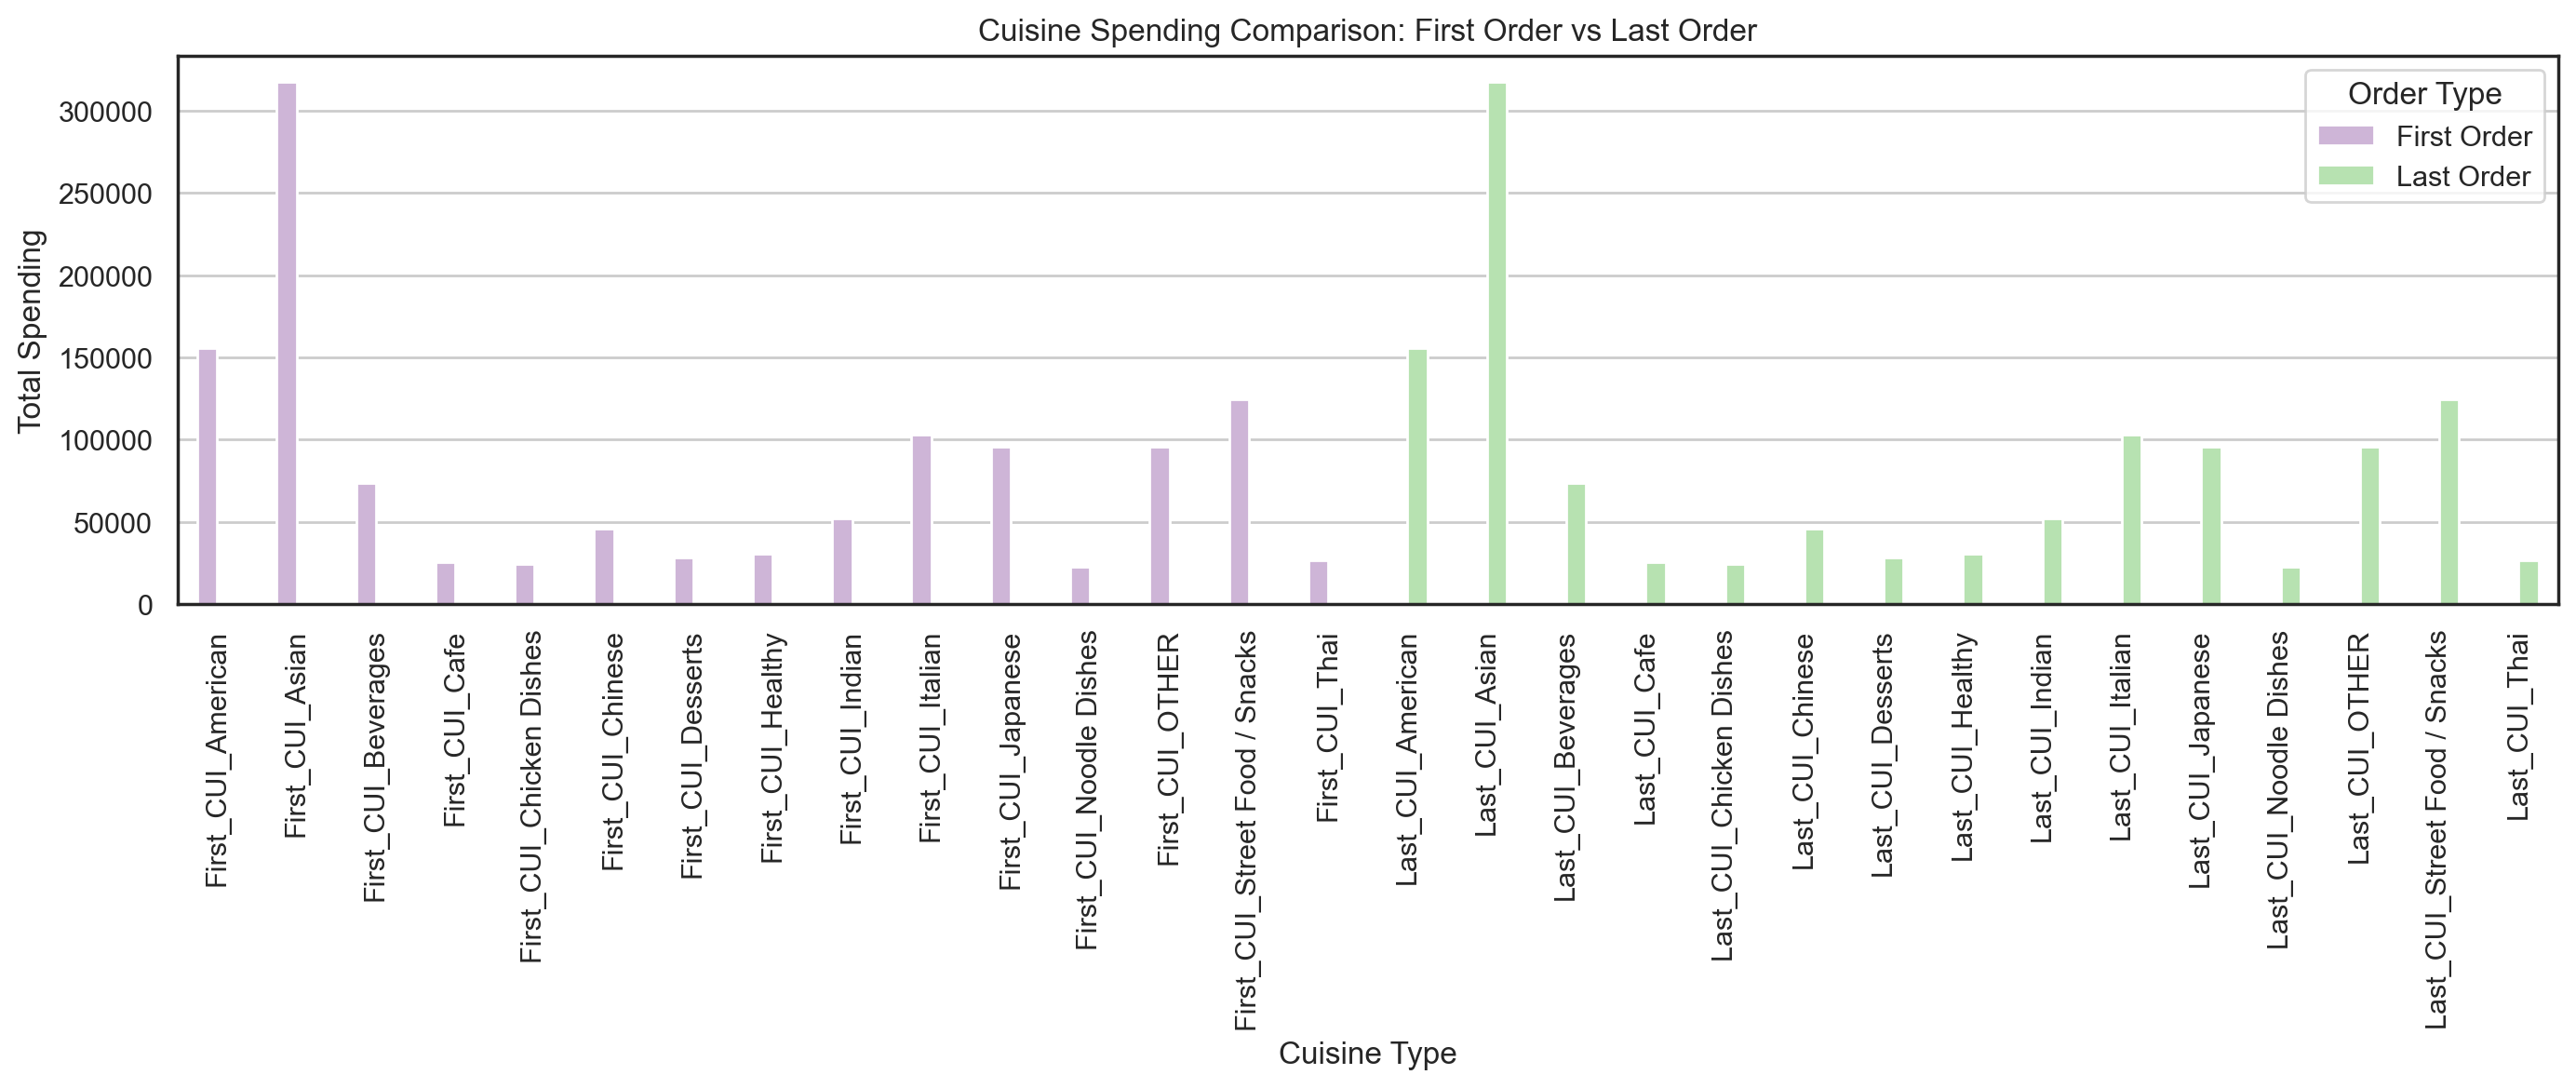

In [129]:
#Analyzing the total spending by cuisine for first and last orders
first_order_cuisines = ABCDE.filter(like='CUI_').sum().rename(lambda x: f'First_{x}', axis=0)
last_order_cuisines = ABCDE.filter(like='CUI_').sum().rename(lambda x: f'Last_{x}', axis=0)

# Combining the two series into a single DataFrame
cuisine_composition = pd.DataFrame({'First Order': first_order_cuisines, 'Last Order': last_order_cuisines})


sns.set_style("white")
colors = sns.color_palette("PRGn", len(cuisine_composition.columns))

#Using mako palete
cuisine_composition.plot(kind='bar', figsize=(14, 6), color=colors)

#Defining the Plot and displaying the results
plt.title('Cuisine Spending Comparison: First Order vs Last Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)
plt.legend(title='Order Type')
plt.grid(axis='y')
plt.tight_layout() 
plt.show()


#### 2.4.7 Payment Method with Customer Regions and Order Count <a class="anchor" id="25-missing-values"></a>

   payment_method cities  count
4            CASH      -     73
8            DIGI      -     99
0            CARD      -    270
6            CASH      4   1637
10           DIGI      4   1756
7            CASH      8   1815
9            DIGI      2   2041
5            CASH      2   2101
11           DIGI      8   2205
3            CARD      8   6262
1            CARD      2   6615
2            CARD      4   7014


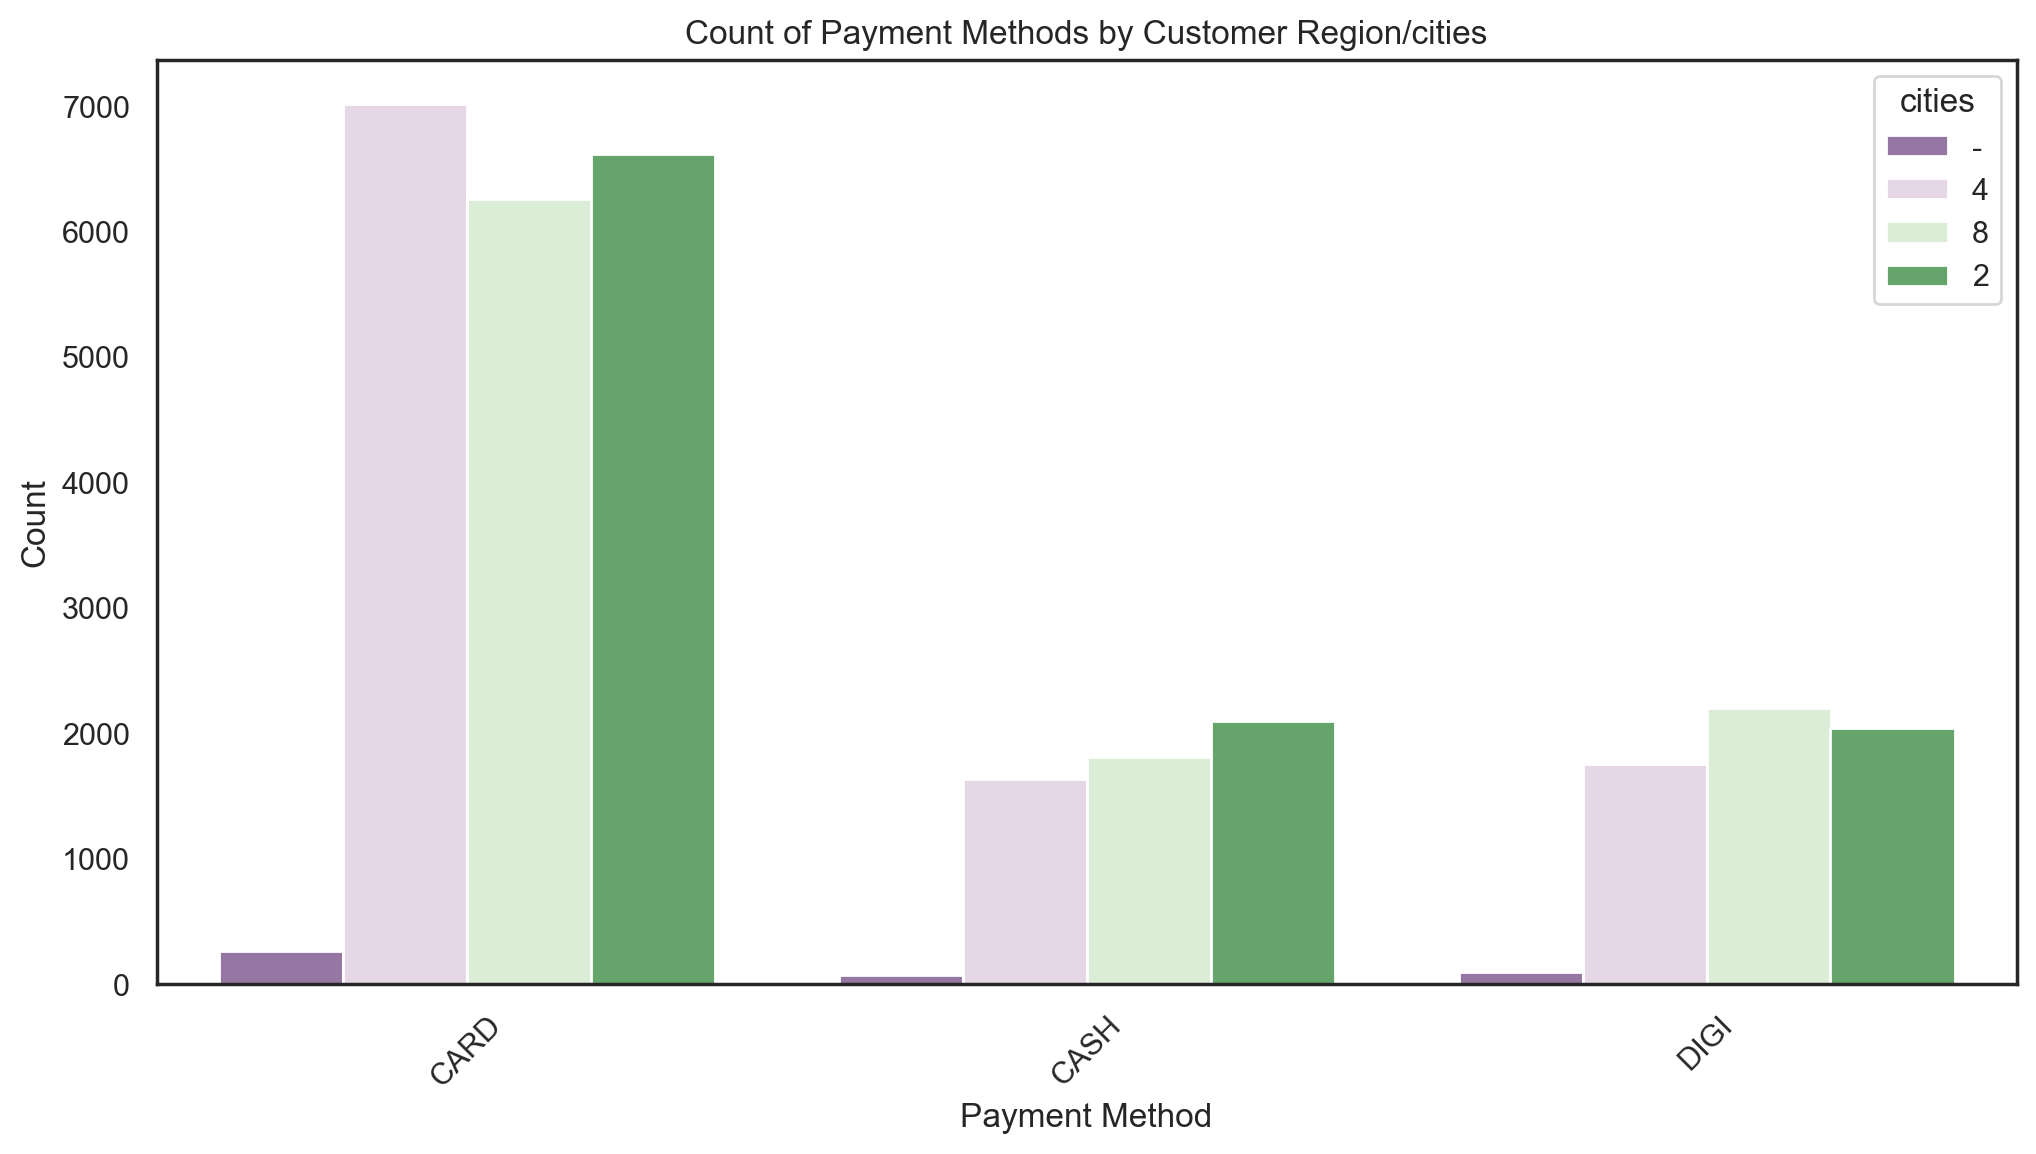

In [131]:
#Payment Method with Customer Regions and Order Count

#Creating the new feature
ABCDE_copy['cities'] = ABCDE_copy['customer_region'].astype(str).str[:1]

#Grouping the data 
payment_region_counts = ABCDE_copy.groupby(['payment_method', 'cities']).size().reset_index(name='count')

payment_region_counts = payment_region_counts.sort_values(by='count', ascending=True)

#Print the grouped data for inspection
print(payment_region_counts)

#Plotting the results as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_region_counts, x='payment_method', y='count', hue='cities', palette='PRGn')
plt.title('Count of Payment Methods by Customer Region/cities')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='cities')
plt.grid(False)
plt.show()

#### 2.4.8 Total Spendings per cuisine analysis <a class="anchor" id="25-missing-values"></a>


In [133]:
# Filter out only the "CUI_" columns from the DataFrame
cuisine_columns = [col for col in ABCDE_copy.columns if col.startswith("CUI_")]

# Calculate the total spendings for each cuisine
total_spendings_per_cuisine = ABCDE_copy[cuisine_columns].sum()

# Convert the result to a DataFrame for easy viewing
total_spendings_per_cuisine_df = total_spendings_per_cuisine.reset_index()
total_spendings_per_cuisine_df.columns = ["Cuisine", "Total Spending"]

# Sort by Total Spending for better visualization
total_spendings_per_cuisine_df = total_spendings_per_cuisine_df.sort_values(by="Total Spending", ascending=False)


total_spendings_per_cuisine_df.T

1             0                         13  \
Cuisine         CUI_Asian  CUI_American  CUI_Street Food / Snacks   
Total Spending  317618.87      155627.4                 124785.82   

                         9          12            10             2   \
Cuisine         CUI_Italian  CUI_OTHER  CUI_Japanese  CUI_Beverages   
Total Spending     103107.0   95661.23      95516.66        73362.6   

                        8            5            7             6         14  \
Cuisine         CUI_Indian  CUI_Chinese  CUI_Healthy  CUI_Desserts  CUI_Thai   
Total Spending     52014.2     45638.67     30300.07      28200.43  26840.02   

                      3                   4                  11  
Cuisine         CUI_Cafe  CUI_Chicken Dishes  CUI_Noodle Dishes  
Total Spending  25547.48            24493.05           22693.92

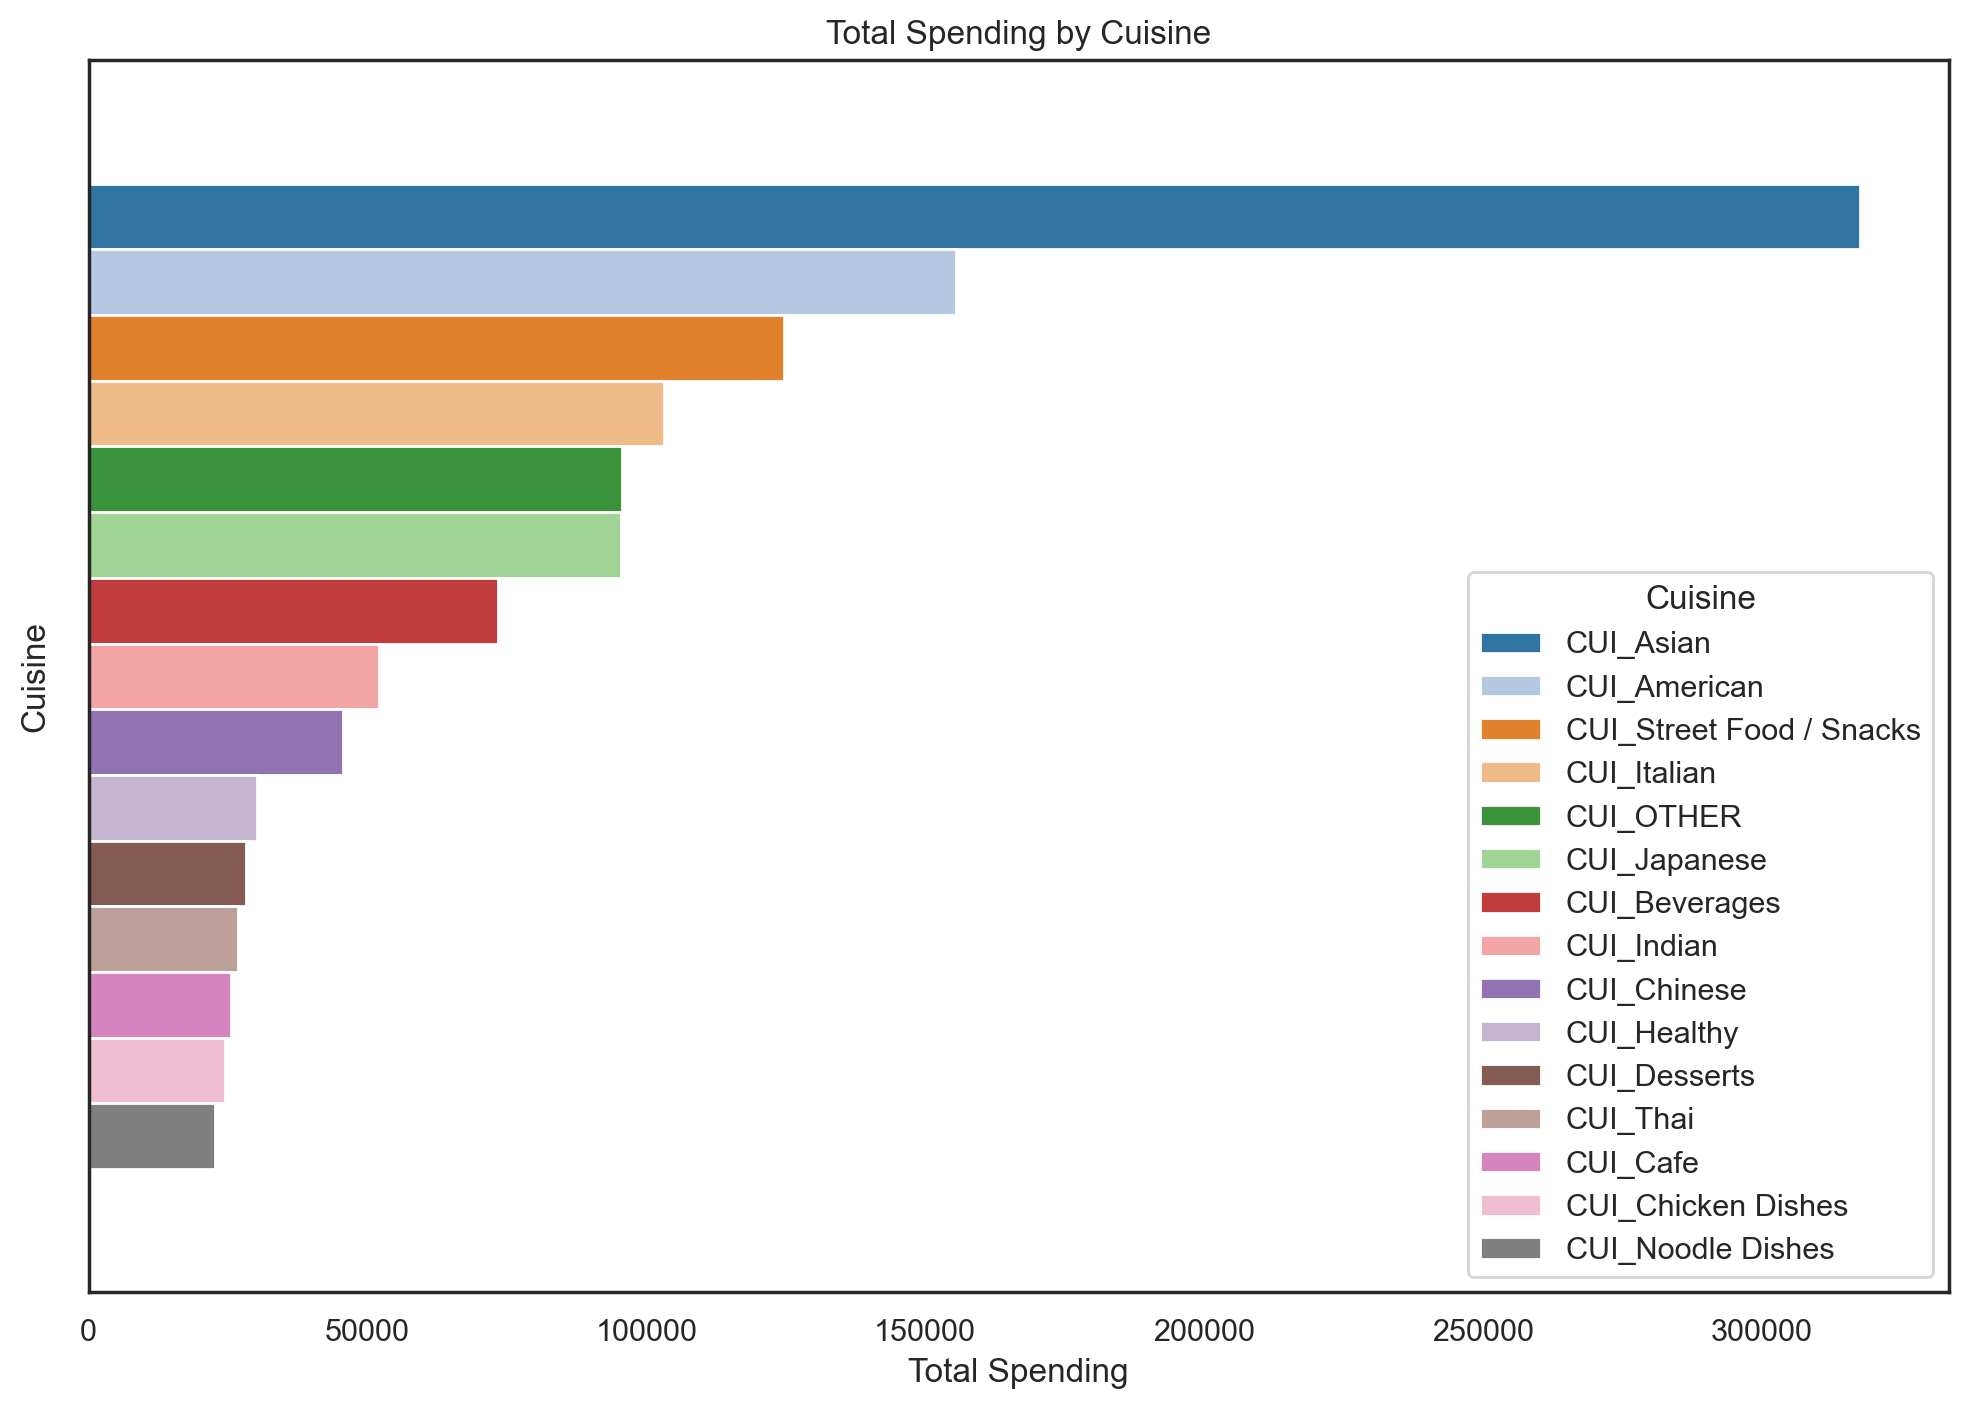

In [134]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Total Spending", hue="Cuisine", data=total_spendings_per_cuisine_df, palette="tab20")
plt.title("Total Spending by Cuisine")
plt.xlabel("Total Spending")
plt.ylabel("Cuisine")
plt.show()

In [513]:
variables_EDA = {
    'cuisine_columns': cuisine_columns,
    'metric_features': metric_features,
    'days_columns': days_columns,
    'hours_columns': hours_columns
}

with open('variables_EDA.py', 'w') as f:
    for var_name, value in variables_EDA.items():
        if callable(value):
            # Write the function directly without converting it to a string
            f.write(f"{var_name} = {value}\n")
        else:
            # Write the variable normally
            f.write(f"{var_name} = {repr(value)}\n")

print("The variables have been exported as .py.")

NameError: name 'cuisine_columns' is not defined

In [519]:
functions_EDA = {
    'plot_numeric_variable': plot_numeric_variable,
    'plot_missing_values_bar': plot_missing_values_bar,
    'plot_categorical_analysis': plot_categorical_analysis
}

# Open the file for writing
with open('functions_EDA.py', 'w') as f:
    for var_name, value in functions_EDA.items():
        if callable(value):
            # Get the source code of the function
            source_code = inspect.getsource(value)
            # Write the function's source code into the file
            f.write(source_code + '\n\n')  # Add an extra newline between functions
        else:
            # In case it's not a callable (for other variables), just write it normally
            f.write(f"{var_name} = {repr(value)}\n")

print("The functions have been exported as .py.")

The functions have been exported as .py.


In [ ]:
ABCDE.to_csv('ABCDE.csv', index=True)
ABCDE_copy.to_csv('ABCDE_copy.csv', index=True)

print("The dataset has been exported to csv.")